In [1]:
# Importamos las librerías que vamos a utilizar durante el trabajo
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import colors as c
from matplotlib import gridspec as grid

In [2]:
datos = pd.read_csv("grupos_edad_madrid.csv")

In [3]:
datos.head()

fecha    ccaa  <11 anios  12-19 anios  20-29 anios  30-39 anios  \
0  29/06/2021  Madrid      50.75       237.56       160.95       101.30   
1  30/06/2021  Madrid      49.88       263.21       177.38       100.25   
2  01/07/2021  Madrid      47.88       287.24       199.33       111.41   
3  05/07/2021  Madrid      47.14       348.66       276.51       136.79   
4  07/07/2021  Madrid      52.37       401.96       393.01       173.75   

   40-49 anios  50-59 anios  60-69 anios  70-79 anios  >80 anios  
0        79.16        44.72        35.69        12.93      18.95  
1        79.33        44.61        34.41        12.17      19.77  
2        81.73        44.10        32.84        12.36      17.85  
3        87.65        45.13        33.84        13.31      19.50  
4       103.43        53.15        38.53        14.83      21.97

In [4]:
datos.shape

(157, 11)

In [5]:
#Vemos si hay nulos
datos.isnull().sum()

fecha          0
ccaa           0
<11 anios      0
12-19 anios    0
20-29 anios    0
30-39 anios    0
40-49 anios    0
50-59 anios    0
60-69 anios    0
70-79 anios    0
>80 anios      1
dtype: int64

In [6]:
datos.dtypes

fecha           object
ccaa            object
<11 anios      float64
12-19 anios    float64
20-29 anios    float64
30-39 anios    float64
40-49 anios    float64
50-59 anios    float64
60-69 anios    float64
70-79 anios    float64
>80 anios      float64
dtype: object

In [7]:
#seleccionamos los datos númericos
datos_categoria = datos.select_dtypes(include=[float])
datos_categoria.head()

<11 anios  12-19 anios  20-29 anios  30-39 anios  40-49 anios  50-59 anios  \
0      50.75       237.56       160.95       101.30        79.16        44.72   
1      49.88       263.21       177.38       100.25        79.33        44.61   
2      47.88       287.24       199.33       111.41        81.73        44.10   
3      47.14       348.66       276.51       136.79        87.65        45.13   
4      52.37       401.96       393.01       173.75       103.43        53.15   

   60-69 anios  70-79 anios  >80 anios  
0        35.69        12.93      18.95  
1        34.41        12.17      19.77  
2        32.84        12.36      17.85  
3        33.84        13.31      19.50  
4        38.53        14.83      21.97

In [8]:
#Calculamos la probabilidad de que una persona esté infectada: Casos Favorables/Casos Totales. Al tratarse de un dataframe
#con la información de los contagios por cada 100mil habs: N/100.000
datos_cat_prob = datos_categoria/100000
datos_cat_prob.head()

<11 anios  12-19 anios  20-29 anios  30-39 anios  40-49 anios  50-59 anios  \
0   0.000508     0.002376     0.001609     0.001013     0.000792     0.000447   
1   0.000499     0.002632     0.001774     0.001002     0.000793     0.000446   
2   0.000479     0.002872     0.001993     0.001114     0.000817     0.000441   
3   0.000471     0.003487     0.002765     0.001368     0.000877     0.000451   
4   0.000524     0.004020     0.003930     0.001737     0.001034     0.000531   

   60-69 anios  70-79 anios  >80 anios  
0     0.000357     0.000129   0.000189  
1     0.000344     0.000122   0.000198  
2     0.000328     0.000124   0.000179  
3     0.000338     0.000133   0.000195  
4     0.000385     0.000148   0.000220

In [9]:
datos_cat_prob

<11 anios  12-19 anios  20-29 anios  30-39 anios  40-49 anios  \
0     0.000508     0.002376     0.001609     0.001013     0.000792   
1     0.000499     0.002632     0.001774     0.001002     0.000793   
2     0.000479     0.002872     0.001993     0.001114     0.000817   
3     0.000471     0.003487     0.002765     0.001368     0.000877   
4     0.000524     0.004020     0.003930     0.001737     0.001034   
..         ...          ...          ...          ...          ...   
152   0.001433     0.002478     0.003044     0.002870     0.002469   
153   0.001325     0.002549     0.002972     0.002824     0.002455   
154   0.001315     0.002490     0.002950     0.002843     0.002600   
155   0.001391     0.002713     0.003042     0.003166     0.002898   
156   0.001355     0.002554     0.003044     0.003216     0.002939   

     50-59 anios  60-69 anios  70-79 anios  >80 anios  
0       0.000447     0.000357     0.000129   0.000189  
1       0.000446     0.000344     0.000122   0.000198  
2       0.000441     0.000328     0.000124   0.000179  
3       0.000451     0.000338     0.000133   0.000195  
4       0.000531     0.000385     0.000148   0.000220  
..           ...          ...          ...        ...  
152     0.002034     0.001586     0.001574   0.002167  
153     0.002080     0.001616     0.001648   0.001922  
154     0.002245     0.001661     0.001763   0.001973  
155     0.002431     0.001894     0.001946   0.002129  
156     0.002530     0.001940     0.002087   0.002134  

[157 rows x 9 columns]

In [10]:
datos_fm=datos[["fecha","ccaa"]]
datos_fm

fecha    ccaa
0    29/06/2021  Madrid
1    30/06/2021  Madrid
2    01/07/2021  Madrid
3    05/07/2021  Madrid
4    07/07/2021  Madrid
..          ...     ...
152  15/03/2022  Madrid
153  18/03/2022  Madrid
154  22/03/2022  Madrid
155  25/03/2022  Madrid
156  29/03/2022  Madrid

[157 rows x 2 columns]

In [11]:
datos_mostrar = pd.concat([datos_fm, datos_cat_prob], axis=1)
datos_mostrar

fecha    ccaa  <11 anios  12-19 anios  20-29 anios  30-39 anios  \
0    29/06/2021  Madrid   0.000508     0.002376     0.001609     0.001013   
1    30/06/2021  Madrid   0.000499     0.002632     0.001774     0.001002   
2    01/07/2021  Madrid   0.000479     0.002872     0.001993     0.001114   
3    05/07/2021  Madrid   0.000471     0.003487     0.002765     0.001368   
4    07/07/2021  Madrid   0.000524     0.004020     0.003930     0.001737   
..          ...     ...        ...          ...          ...          ...   
152  15/03/2022  Madrid   0.001433     0.002478     0.003044     0.002870   
153  18/03/2022  Madrid   0.001325     0.002549     0.002972     0.002824   
154  22/03/2022  Madrid   0.001315     0.002490     0.002950     0.002843   
155  25/03/2022  Madrid   0.001391     0.002713     0.003042     0.003166   
156  29/03/2022  Madrid   0.001355     0.002554     0.003044     0.003216   

     40-49 anios  50-59 anios  60-69 anios  70-79 anios  >80 anios  
0       0.000792     0.000447     0.000357     0.000129   0.000189  
1       0.000793     0.000446     0.000344     0.000122   0.000198  
2       0.000817     0.000441     0.000328     0.000124   0.000179  
3       0.000877     0.000451     0.000338     0.000133   0.000195  
4       0.001034     0.000531     0.000385     0.000148   0.000220  
..           ...          ...          ...          ...        ...  
152     0.002469     0.002034     0.001586     0.001574   0.002167  
153     0.002455     0.002080     0.001616     0.001648   0.001922  
154     0.002600     0.002245     0.001661     0.001763   0.001973  
155     0.002898     0.002431     0.001894     0.001946   0.002129  
156     0.002939     0.002530     0.001940     0.002087   0.002134  

[157 rows x 11 columns]

In [12]:
datos_selec1 = (datos_cat_prob["12-19 anios"]+datos_cat_prob["20-29 anios"])/2
datos_selec1.head()


0    0.001993
1    0.002203
2    0.002433
3    0.003126
4    0.003975
dtype: float64

In [13]:
datos_selec2 = (datos_cat_prob["40-49 anios"]+datos_cat_prob["50-59 anios"])/2
datos_selec2.head()

0    0.000619
1    0.000620
2    0.000629
3    0.000664
4    0.000783
dtype: float64

In [14]:
datos_prob = pd.concat([datos_fm, datos_selec1,datos_selec2], axis=1)
datos_prob.head()

fecha    ccaa         0         1
0  29/06/2021  Madrid  0.001993  0.000619
1  30/06/2021  Madrid  0.002203  0.000620
2  01/07/2021  Madrid  0.002433  0.000629
3  05/07/2021  Madrid  0.003126  0.000664
4  07/07/2021  Madrid  0.003975  0.000783

In [15]:
datos_prob.dtypes

fecha     object
ccaa      object
0        float64
1        float64
dtype: object

In [16]:
datos_prob.columns = ["fecha", "CCAA", "Prob. Alum", "Prob. Prof"]
datos_prob.head()

fecha    CCAA  Prob. Alum  Prob. Prof
0  29/06/2021  Madrid    0.001993    0.000619
1  30/06/2021  Madrid    0.002203    0.000620
2  01/07/2021  Madrid    0.002433    0.000629
3  05/07/2021  Madrid    0.003126    0.000664
4  07/07/2021  Madrid    0.003975    0.000783

In [17]:
datos_prob.dtypes

fecha          object
CCAA           object
Prob. Alum    float64
Prob. Prof    float64
dtype: object

In [18]:
datos_prob["Prob. Prof"]

0      0.000619
1      0.000620
2      0.000629
3      0.000664
4      0.000783
         ...   
152    0.002251
153    0.002267
154    0.002423
155    0.002664
156    0.002734
Name: Prob. Prof, Length: 157, dtype: float64

In [19]:
datos_prob["Prob. Alum"]

0      0.001993
1      0.002203
2      0.002433
3      0.003126
4      0.003975
         ...   
152    0.002761
153    0.002760
154    0.002720
155    0.002877
156    0.002799
Name: Prob. Alum, Length: 157, dtype: float64

In [69]:
#Generamos la macro universidad, que consta de n clases(numero_clases), en la que se representa los 157 días de los que
#tenemos datos (len de fecha). Generamos aleatoriamente unos valores entre 0 y 1, si el valor aleatorio se encuentra por 
#debajo de la probabilidad de ese día se genera un infectado.
#Por ejemplo: en el día dos de la clase "0", hay dos infectados = (0[0 2 0 ...])

#Generamos n número de clases 
numero_clases = 10000

#Generamos la variable que almacena cada uno de los días de los que tenemos datos
cantidad_dias = len(datos_prob["fecha"])

#Generamos n número de alumnos
numero_alumnos = 50

#Creamos Lista para almacenar el número de clases para los diferentes días
lista_clases = np.zeros((numero_clases,cantidad_dias), dtype=int) 


#Creamos un bucle que recorra cada elemento de la lista de las clases. Para cada elemento de esta lista
#generamos un número aleatorio entre 0 y 1, si este valor se encuentra por debajo de la probabilidad de ese día, se crea un
#infectado

for i, clase in enumerate(lista_clases):
    for j, dia in enumerate(clase):
        contador_enfermos = 0
        for k in range(numero_alumnos):
            if random.random() < datos_prob["Prob. Alum"][j]:
                contador_enfermos = contador_enfermos+1
        if random.random() < datos_prob["Prob. Prof"][j]:
                contador_enfermos = contador_enfermos+1
        lista_clases[i][j] = contador_enfermos
                
    print(i, clase)


# Nº clase [dia 1[Nº infectados por días según prob], dia 2[Nº infectados por días según prob], ...]
# 0[0 2 0 0 0 0 2 0 1 0 2 1 1 ...]

0 [0 0 0 0 0 0 0 1 0 0 0 2 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 2 0 1 1 4 1 3 1 2 3 1 2
 1 2 1 3 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 2 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
1 [0 1 0 1 0 0 1 0 0 1 0 2 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 3 0 3 1 5 1 0 2 3 1 1 1
 2 4 0 2 1 0 1 3 1 2 0 2 0 1 0 0 0 0 2 0 2 2 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 1 1 0 0 0 0]
2 [0 0 0 0 0 0 0 1 1 0 0 1 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 0 2 0 2 1 0 1 2
 5 1 0 1 4 2 1 0 2 1 0 0 2 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 2 2 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0]
3 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2

31 [0 0 0 0 0 0 0 2 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 2 0 0 3 1 2 0 1 0 2 2 2 0 2
 2 3 4 0 0 1 0 1 1 2 1 1 0 1 2 0 0 1 0 0 0 1 1 0 0 1 1 0 1 2 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0]
32 [0 1 0 0 0 0 0 1 0 0 2 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 1 1 2 0 2 0 2 1 1 1 4
 1 3 2 0 1 1 0 1 2 0 0 0 1 2 1 0 2 1 0 1 0 0 0 0 1 3 3 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0]
33 [0 1 0 0 0 0 0 0 2 0 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 2 1 1 2 0 1 2 1 1 0 1 1 1 2
 2 0 1 3 0 2 0 0 2 0 0 2 0 0 0 2 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 1]
34 [0 0 1 0 0 0 1 0 0 1 0 3 0 0

57 [0 0 1 0 0 1 2 0 1 0 1 0 0 3 0 0 0 2 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 3 1 0 0 0 5 3 1 1 2 0 2 0 2
 2 1 3 1 1 1 0 1 0 1 2 0 1 0 0 0 0 1 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0]
58 [0 0 0 0 0 0 0 0 2 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 2 0 0 2 0 2 0 1 2 1 0 2
 0 3 0 2 0 0 2 1 0 1 0 2 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0
 0 1 0 0 0 1 0 0 0]
59 [0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 3 0 0 1 0 3 1 0 2 1
 1 0 0 1 4 2 0 0 1 1 0 0 1 1 0 0 0 0 0 1 2 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 0]
60 [0 0 0 0 0 0 0 1 1 1 1 0 0 2

88 [0 0 1 1 2 0 0 1 0 0 2 1 0 2 2 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 2 0 6 0 2 1 2 2 5 0 0 1 1
 2 0 1 0 3 2 1 3 2 2 0 0 1 0 0 0 1 2 1 0 2 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0]
89 [0 0 0 0 0 0 1 0 0 0 0 2 0 1 1 0 0 0 2 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 4 1 1 2 2 1 4 3 2 0 2
 0 1 1 1 1 1 0 1 3 3 1 0 0 1 0 3 1 0 2 2 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
90 [0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 3 0 3 2 1 1 3 3 1 1 3
 4 2 1 2 1 2 3 0 3 2 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 2 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0]
91 [0 1 0 0 1 0 0 0 2 1 2 0 1 0

116 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 3 0 1 1 1 3 3 1 2
 1 0 2 0 1 2 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0]
117 [0 1 0 1 0 0 1 0 0 3 1 1 2 2 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 2 0 2 2 5 2 1 1 1 1 2 5
 1 1 3 2 2 0 1 0 1 0 2 0 1 0 0 0 0 0 0 2 1 1 0 2 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0]
118 [0 0 0 0 1 0 1 0 0 0 2 1 1 1 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 2 0 1 1
 2 1 2 1 1 3 2 1 1 2 2 0 4 2 1 0 0 4 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0]
119 [0 0 0 1 0 0 1 0 0 3 1 2

143 [0 0 1 0 0 0 1 0 0 1 0 2 2 3 0 1 1 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 3 1 0 3 2 3 1
 2 1 1 1 2 3 1 1 1 0 0 1 2 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0]
144 [2 0 0 1 0 0 0 0 1 0 1 0 0 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 3 3 2 1 4 1 2 2 1 1 2
 2 2 1 2 0 1 2 1 2 0 2 0 0 0 1 0 0 0 0 4 1 0 3 0 0 1 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0]
145 [0 0 0 0 0 0 0 1 0 2 1 0 2 2 0 0 3 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 2 2 1 0 1 2 1 1 0 1 1 4 1
 1 0 0 0 3 1 0 3 0 0 1 1 2 0 1 0 1 2 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
146 [0 0 0 0 1 1 0 1 1 0 1 1

169 [0 0 0 1 0 0 0 1 0 1 2 0 0 0 2 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 0 1 1 2 3 4 3 1
 1 1 0 1 1 5 1 0 1 2 2 0 1 0 3 0 1 0 0 0 0 1 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0]
170 [0 0 0 0 0 1 1 0 0 2 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 3 1 0 2 0 2 1
 1 4 2 0 1 0 2 0 1 3 2 3 1 0 1 1 0 0 2 0 0 1 0 0 0 1 2 0 0 0 1 3 0 0 0 1 0
 0 0 1 0 0 0 0 0 0]
171 [0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 1 2 1 0 4 2 0 0 2 1 2 3
 0 1 2 2 0 1 2 3 0 2 1 0 1 3 0 1 1 0 0 1 2 1 1 1 1 0 0 0 0 0 1 2 0 0 0 0 0
 0 1 0 0 1 2 0 0 0]
172 [0 0 1 0 0 0 0 3 0 2 2 1

198 [0 0 0 0 0 1 0 0 1 0 1 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 1 3 0 3 4 2 5 0 2
 0 1 3 1 2 2 1 2 3 1 1 1 0 0 4 0 3 0 0 0 0 0 1 0 3 0 0 2 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
199 [1 0 0 0 0 0 0 0 1 2 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 3 3 1 1 0 1 2 2 0 0 3
 0 2 4 0 0 2 1 0 0 1 1 1 0 1 0 1 1 0 0 2 3 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0]
200 [1 0 0 0 0 1 0 0 1 2 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 2 2 0 0 1 3 2 1 1 1 1 2 1 1 0 1 1
 0 0 1 0 2 2 1 0 1 1 0 3 1 0 0 0 1 1 0 0 2 2 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
201 [0 0 0 0 0 0 0 0 0 1 1 1

224 [1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 1 2 2 2 1 2 4 1 2 0 1
 2 1 3 0 1 0 1 0 3 1 1 1 1 1 0 2 1 2 1 1 2 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 1 0 0 0 0 2]
225 [0 0 0 0 0 0 0 1 2 2 0 3 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 0 1 0 2 3 4 3 3 6 0 3 2
 1 3 0 2 0 2 2 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 0]
226 [0 1 0 1 0 0 1 0 0 0 3 0 2 0 0 0 0 0 1 0 0 0 0 2 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 2 0 1 2 0 1 0
 4 2 0 0 0 2 0 1 0 0 0 0 1 0 0 2 0 0 0 1 0 0 1 1 0 2 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 2 0 0 0]
227 [1 0 0 0 1 1 0 2 0 1 0 1

250 [0 1 1 0 1 0 1 3 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 2 0 5 1 1 3 4 3 3 2
 2 0 1 3 2 3 1 1 0 0 2 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 2 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0]
251 [0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 2 0 2 1 3 1 1 2 3 0
 0 4 1 0 3 4 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 4 0 1 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0]
252 [1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 5 2 0 3 1 0 2 1 2 0 3
 0 1 2 0 2 1 1 1 0 2 0 0 1 0 4 0 4 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0
 0 1 1 0 0 0 0 0 0]
253 [0 0 0 0 0 0 0 0 1 0 2 0

282 [0 0 0 0 0 2 0 0 0 1 1 1 3 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 1 2 2 1 4 0 1 2 1 1 3 1
 1 2 1 2 1 1 2 0 1 3 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0]
283 [0 0 0 0 0 0 1 0 2 1 0 0 0 2 1 2 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 2 1 0 1 3 0 0 3
 3 2 0 2 0 1 0 1 0 0 1 1 1 2 0 0 1 1 3 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
284 [0 0 0 0 0 0 0 0 2 0 0 1 3 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 2 1 0 4 1 1 2 0 2 1
 2 1 1 1 2 0 1 3 3 1 1 0 1 2 2 0 1 0 1 0 1 2 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
285 [1 0 0 0 0 0 1 0 2 1 1 1

308 [0 0 0 0 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 2 1 1 1 0 0 1 1 2 1 1 4 1 2 1 1
 1 2 0 3 2 1 0 0 0 0 3 1 2 1 1 0 2 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0]
309 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 1 1 1 2 1 0 2 1 1 2 1 0
 0 2 1 4 1 0 2 1 0 0 1 0 0 2 0 0 2 0 2 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 0]
310 [0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 2 2 2 6 1 2 1 2 2 0 2 0
 1 0 1 2 1 1 0 0 0 2 0 0 1 0 2 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
311 [0 0 0 0 0 1 0 0 1 0 1 1

334 [0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 3 0 2 0 2 3 2 1 1 1 0 2 0 1
 0 4 0 0 1 1 2 0 0 1 5 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
335 [0 0 0 0 1 1 0 0 0 0 1 2 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 1 1 2 0 0 2 2 0 1 0 3
 1 1 3 0 2 2 0 1 1 0 2 0 1 0 0 0 0 4 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
336 [0 0 0 0 0 0 0 0 1 1 2 2 0 1 3 0 0 0 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 2 0 0 1 0 2
 1 3 3 3 3 1 1 1 1 3 1 1 1 1 0 1 1 1 0 0 0 0 2 1 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
337 [0 0 1 0 0 0 1 2 0 0 1 2

364 [0 0 0 0 0 0 0 0 2 0 0 3 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 4 0 2 2 2 3 1 1 2
 1 0 3 3 1 1 5 0 2 1 1 2 1 0 0 2 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0]
365 [0 0 0 0 0 0 1 0 0 0 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 2 1 0 1 1 2 0 4 2 0 4 1 1 1 3 3
 1 1 0 3 0 1 5 1 0 2 0 1 1 1 1 2 0 1 1 1 1 3 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0]
366 [0 0 1 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 4 4 1 3 1 1 3 1 2
 4 2 0 2 1 0 2 0 0 0 1 2 1 0 2 1 1 0 1 0 1 1 2 0 2 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1]
367 [0 0 2 0 0 0 0 0 0 1 0 3

392 [0 0 0 0 0 0 2 0 0 0 2 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 1 0 0 3 1 0 2 1 1 1 1 1 1 2
 1 1 2 2 1 1 3 0 3 1 0 1 0 0 0 1 3 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
393 [1 0 0 0 0 0 0 0 0 1 3 4 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 0 1 1 1 1 1 2 1 0 2 0 3
 0 0 2 3 3 2 2 0 0 0 2 1 2 0 2 0 0 0 1 0 0 0 1 1 0 2 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 0 0]
394 [1 1 0 1 1 0 0 1 1 1 0 3 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 4 1 1 2 2 0 0 4 1 1 3 1 0
 4 0 0 4 3 3 0 1 0 0 1 0 0 2 0 0 2 2 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
395 [0 0 0 0 1 0 0 0 1 1 0 0

420 [0 0 1 0 0 0 0 0 1 1 0 2 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 3 1 2 3 2 2 2
 0 2 2 2 0 2 0 0 2 0 2 0 1 1 0 2 0 0 4 1 1 2 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
421 [1 0 0 0 0 0 2 0 2 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 3 0 2 1 0 2 4 1 3 2 2 2 2
 3 0 0 1 1 0 1 0 1 0 0 3 0 1 0 0 0 1 1 1 0 0 2 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0]
422 [0 0 0 1 0 0 1 1 0 1 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 2 0 4 2 1 3 2 1 1
 0 1 4 0 1 1 0 2 1 1 1 0 2 0 0 0 1 1 4 1 1 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
423 [0 0 0 1 1 0 0 0 0 0 0 1

446 [0 0 0 0 1 1 0 2 1 1 2 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 2 0 0 2 1 1 0 3 2 3 1 1 1 0
 1 2 2 0 0 3 0 0 2 0 1 1 3 1 0 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 0 0 2 1 0 0 0
 0 0 0 0 0 0 0 0 0]
447 [0 0 0 0 0 0 0 0 0 1 1 1 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 3 2 1 0 2 0 0 3 0 0 2 1 1 4
 0 2 2 2 3 2 1 0 2 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1]
448 [0 0 0 0 0 1 0 1 0 4 1 1 1 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 2 0 0 3 0 4 2 0 4 2 3 0 3 1
 3 1 1 2 3 1 1 1 0 2 1 0 0 0 2 1 0 3 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0]
449 [0 0 0 0 0 0 3 0 3 1 1 1

478 [0 0 0 0 1 0 0 0 0 1 2 0 1 0 1 2 1 0 1 0 0 1 1 0 3 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 2 3 2 0 3 0 2 2 2 0 0 2 0 1
 1 0 0 3 1 2 1 0 2 1 0 0 0 0 1 1 0 3 2 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0]
479 [0 0 0 0 0 0 0 1 0 1 2 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 2 0 2 4 2 5 1 1 1 2
 0 2 2 1 3 1 1 2 2 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 3 0 2 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1]
480 [0 0 0 0 0 2 1 1 1 1 2 0 0 1 1 0 0 3 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 1 1 1 0 0 3 1 2 2 2 3
 1 2 2 0 0 0 2 2 0 0 0 0 1 0 2 1 0 2 1 0 0 2 0 1 2 1 0 1 0 2 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
481 [0 0 0 1 0 0 0 0 0 0 1 2

510 [0 0 0 0 0 0 0 0 1 2 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 2 1 5 1 3 1 0 0 3 1
 2 1 1 1 4 0 1 1 2 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1
 0 1 0 0 0 1 0 1 0]
511 [0 0 0 0 2 0 0 2 0 1 1 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 1 1 3 1 3 2 4 1 0 3 1 2 1 1
 2 1 2 0 3 0 0 1 1 0 0 1 1 4 0 0 0 1 0 2 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0]
512 [0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 2 2 5 2 2 2 4 0 1 1 3 1
 2 3 3 1 1 1 1 0 2 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0]
513 [0 0 1 0 0 0 0 1 0 1 2 1

536 [0 0 0 0 0 0 0 1 0 1 1 0 2 1 1 0 0 0 0 0 2 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 0 3 1 1 0 3 3 3
 1 2 1 3 3 1 3 0 2 0 0 1 1 1 1 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
537 [0 0 0 0 0 0 0 0 0 1 4 1 0 0 0 1 0 0 0 1 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 3 1 1 1 1
 2 3 3 2 1 1 2 1 0 3 1 0 1 1 0 0 2 0 0 1 2 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0]
538 [0 0 0 0 0 1 1 3 0 0 3 1 2 2 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 2 0 1 1 4 2 1 2 2 0 2
 0 1 0 0 0 1 2 1 1 0 1 1 1 0 1 2 0 1 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 1 2 0 0 0]
539 [0 0 1 0 0 0 2 0 0 1 0 0

562 [0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 2 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 3 1 1 2 3 0 5 1 2 2
 1 2 1 4 1 1 0 3 2 0 1 3 0 2 0 0 0 1 0 0 3 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0]
563 [0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 2 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 3 3 3 1 1 2 1 0
 0 3 3 2 1 1 2 2 0 2 0 0 2 0 2 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
564 [0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 2 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 3 4 0 2 0 2 1 1 1
 1 1 2 2 1 2 1 0 0 0 0 1 1 0 2 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 1]
565 [0 0 0 0 0 1 0 2 0 0 2 0

592 [0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 0 2 2 2 3 1 3 1 1 2 1
 0 0 3 2 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
593 [0 0 0 0 0 0 1 0 0 1 1 1 0 2 3 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 3 2 1 5 3 2 2 2 1 2 1
 6 3 3 0 3 0 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 1 1 0 2 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
594 [0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 4 2 0 1 4 1 3 1 1
 2 1 1 1 1 2 1 2 1 0 0 1 0 0 2 2 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1]
595 [0 0 0 0 1 0 0 1 0 0 2 0

621 [0 0 0 0 0 0 0 0 1 0 1 0 2 1 1 1 0 2 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 4 2 1 1 1 3 0 2 1 2
 1 2 0 1 2 2 2 0 2 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0]
622 [0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 2 1 0 2 3 2 5 3 2
 0 2 1 1 0 1 1 1 1 1 2 0 1 0 2 0 0 0 1 1 2 1 1 0 0 0 1 2 0 1 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 1 0]
623 [0 0 1 0 0 0 0 0 2 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 2 1 0 2 2 1 1 0
 2 3 2 1 2 0 1 2 0 0 1 0 0 0 2 2 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0]
624 [1 0 0 0 1 0 0 1 1 2 2 1

654 [0 0 1 0 0 0 1 0 1 2 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 3 0 2 2 2 0 2 1 2 0 0 1 0
 1 3 3 3 0 0 2 1 3 3 0 0 1 0 1 0 1 1 0 1 0 1 2 0 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0]
655 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 2 1 2 0 1 2 1 3 1 2 1
 0 2 1 2 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 2 0 1 2 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
656 [0 2 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 2 2 1 1 2 1 1 1 0 0
 1 1 1 2 3 0 1 0 0 0 0 0 0 1 1 1 0 0 2 0 0 0 0 2 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
657 [0 0 0 0 0 2 0 0 0 1 1 2

683 [0 0 0 0 0 0 0 1 0 0 1 0 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 2 0 0 2 3 0 3 1 2
 0 5 2 4 0 2 1 2 1 2 1 0 1 1 2 1 0 2 1 1 2 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 1]
684 [0 0 0 0 0 0 1 0 1 1 1 1 2 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 2 1 4 2 0 0 2 2 0 1 0
 0 0 2 2 2 1 2 1 0 3 0 2 1 1 1 0 2 0 0 0 1 2 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
685 [0 0 0 0 0 1 0 1 1 1 2 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 2 1 2 1 2 0 1 1 1 1 3 2 2 0 0
 1 1 1 1 1 0 0 1 0 0 0 3 0 1 1 0 0 1 0 0 0 1 1 0 0 1 2 1 0 1 0 0 0 0 0 0 0
 1 2 0 1 0 0 0 1 0]
686 [1 0 0 0 0 0 0 1 0 1 2 0

715 [0 0 0 0 0 0 1 1 2 2 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 3 4 3 2 3 0 3 1 1 3
 1 0 0 3 0 1 1 1 0 0 1 2 3 1 0 0 2 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0]
716 [0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 1 4 0 3 0 1 0 0 1 0 0 2 2 1
 0 1 4 4 0 1 2 1 3 1 0 1 0 0 1 0 0 0 0 0 0 2 0 0 0 2 0 1 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 1 0]
717 [0 0 0 0 0 0 1 1 1 1 1 2 1 1 2 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 1 1 1 1 1 3 1 4 2 2 1
 1 0 3 0 2 1 2 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 2 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0]
718 [0 0 0 0 0 0 0 0 0 0 2 0

743 [0 0 0 1 0 0 0 1 1 1 2 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 1 1 1 2 2 2 2 1 1 0 3 4 0 1
 2 4 3 3 1 0 1 2 1 3 0 0 1 1 0 1 0 0 1 1 1 2 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 1 1]
744 [0 0 0 0 0 0 0 0 2 2 1 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 2 1 2 1 2 0 2 0 3 1 2 1 1
 1 2 0 4 4 5 4 2 0 2 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 2 1 1 1 0 0 1
 0 0 0 0 0 0 1 0 0]
745 [0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 2 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 3 0 1 1 1 3 2 3
 3 0 3 0 1 1 0 1 1 0 2 1 2 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
746 [0 0 0 1 0 0 0 1 1 0 0 2

774 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 5 1 1 0 1 2 1 2 1 0 1 2
 0 3 0 2 1 1 2 0 2 1 2 1 0 1 1 0 1 0 2 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0]
775 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 2 2 5 0 1 3 2 3 2 1 0 4
 0 3 2 0 0 1 2 2 0 0 1 2 1 1 1 0 1 2 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
776 [0 0 0 0 0 0 0 0 1 1 0 3 0 2 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 1 0 1 5 1 2 1 1 1 0 0 5 2
 1 2 0 2 0 2 0 5 0 1 0 0 0 0 0 0 1 0 1 1 2 0 0 2 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
777 [0 0 0 0 0 1 0 0 0 2 2 1

800 [0 0 1 0 2 0 0 1 0 0 3 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 2 2 4 0 3 0 0 0
 0 2 3 3 1 2 3 1 0 0 1 0 1 0 0 1 0 0 2 1 2 0 0 1 2 0 0 0 0 0 0 2 0 0 1 0 0
 0 0 0 0 0 0 1 0 1]
801 [0 1 0 0 0 0 1 0 1 1 1 2 0 0 0 0 0 1 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 0 1 1 0 0 1 1 1 2 0 2 4
 2 3 1 0 0 4 2 0 3 1 1 0 0 0 2 0 1 0 0 1 0 2 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
802 [0 0 0 0 0 0 0 1 2 1 2 0 0 1 2 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 0 1 1 3 1 2 1
 0 2 4 4 0 0 0 0 3 1 1 0 2 1 0 0 0 0 0 2 0 0 1 0 0 0 1 0 2 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 0]
803 [0 0 0 0 0 0 0 0 1 3 1 0

826 [0 0 0 0 0 0 0 1 0 1 1 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 2 1 0 2 1 2 0 1 1 1 2 1 2 2 0
 1 2 0 1 1 1 1 2 0 0 1 1 0 0 0 1 1 0 1 0 2 1 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
827 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 1 1 0 3 2 1 6 1 6 1 0 2 0 0
 0 3 0 1 2 3 2 0 2 0 0 2 0 1 0 0 1 0 0 0 0 2 1 0 0 0 1 0 1 2 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 0]
828 [0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 4 2 1 1 2 1 1
 0 2 0 3 1 0 2 0 1 0 2 0 0 1 0 2 2 0 1 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0]
829 [0 0 0 0 0 0 1 1 0 2 0 1

852 [0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 0 0 2 1 2 2 1 1 0
 3 0 0 0 0 2 2 1 2 0 1 0 1 1 1 0 0 2 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
853 [0 0 0 0 0 1 1 0 0 1 4 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 4 2 0 1 1 2 2 4 1 1 0
 2 3 1 1 1 0 4 0 2 1 1 0 0 1 0 0 2 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0]
854 [0 0 0 0 0 0 1 0 2 0 2 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 4 0 2 1 4 0 1 0 2 3 2
 2 1 2 0 1 3 2 1 0 1 1 1 1 0 0 0 0 3 0 2 0 0 2 1 1 0 1 0 0 0 2 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 1]
855 [0 0 0 0 0 0 1 0 1 0 1 0

881 [0 0 0 0 1 1 2 1 0 2 1 1 2 1 2 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 2 4 1 1 4 1 2 3 3 2
 4 1 2 0 0 2 0 0 2 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
882 [0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 1 4 0 0 3 0 1 2 2 1
 1 2 1 2 2 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 0]
883 [0 0 1 0 0 0 0 0 0 2 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 1 1 5 2 2 1 4 2 6 2 0
 1 2 3 4 0 0 0 1 0 1 1 1 0 0 0 0 2 0 0 0 1 0 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
884 [1 0 0 0 0 1 1 1 0 2 1 2

910 [0 0 0 0 1 0 0 1 0 0 2 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 0 1 0 4 1 0 4 4 0 2 1 1 0
 0 0 1 0 1 2 0 3 3 3 4 1 3 1 0 1 2 0 1 0 0 0 0 2 1 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 1 0 0 0]
911 [0 0 0 0 0 0 0 1 1 2 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 2 0 1 4 2 4 4 1 0 2 3
 3 1 1 1 1 1 2 0 2 1 2 0 2 3 2 0 1 0 0 1 0 2 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0]
912 [0 0 0 0 0 0 1 0 3 1 0 3 1 0 0 0 0 2 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 1 5 1 3 0 0 2 1 1 1 1
 1 1 1 0 2 0 0 1 0 0 2 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0]
913 [0 0 0 0 0 0 1 0 0 0 0 2

938 [0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 2 1 0 2 0 2 2 1 3 1 1
 1 0 4 0 0 0 2 2 0 1 0 1 1 0 2 2 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0]
939 [0 0 0 0 0 1 1 0 0 3 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 3 1 1 0 0 1 0 2 1 2 0 2 1 2 2
 1 2 1 2 0 1 1 0 2 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 1]
940 [2 0 0 0 0 0 0 1 0 1 2 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 2 3 2 0 1 3 1 3 3 0
 2 0 1 2 0 1 2 0 1 1 1 1 1 0 0 1 3 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
941 [1 0 0 0 1 0 0 0 0 0 3 2

968 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 4 2 1 1 0 1 4 1 1 0 1
 1 1 2 3 0 1 1 0 1 2 0 0 1 0 0 0 2 0 0 1 1 1 3 0 0 1 2 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
969 [0 0 0 1 2 1 0 1 1 0 1 2 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 1 1 0 2 1 0 1 1 1 2 0
 2 2 0 0 0 3 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0
 0 0 0 0 0 0 0 0 0]
970 [0 0 1 0 0 2 0 0 1 0 4 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 2 3 2 5 0 1 3 3 0 1
 1 1 1 2 2 3 1 1 2 3 1 0 0 1 1 0 0 0 1 3 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
971 [0 0 0 0 1 0 0 1 3 1 0 0

996 [0 0 0 0 0 0 0 1 2 1 0 0 2 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 2 4 0 4 0 1 2 2 2 4 1 1 3 0
 0 2 2 1 0 1 1 1 1 0 2 0 1 1 0 0 2 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
997 [0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 4 1 1 5 3 2 1 3 0 2
 2 2 1 0 3 0 2 0 2 0 1 0 1 0 0 1 0 1 1 1 2 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
998 [0 0 0 0 0 0 1 0 0 0 0 1 0 2 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 2 2 0 2 1 1 2 2 0 1 2 0 4 1 1
 2 3 1 0 0 2 3 0 1 1 1 1 2 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0]
999 [0 0 1 0 0 0 0 1 2 0 0 0

1024 [1 0 0 0 1 0 0 1 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 3 0 4 1 1 2 0 1 0 3 3 2 4
 0 1 0 1 0 0 1 3 0 2 0 1 1 1 0 0 1 3 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
1025 [0 0 0 0 1 0 0 0 2 3 0 1 2 0 1 0 0 2 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 3 1 2 1 1 1 2 2 2 2 5
 2 1 3 3 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 2 0 0 1]
1026 [0 0 0 0 0 0 1 0 0 1 1 3 1 0 2 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 4 1 2 2 1 0 3 0 1 0
 0 1 1 3 0 0 3 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0]
1027 [0 0 0 0 0 1 0 0 1 0

1055 [0 0 0 0 0 0 0 0 1 2 2 0 0 0 0 0 1 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 1 0 0 2 3 1 1 1 1 1 0 1 2 1
 3 3 3 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
1056 [1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 2 2 4 1 2 1 1 0 2 0 0 2
 3 2 0 3 0 0 3 0 2 0 0 1 0 0 0 2 2 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0]
1057 [0 0 0 0 0 0 1 0 0 0 2 1 2 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 3 1 2 3 1 2 2 2 2
 1 1 1 0 0 1 1 1 2 1 0 2 0 1 0 0 0 2 1 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
1058 [0 0 0 0 0 0 1 0 0 1

1081 [0 0 0 0 0 1 1 0 2 1 0 0 1 1 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 2 1 1 0 0 1 1 0 1 1
 1 0 2 0 4 0 1 0 2 2 0 0 3 0 0 0 0 0 4 2 1 2 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
1082 [0 0 0 0 0 0 0 1 0 1 1 2 2 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 3 2 3 1 0 2 0 1 0 2
 3 1 1 2 3 5 1 2 0 0 1 0 0 2 1 0 2 2 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
1083 [0 0 0 0 1 0 0 1 0 1 1 1 2 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 0 1 1 2 1 0 3 1 1 2 3
 1 0 0 0 1 2 2 0 2 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 2 0 0 1 0 0
 0 0 0 0 0 0 0 1 0]
1084 [0 0 0 0 0 0 0 0 0 1

1108 [0 0 0 1 0 0 0 1 1 1 2 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 3 1 0 0 2 2 1 0 1 0 1 3
 1 0 2 0 0 1 2 2 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0
 0 1 0 0 0 0 0 0 0]
1109 [0 0 0 0 1 0 0 0 1 2 2 3 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 4 0 1 1 2 2
 2 1 1 0 0 1 3 2 1 1 1 1 0 1 1 0 1 2 0 1 0 0 0 1 1 0 2 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1]
1110 [0 0 0 0 0 0 0 0 0 1 0 3 0 0 2 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 4 2 0 1 0 3 4 0 0 0 1
 1 1 0 1 0 4 0 2 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0]
1111 [0 0 0 0 0 0 1 0 1 1

1139 [0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 5 1 2 3 1 1 0 1 2 2 1 3 0
 2 2 0 0 1 1 1 0 1 3 0 1 2 1 0 0 2 0 0 0 1 0 2 0 2 0 1 1 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0]
1140 [1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 3 1 0 0 1 3 2 1
 3 1 0 1 0 1 1 1 2 1 2 0 0 0 1 0 1 0 0 0 3 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 1]
1141 [0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 5 0 4 0 1 2 1 0 1 0 1
 0 1 3 3 3 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 2 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
1142 [0 0 1 0 0 0 0 2 0 1

1165 [0 0 0 0 0 0 1 0 0 2 1 0 3 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 5 2 0 0 1 1 0 2 0
 1 1 0 2 4 3 1 0 2 2 1 0 2 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0]
1166 [0 0 0 0 0 0 0 0 2 1 0 1 0 1 1 0 0 2 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 1 0 0 1 1 3 4 0 0 0 2
 2 2 2 1 2 3 1 2 2 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0]
1167 [0 0 0 0 1 1 0 2 1 0 0 0 2 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 3 1 2 1 1 0 5 3 1 1 2 1
 0 1 3 2 1 1 2 1 1 1 1 3 1 2 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
1168 [0 0 0 0 0 0 0 1 4 1

1191 [0 0 0 2 0 0 1 0 1 1 1 1 2 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 1 1 1 3 0 1 2 2 5 0 1 0 1
 1 1 0 3 1 1 0 1 3 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 2 2 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1]
1192 [0 1 0 0 0 0 0 1 0 2 0 2 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 2 0 3 0 3 4 0 1 1 1 1
 2 1 2 0 1 1 1 3 2 0 1 0 2 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
1193 [0 0 0 0 1 1 0 2 0 2 1 1 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 2 1 4 1 2 1 0 1 1 1 1 0 5
 1 3 3 0 0 2 3 0 3 2 0 1 0 2 1 1 0 0 0 2 0 1 0 0 0 1 2 2 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0]
1194 [0 0 0 0 0 0 0 1 0 0

1222 [0 0 0 0 0 0 0 1 0 1 2 2 0 1 1 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 1 0 2 2 1 0 1 0 0 1
 2 1 3 1 1 1 2 2 0 1 1 1 0 1 0 1 3 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
1223 [0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 2 2 0 2 2 0 1 1 0 3 3
 3 1 1 1 2 1 1 2 0 1 2 3 0 0 0 1 0 0 0 0 0 2 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
1224 [0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 0 1 0 0 2 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 2 3 2 1 0 4 0 4
 1 1 0 1 0 1 2 2 0 0 5 0 2 2 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0]
1225 [0 0 0 0 0 1 0 1 1 0

1248 [0 0 0 0 0 0 1 0 1 1 2 2 1 2 2 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 2 2 0 1 2 0 2 2 5 3 6 0 1
 0 1 6 0 1 0 0 2 1 0 0 0 2 1 1 1 0 0 0 0 3 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
1249 [0 0 2 0 0 0 0 1 3 1 2 2 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 3 2 1 3 1 0 2 1 3 2 2 3
 5 0 2 2 2 0 0 1 1 3 1 2 0 2 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
1250 [0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 3 0 0 0 2 1 1 3 2 1 0 1
 0 2 2 0 0 3 2 1 4 0 0 1 1 0 1 1 0 1 2 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
1251 [0 0 0 0 1 1 0 0 0 0

1278 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 2 2 0 2 2 0 1 1 2
 0 0 4 0 1 1 1 1 1 0 3 2 1 0 2 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0]
1279 [0 0 0 0 1 0 0 0 0 2 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 3 2 1 0 0 0 3 3 0 3 1
 1 0 1 1 2 1 1 2 0 3 4 1 1 0 3 2 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0]
1280 [0 0 0 0 1 0 0 0 2 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 0 2 1 0 0 2 1 2 1
 1 1 0 1 1 1 1 2 2 0 0 0 0 0 0 1 0 0 1 1 2 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0]
1281 [0 0 0 0 0 0 1 0 1 0

1304 [0 0 1 1 0 0 0 0 1 3 2 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 2 3 1 3 1 1
 2 0 3 0 0 1 0 0 1 3 0 1 2 2 0 0 0 2 2 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0]
1305 [0 0 0 0 0 1 0 0 1 1 2 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 2 2 1 1 1 2 0 1
 0 1 3 0 1 0 0 0 0 3 0 3 2 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0]
1306 [0 0 0 3 0 0 0 2 0 2 1 0 1 3 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 3 3 0 2 1 3 1 4 1 0 0
 0 1 3 2 2 2 1 0 3 2 2 1 0 1 1 1 0 0 0 2 2 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
1307 [1 0 0 0 0 0 0 0 3 1

1330 [0 1 0 0 0 1 1 0 1 0 1 1 2 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 3 4 1 2 2 6 2 2 0 2 2 3
 0 3 1 2 6 0 2 1 0 0 1 1 0 1 2 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0]
1331 [0 1 0 1 0 1 1 0 0 1 1 5 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 2 3 0 2 0 4
 2 1 2 0 2 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
1332 [0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 3 0 3 2 0 1 2 1 4 3 2 2 1
 0 1 2 1 1 0 1 1 2 1 2 0 0 0 0 0 0 0 0 1 0 3 0 0 1 0 2 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0]
1333 [0 0 1 0 1 0 1 0 0 1

1360 [0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 2 0 0 2 1 1 0 3 0 1 0
 0 2 1 0 2 2 1 0 1 3 0 1 0 0 0 0 0 1 3 0 1 2 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
1361 [0 0 0 0 0 1 1 0 1 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 4 2 1 1 4 2
 3 0 1 3 0 1 3 0 1 1 1 3 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
1362 [0 0 0 1 0 1 1 0 2 0 1 1 2 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 1 0 0 0 0 0 1 0 2 1 1 2 2 2 1 0 2 3 3 2
 1 1 0 1 0 0 1 0 2 1 0 1 2 0 1 4 0 1 0 2 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0]
1363 [0 0 0 1 0 1 0 1 1 0

1392 [0 0 1 0 0 0 0 0 1 1 0 3 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 1 3 0 1 1 0 0 1 0 1
 0 2 2 0 0 5 3 2 0 0 0 0 0 0 1 0 0 1 0 0 1 2 0 0 1 0 0 0 2 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0]
1393 [0 0 0 0 1 1 0 2 0 0 3 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 3 2 0 0 3 0 5
 1 1 2 4 2 2 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 1 1 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
1394 [0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 3 0 0 0 4 2 0 3 2 3 0 1 1 5
 1 1 2 1 2 1 2 2 0 1 2 1 1 2 1 0 1 0 0 0 2 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
1395 [1 0 0 0 0 0 0 0 1 0

1418 [0 0 0 0 0 0 0 0 0 1 0 1 1 1 2 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 2 1 2 0 2 0 0 0 2 2 1 2 0
 1 0 2 0 1 2 3 1 0 3 2 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
1419 [0 0 0 0 0 0 0 0 1 2 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 2 1 3 2 1 2
 1 3 2 3 0 1 0 2 1 2 0 2 1 0 0 0 2 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0
 1 1 1 0 0 0 0 0 0]
1420 [0 0 0 1 0 0 0 0 0 2 1 0 2 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 3 1 2 1 2 1 2 1 0 4 2
 2 1 3 3 1 3 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 2 0 0 0 0 1 0]
1421 [0 0 0 1 0 0 1 2 0 0

1449 [0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 2 0 0 0 0 1 4 1 1
 1 3 1 2 5 1 1 0 2 0 2 0 0 0 0 0 0 1 1 1 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
1450 [0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 2 1 3 3 1 1 1 1
 2 3 4 1 1 2 2 1 4 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
1451 [0 0 0 0 1 1 2 0 0 1 3 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 1 1 2 2 1 2 1 0 2 0 2 2
 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 2 0 0 0 0
 0 0 0 0 0 0 1 0 0]
1452 [1 0 0 0 0 0 0 0 0 1

1480 [0 1 0 0 0 0 0 0 2 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 1 0 1 1 0 1 1 3 2 2 3 1 2 3 1
 1 2 1 1 0 1 2 1 0 0 0 2 0 1 0 0 1 0 1 3 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0]
1481 [0 0 0 0 1 1 0 0 0 1 0 3 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 2 1 1 4 0 7 0 1 0 2 0 3 0
 1 5 1 0 1 3 0 1 0 0 1 1 0 3 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
1482 [0 0 0 0 0 0 0 3 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 1 1 3 4 1 0 2 1 1 0
 0 1 1 2 4 1 2 1 1 1 2 0 3 0 0 0 0 2 0 1 1 0 0 0 0 2 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 1 2 1 1 0]
1483 [0 0 0 0 0 0 0 1 1 0

1510 [0 0 0 0 1 0 1 0 0 1 2 0 2 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 3 0 4 2 0 0 0 1 1 2 1 1
 4 1 0 1 1 1 3 2 0 2 1 0 0 2 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1]
1511 [1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 1 2 1 3 0 0 0 1 3
 1 2 0 0 2 1 2 0 1 2 2 2 1 1 1 0 1 3 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0]
1512 [0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 2 2 1 4 2 2 4 2 0 3
 0 3 2 2 1 0 0 0 1 0 1 0 3 0 0 1 1 0 1 1 0 1 0 1 0 0 3 0 1 0 0 0 0 2 0 0 0
 0 1 1 0 0 0 0 0 0]
1513 [0 0 1 0 0 1 0 1 0 0

1536 [1 0 0 0 0 1 2 0 1 0 1 0 1 1 1 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 2 0 0 0 2 4 1 1 2 1 1 1 0
 2 2 3 1 1 0 1 0 1 1 0 0 2 0 1 2 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0]
1537 [1 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 3 0 0 2 0 1 2 2 3 0 1
 0 0 0 2 2 2 2 1 1 2 1 0 0 0 0 1 0 0 0 0 1 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 1]
1538 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 2 3 2 4 1 5 1 0 1 1 2
 0 5 2 2 1 2 3 2 1 3 0 0 1 1 1 1 0 0 0 0 0 0 1 3 0 1 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0]
1539 [0 0 0 0 1 0 0 1 0 1

1562 [0 0 0 0 0 1 1 0 1 2 2 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 3 1 1 1 2 0 3 1 2 2
 1 2 1 4 1 1 0 0 2 0 2 0 1 2 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1
 0 1 0 0 0 0 0 0 0]
1563 [0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 3 3 1 1 1 5 2 5 0 2 0 4
 1 0 0 4 2 2 0 1 0 2 0 0 1 1 0 0 0 2 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 2
 0 0 2 0 0 0 0 0 0]
1564 [0 0 0 0 0 0 0 1 0 3 0 2 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 2 0 0 2 0 3 3 3 4 3 3
 3 2 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 2 1 2 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
1565 [0 0 0 0 1 0 0 0 0 1

1592 [0 0 0 0 0 0 1 1 3 2 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 2 3 1 1 3 2 0 1 2 0
 1 1 0 1 1 0 0 2 2 1 1 1 1 1 0 1 2 1 0 2 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0]
1593 [0 0 0 0 0 0 1 0 0 2 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 5 2 2 4 2 2 4 1 0
 1 3 3 0 1 1 1 1 0 1 1 1 0 4 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
1594 [0 0 0 1 0 0 0 1 2 0 0 2 0 0 1 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 3 0 1 2 2 1 1 2 2 0
 1 2 1 2 1 3 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 1]
1595 [0 0 0 0 0 0 0 3 0 1

1623 [0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 2 0 0 0 2 0 0 1 1 2 1 1 1 0 0 3
 1 0 0 1 0 0 2 2 1 1 1 1 3 1 0 0 0 0 3 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 2 0 0 1]
1624 [0 0 1 0 0 2 0 0 0 1 0 1 3 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 2 0 0 2 0 2 1 1 3 2 8
 1 2 1 0 0 2 1 0 3 1 0 2 2 2 3 1 1 0 0 0 0 1 0 0 0 0 2 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
1625 [0 0 0 0 0 0 0 0 0 2 1 1 3 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 3 3 2 0 1 1 1 1 2
 3 1 2 2 0 1 1 0 1 0 1 1 1 2 3 0 0 0 1 0 0 1 1 1 0 1 1 0 1 2 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1]
1626 [0 0 0 0 0 0 0 0 0 0

1654 [0 0 0 0 0 1 0 1 1 0 0 1 2 1 1 0 0 0 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 0 2 2 2 3 2 2 2 3
 1 1 6 2 0 0 1 2 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
1655 [0 0 0 0 2 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 2 1 1 0 2 3 1 1 2 2
 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 2 0 0 1 0 0 1 1 1 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 0]
1656 [0 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 2 2 1 0 3 1 3 3 1 2 0 0
 1 1 3 2 4 0 2 1 1 1 1 1 2 1 1 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
1657 [0 0 0 1 1 0 1 0 0 0

1685 [0 0 1 0 0 0 0 0 1 0 0 2 0 1 0 2 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 4 1 2 2 4 2 3 3
 3 2 2 2 2 0 1 0 1 1 0 0 0 0 1 2 0 2 1 1 1 0 1 3 0 0 1 1 1 1 0 0 0 0 2 0 0
 0 0 0 0 1 0 0 0 0]
1686 [0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 2 1 3 1 0 1 3 1 1 2 4
 2 2 1 0 4 1 1 0 1 1 1 1 1 1 0 0 3 0 1 1 3 0 0 0 1 0 0 1 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
1687 [0 0 0 0 0 1 1 0 1 0 1 0 3 0 1 0 0 1 1 0 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 1 1 1 2 1 1 1 1 1 1 0 4 0 3 0 1
 0 3 0 0 3 2 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0]
1688 [0 0 0 0 0 0 1 1 2 0

1711 [0 0 1 0 0 1 0 0 2 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 2 1 1 1 1 4 3 3 3 1 4
 0 2 1 1 3 2 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 2 0 1 3 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 1 0 1]
1712 [1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 2 2 1 1 1 0 3 1 1 1 3 0 1 3 0
 1 2 2 1 0 2 1 1 0 0 0 2 1 0 1 1 2 1 2 0 1 0 0 2 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0]
1713 [0 0 0 0 1 0 0 0 0 1 0 0 3 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 3 2 2 2 3 1 2 1 1 1
 0 2 1 0 1 1 0 2 1 0 1 1 2 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 1 0 0]
1714 [0 0 0 0 0 0 0 0 1 3

1738 [0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 2 3 0 1 3 1 4 1 2 2 2
 0 2 0 2 4 0 1 3 1 1 1 3 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
1739 [0 0 1 0 1 1 0 0 0 2 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 2 4 3 1 1 0 3 2 1 1 0 0 1
 1 1 1 1 1 1 0 0 1 1 3 2 0 0 0 0 2 3 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0]
1740 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 3 2 1 1 2 1 1 1 3 1 1 1
 3 0 2 4 0 2 1 2 0 1 1 0 0 0 2 0 1 1 0 1 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0]
1741 [0 0 0 0 0 0 0 0 2 2

1769 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 1 1 2 1 1 1 2 2 2 2
 4 0 0 3 2 1 2 0 2 1 0 0 0 0 1 2 0 1 0 2 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0]
1770 [0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 3 0 1 0 0 1 2 2 1 4
 1 0 2 0 3 2 0 1 2 0 1 2 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
1771 [0 0 0 0 1 1 1 1 0 4 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 2 0 1 0 2 0 2 0 0
 2 0 1 1 0 2 0 1 2 1 1 0 0 1 0 2 2 0 2 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
1772 [0 0 0 0 0 0 1 0 0 0

1799 [0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 1 2 2 3 1 2 3 3 1 2 0 0
 6 0 1 0 0 1 2 0 1 2 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0]
1800 [0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 2 1 2 2 0 2 1 2 2 3 0 1 1 1 3 1 0
 1 0 1 1 1 0 2 2 1 1 0 0 0 0 1 2 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
1801 [0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 2 0 0 0 0 0 0 0 2 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 2 2 1 0 0 1 2 1 2 1 0 2 2
 1 1 1 1 1 2 3 0 0 0 2 3 0 0 2 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0]
1802 [0 0 0 1 1 0 1 0 2 1

1828 [0 0 0 0 0 0 0 0 2 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 3 2 0 1 2 1 2 1 2 1
 1 1 1 2 1 0 3 2 0 0 1 1 0 1 0 0 1 2 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0]
1829 [0 0 0 0 0 1 0 1 0 2 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 3 0 1 3 2 2 4 0 0 0 1
 0 3 3 2 1 1 1 1 2 1 2 0 0 1 0 0 2 1 2 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
1830 [0 0 0 0 1 0 1 1 0 0 2 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 3 2 0 5 2 0 2 3 1 0 2
 2 4 3 0 0 0 1 1 1 0 1 2 1 0 2 0 2 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0]
1831 [0 0 0 0 0 0 0 0 1 2

1860 [0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 3 2 2 1 3 0 1 2 0 2 2
 0 0 2 1 2 3 1 0 2 0 1 0 2 0 0 0 0 0 0 2 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
1861 [0 0 0 0 0 1 1 0 0 2 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 2 1 0 1 0 2 0 1 2 0 1 2 2
 1 1 1 2 0 0 2 2 0 1 1 0 0 0 1 0 1 0 2 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
1862 [0 2 0 0 1 0 0 1 0 2 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 2 0 3 0 0 0 1 3 1 0 2 0
 0 1 2 0 1 0 1 0 2 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 0]
1863 [0 0 0 0 0 1 0 1 2 0

1891 [0 0 0 0 0 0 1 0 0 1 1 0 2 1 0 0 4 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 2 0 1 2 1 0 2 0 3 0 1 1
 2 1 5 5 2 2 1 1 0 0 3 1 0 0 0 1 0 0 2 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0]
1892 [0 2 0 0 0 0 0 0 0 2 2 2 2 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 2 2 2 0 1 1 1 1 2
 1 2 1 2 0 0 2 1 0 1 0 1 0 2 1 0 0 1 1 0 1 1 1 0 0 0 0 0 2 0 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 1 0]
1893 [0 0 0 0 0 0 0 1 0 3 0 1 0 2 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 2 0 1 1 1 0 0 0 0
 1 0 0 1 1 2 0 0 3 1 0 0 0 1 0 3 1 0 0 1 1 0 4 1 0 0 1 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0]
1894 [1 1 0 0 0 0 0 1 0 3

1922 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 3 2 0 1 2 0 2 3 2 1
 3 1 1 3 1 0 0 1 0 1 1 0 0 2 0 4 0 2 0 2 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0
 0 0 1 0 1 0 0 0 0]
1923 [1 0 0 0 0 0 0 0 1 0 1 1 1 0 2 0 0 0 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 2 2 2 0 2 3 4 2 2 3 1 2 2 2
 2 2 1 2 0 1 2 1 0 1 0 1 1 2 2 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
1924 [0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 2 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 3 0 1 3 2 3 3 1 2 1 4 1
 2 1 1 2 1 1 2 1 0 2 0 1 3 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 3 0 0 0 1 1 0 0
 0 0 0 1 0 1 0 1 0]
1925 [0 0 0 0 1 0 1 1 1 0

1948 [0 0 0 0 1 1 0 4 0 2 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 3 0 2 1 1 0 2 1 1 0 1 3 0 3
 5 3 0 2 5 1 2 5 0 0 1 0 2 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0]
1949 [0 0 0 1 1 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 3 3 4 1 2 1 3 0 1 0 1 0
 0 1 1 2 1 1 1 0 1 0 0 1 2 0 2 3 0 1 0 0 1 1 1 2 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
1950 [0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 4 0 0 3 2 1 5 1 2 1 0
 1 2 0 0 2 4 1 4 1 0 2 0 2 3 1 0 2 1 0 0 2 0 1 2 0 1 0 0 0 0 1 0 0 1 0 2 0
 0 0 0 0 0 1 0 0 0]
1951 [0 0 1 0 1 0 0 0 0 0

1979 [1 0 0 0 0 0 0 0 3 1 2 1 1 0 2 2 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 2 0 1 1 1 3 1 0 2 1 0 3 1 2
 1 1 4 3 2 0 1 3 2 1 1 1 1 1 2 1 0 1 0 2 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
1980 [0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 2 3 4 2 2 0 1 1 1 0 4
 1 0 2 1 0 0 1 1 2 0 0 0 0 1 2 1 1 0 1 2 2 0 0 1 1 0 1 1 2 1 1 1 0 0 1 0 0
 0 1 0 0 0 0 0 1 0]
1981 [0 1 0 2 1 0 0 1 0 0 3 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 2 3 1 0 1 1 1 2 1 1
 1 2 3 0 0 2 4 2 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0]
1982 [1 0 0 1 0 0 1 0 0 0

2010 [0 0 0 0 0 0 0 0 0 2 3 0 0 1 2 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 3 2 2 2 2 2 2 1 5 1
 0 5 3 1 0 0 1 0 0 4 2 1 2 3 0 0 0 1 0 2 0 1 2 1 1 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 2 0 0 0 0 0 0]
2011 [0 0 0 0 0 0 1 0 0 1 1 2 2 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 1 3 1 1 3 4 1 1 1 1 2
 1 1 2 1 0 2 0 1 1 2 1 2 1 1 0 2 0 2 0 1 2 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
2012 [0 0 0 0 0 0 1 1 0 0 2 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 2 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 2 1 1 2 1 1 1 0 1 0 1
 2 0 2 2 2 0 1 0 1 1 1 0 0 0 1 2 1 1 1 0 0 0 2 1 0 0 2 0 2 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
2013 [0 0 0 0 0 0 0 0 1 0

2041 [0 0 0 0 0 0 0 1 0 2 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 1 0 1 1 2 0 1 1 0 0 1
 4 0 1 1 0 2 0 0 1 0 0 0 0 1 0 1 1 0 0 1 2 0 2 0 1 1 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
2042 [1 1 0 0 0 1 0 1 0 2 0 3 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 1 2 1 3 1 1 0 0 4 1 1
 1 1 5 1 1 1 3 3 3 0 2 1 1 1 0 1 0 1 0 1 0 0 0 2 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0]
2043 [0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 2 1 1 0 0 2 1 1 2 3 0 1 1
 1 1 0 0 2 1 1 1 2 2 1 1 0 0 1 0 2 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1]
2044 [0 0 0 0 0 0 0 1 0 0

2072 [0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 1 4 1 3 1 1 1 2
 1 1 2 2 0 2 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0]
2073 [0 0 0 0 0 0 0 0 1 0 1 0 2 1 2 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 4 1 2 3 0 1 3 2
 3 2 1 1 1 1 1 1 0 0 1 2 0 0 0 2 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
2074 [0 0 0 0 0 1 0 0 0 1 1 3 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 2 0 1 1 2 1 1 0 1
 3 1 1 2 1 3 1 1 2 2 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
2075 [0 0 1 0 0 0 0 0 0 0

2099 [0 0 0 0 0 0 0 1 1 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 2 1 1 3 1 1 2 0
 2 1 2 2 0 1 2 0 0 1 0 0 1 1 2 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0]
2100 [0 0 0 0 1 0 0 0 0 4 3 3 2 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 2 3 2 1 4 1 0 0
 0 0 1 2 0 2 1 2 0 0 2 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
2101 [1 0 0 1 0 1 0 0 0 2 2 3 0 0 1 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 2 1 3 1 0 0 0 2
 1 1 0 0 0 1 0 1 2 2 0 0 2 0 1 0 1 0 0 2 1 0 0 1 0 2 0 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 1]
2102 [0 0 0 0 1 0 1 0 0 2

2130 [0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 3 0 1 5 2 0 0 2 1
 1 2 3 1 1 1 2 1 1 0 2 1 0 3 1 1 2 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0]
2131 [0 0 0 0 1 0 0 0 1 3 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 2 0 1 1 1 2 2 0 2 1 2
 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 2 0 1 0 0 1 0 1 0 0 0 2 0 1 0 0 0 1
 0 1 0 0 2 0 1 0 0]
2132 [0 0 0 1 0 1 0 0 0 1 1 0 2 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1
 1 0 2 1 1 0 2 0 1 1 1 1 0 1 0 2 0 1 0 0 0 1 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
2133 [0 0 0 0 0 0 1 0 0 0

2161 [0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 2 1 2 0 1 1 1 0 1 3 2
 2 1 0 1 3 3 1 1 0 2 1 1 0 1 2 1 1 1 1 1 0 1 2 0 0 0 0 1 1 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
2162 [0 0 0 0 2 0 1 0 1 2 1 2 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 3 0 2
 0 3 2 1 0 1 0 0 4 2 2 1 1 0 0 0 0 0 1 2 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0]
2163 [0 0 0 0 0 1 1 0 0 2 2 1 0 2 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 3 0 1 3 3 1 1 0 1 2 2
 3 1 0 2 0 2 0 2 1 1 3 0 0 0 1 0 0 0 2 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
2164 [0 0 0 0 0 0 0 2 1 1

2188 [0 0 0 1 0 0 1 0 0 0 2 1 2 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 4 1 2 2 4 2 3 1 4 0 0 0
 2 0 0 2 0 3 2 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 2 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 1]
2189 [0 1 0 0 1 1 1 0 0 2 1 2 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 2 1 0 1 2 3 1 1 0 2 4 3 2
 1 1 0 0 0 1 0 0 0 0 2 1 0 2 2 2 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
2190 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 2 2 1 1 0 4 2 3 4 1 4
 0 1 3 2 2 1 2 2 0 1 0 1 2 1 0 2 1 0 1 2 2 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0]
2191 [0 0 0 0 0 0 0 0 0 1

2214 [0 0 1 0 0 0 0 0 1 1 5 1 1 2 0 0 1 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 2 0 0 0 2 2 2 3 3 0 2 0 4
 3 1 1 0 2 1 1 2 1 0 0 3 2 0 1 1 0 0 0 1 0 1 0 1 1 3 0 0 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 0]
2215 [0 0 0 0 0 0 0 1 2 1 1 2 1 2 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 3 1 3 1 0 0 2 1 1
 0 1 2 0 0 0 4 0 0 1 1 0 1 0 0 1 0 1 2 2 0 0 0 0 0 0 0 0 0 1 0 0 1 2 2 0 0
 0 0 0 0 0 0 0 0 1]
2216 [0 0 0 0 2 0 0 1 0 3 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 2 2 1 2 2 0 0 1
 1 1 2 1 1 0 4 1 0 0 0 2 1 1 0 0 1 0 1 1 0 2 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
2217 [0 0 0 0 0 1 0 0 0 1

2241 [0 0 0 0 0 1 2 0 0 0 1 2 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 2 1 1 4 1 1 1 2 2 0 0
 1 2 0 1 2 0 1 0 0 0 1 0 3 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0]
2242 [0 0 0 0 1 1 1 1 0 0 2 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 2 1 1 1 0 3 2 2 0 1 2 1 0 3
 0 2 1 1 0 0 4 1 0 2 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
2243 [0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 2 1 0 1 0 4 3 1 1 1 2 1 1
 1 3 1 0 1 0 1 1 0 0 2 0 0 1 0 2 2 1 0 0 1 2 0 0 2 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 2 0 1 0 0 0]
2244 [0 1 0 0 0 0 1 0 1 1

2267 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 3 1 2 1 2 2 4 5 0 2 1 0
 1 1 4 3 1 1 0 1 2 0 0 0 1 0 1 0 0 1 1 1 1 2 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1]
2268 [0 1 1 0 0 0 0 2 0 1 0 0 1 2 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 1 3 3 3 1 0 2 1 1 1 2 1 0
 0 1 0 1 1 0 2 1 0 0 0 1 1 1 2 2 0 1 2 0 0 3 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 1 1 0 2 0 0 0 0 0]
2269 [0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 2 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 3 3 1 3 1 5 2 0 1 1
 2 2 3 0 2 0 2 0 1 0 1 1 2 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0]
2270 [0 1 1 1 1 0 0 0 1 0

2298 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 1 1 1 1 2 2 0 3 1
 0 1 1 1 0 0 0 3 0 1 0 0 0 0 2 1 0 0 0 1 0 1 1 0 3 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0]
2299 [0 0 0 0 2 0 2 0 2 1 1 1 2 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 2 1 1 0 1 1 1 2 2 0 0
 2 1 3 3 0 1 1 1 0 1 1 0 0 0 0 0 1 2 1 0 4 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0
 0 1 1 0 0 1 0 0 0]
2300 [0 0 0 0 1 0 1 1 0 1 1 1 2 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 2 0 2 0 1 0 1 1 2 0 3 5
 1 1 1 1 3 0 4 3 2 1 1 3 1 0 2 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 1 0 0]
2301 [0 0 0 0 0 0 0 0 1 0

2327 [0 1 1 0 0 0 0 1 1 0 0 3 0 0 2 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 4 3 2 1 2 2 1 1 0 2
 1 2 0 2 1 0 4 1 1 1 0 0 1 1 0 1 1 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0]
2328 [0 0 0 0 0 0 1 0 0 1 2 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 1 3 1 1 1 1 4 1 1 1 2
 1 1 4 1 4 1 1 1 0 4 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
2329 [0 0 0 0 1 1 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 3 1 2 0 0 1 2 1 3 2 0 4 0 0
 5 2 2 1 1 1 1 0 0 0 0 1 0 2 2 1 1 2 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1]
2330 [0 0 0 0 0 0 0 0 2 0

2358 [0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 3 3 0 1 0 3 2 1 1 2 1
 2 1 0 1 1 1 1 1 0 0 1 0 2 2 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
2359 [0 1 0 0 0 1 0 0 1 2 1 1 0 0 1 1 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 1 3 0 2 0 1 3 0 1 3
 0 1 1 2 0 0 0 1 3 3 1 2 1 1 0 1 0 1 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 0 0]
2360 [0 0 0 0 0 0 2 0 0 0 2 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 2 1 2 2 0 3 1 0 1 1
 1 1 3 1 1 0 1 1 0 0 2 2 1 0 0 2 2 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
2361 [0 0 0 0 0 0 0 1 0 0

2385 [0 0 0 0 0 1 1 0 2 0 2 2 1 2 1 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 2 0 1 1 3 2 2 3 3 1 2 2
 1 0 1 3 1 0 1 2 1 1 0 1 1 1 0 1 0 0 1 1 1 1 3 0 2 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
2386 [0 0 0 0 0 0 1 0 0 0 0 2 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 2 1 0 0 1 3 2 0 1 0 0
 1 2 2 3 1 1 1 1 1 0 0 0 2 1 0 2 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
2387 [0 0 0 0 0 0 0 2 0 2 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 3 3 0 2 0 2 1 3 1 1
 2 1 2 0 1 1 0 1 0 0 1 2 0 0 1 2 0 1 0 0 1 1 0 0 1 1 2 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0]
2388 [0 0 0 0 0 0 0 0 1 1

2416 [0 0 0 0 0 1 1 0 1 0 1 0 0 0 2 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 2 1 0 0 2 0 2 2 1 3 1 0
 1 1 0 2 0 0 1 1 0 3 4 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
2417 [0 1 0 0 1 0 0 1 2 0 2 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 2 4 3 2 2 1 3 1 2
 1 1 0 2 0 0 2 2 1 0 0 1 1 1 1 0 1 0 1 0 2 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
2418 [0 0 0 0 0 1 1 0 0 2 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 3 2 3 2 3 2 0 1 4 1
 1 0 1 0 2 2 0 2 3 0 1 1 0 1 2 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 0
 2 0 0 0 0 0 0 0 0]
2419 [0 0 0 0 1 0 0 1 0 0

2444 [0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 3 0 0 1 3 0 1 1
 1 1 0 1 3 0 1 3 0 0 0 0 1 2 0 0 2 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
2445 [0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 2 1 0 2 2 2 1 3 3 1 2 2
 0 1 0 0 1 1 2 1 3 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
2446 [0 0 2 0 1 0 0 0 1 0 0 1 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 2 2 0 1 1 0 3
 0 0 2 2 1 0 2 1 2 1 1 1 0 0 0 0 0 0 2 2 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0]
2447 [0 0 1 0 0 1 0 0 0 2

2476 [0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 3 4 0 2 3 1 0 2 1 0 3
 1 0 2 3 2 2 1 1 1 1 1 3 0 1 0 1 1 2 1 1 0 0 0 0 0 0 1 1 0 2 0 0 0 0 1 0 1
 0 0 0 0 1 0 1 0 0]
2477 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 3 0 1 1 0 1 2 2 1 3 0 1 1 0 2 0
 2 1 0 3 1 1 2 0 1 0 1 2 2 0 0 1 1 1 1 0 2 0 2 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
2478 [0 0 0 0 0 0 1 1 0 0 1 2 2 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 1 0 0 1 0 1 1 0 1 2 0 1 0 0 2 1 1
 1 0 3 3 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0]
2479 [0 0 0 0 0 1 0 0 1 0

2507 [0 0 0 2 0 1 1 1 1 1 4 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 2 3 2 1 3 2 2 1 3 0 1 0 1
 0 1 0 0 3 0 0 3 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 2 1 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
2508 [0 0 0 1 0 0 0 0 2 3 0 2 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 3 3 0 0 3 3 1 1 1 1 0 2
 1 3 0 1 0 1 0 1 1 1 2 0 0 1 0 0 0 0 1 0 0 0 0 1 2 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
2509 [1 0 0 0 0 1 0 0 1 1 1 1 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 2 1 0 1 1 3 2 4 1 2 3 0
 3 1 1 2 1 2 0 2 0 1 0 2 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 1]
2510 [0 0 0 0 0 1 1 0 1 0

2537 [0 0 0 0 0 1 0 0 1 2 2 0 1 2 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 3 2 1 3 3 1 1 2
 0 2 0 2 0 0 1 1 0 2 1 1 1 0 1 0 1 0 0 2 1 1 0 1 0 1 0 0 2 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0]
2538 [0 0 0 0 0 1 1 0 1 1 1 2 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 1 2 0 1 1 1 2 0 1 1 1 1
 1 2 3 3 1 1 0 2 2 0 1 1 0 1 0 0 0 0 1 0 0 2 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0]
2539 [0 1 0 0 0 0 0 2 1 2 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 1 1 1 1 0 4 5 0 0 4
 1 3 3 2 1 1 0 1 0 1 0 2 1 0 2 0 0 1 0 0 2 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0]
2540 [0 0 0 0 1 0 0 0 0 1

2568 [0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 4 5 2 2 0 0 1 1 1 3 3
 0 0 2 2 1 2 3 0 2 2 2 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 0]
2569 [1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 2 0 2 1 0 2 0 2 0 2 4 2 3
 3 0 0 5 3 2 3 0 0 0 0 1 3 0 0 0 3 1 0 0 0 1 1 2 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 1]
2570 [0 0 0 0 0 0 0 1 0 0 1 0 0 3 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 3 1 3 0 2 2 2 3 2 0 2 3
 2 0 0 3 3 1 3 2 1 0 0 3 0 0 2 1 1 0 5 0 1 0 0 0 0 0 1 2 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0]
2571 [0 0 0 0 0 0 0 0 0 0

2595 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 0 0 1 2 4 1 2 1
 2 3 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 2 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
2596 [0 0 0 0 0 0 1 1 0 2 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 0 2 3 2 3 0 3 1 1 0 2 0 1
 3 0 3 5 3 2 1 0 1 3 0 0 0 1 0 0 0 0 0 3 1 1 0 2 1 0 0 2 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
2597 [0 0 1 1 0 0 0 1 0 1 1 0 0 2 2 0 2 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 2 1 1 2 2 2 1 1
 1 1 0 1 1 2 2 1 2 0 3 2 1 0 1 1 1 2 1 1 0 2 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1]
2598 [0 0 0 0 1 0 0 0 0 0

2622 [0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 2 1 2 0 0 2 2 3 2
 2 1 2 4 2 5 0 1 1 2 1 0 2 0 1 1 1 2 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0]
2623 [0 0 0 0 0 0 1 0 0 1 1 1 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 3 2 0 3 1 2 1 2 2 1 0 3
 1 1 2 0 2 0 3 0 2 1 0 1 0 0 0 1 0 2 1 2 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
2624 [0 0 0 1 0 2 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 1 0 1 1 2 0 1 2 0 2 3 3 3
 4 4 1 0 3 1 0 3 2 3 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0]
2625 [0 0 0 0 0 0 0 0 1 1

2648 [0 2 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 3 1 1 1 1 1 1 1 4 0
 0 0 0 0 0 2 1 1 1 0 1 1 0 0 2 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1]
2649 [0 0 0 0 1 0 1 3 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 3 3 2 2 4 3 3 0 1 2
 0 2 1 1 2 1 3 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 3 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0]
2650 [0 0 0 0 0 0 0 0 0 0 2 1 0 1 0 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 3 0 3 2 1 2 1 2 1
 1 0 2 3 1 2 0 2 0 1 2 1 0 0 1 1 0 2 1 1 0 0 1 1 2 0 0 0 0 1 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 0]
2651 [0 0 0 0 0 0 0 0 1 1

2679 [0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 2 1 1 0 3 0 1 4
 2 1 2 1 1 1 0 0 1 1 2 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
2680 [1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 1 3 3 7 0 1 2 2
 1 1 1 1 0 1 2 2 0 2 0 2 2 0 1 0 0 0 0 2 0 0 2 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
2681 [0 0 1 0 0 0 1 0 0 4 1 1 1 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 2 2 2 2 3 4 0 3 2 0
 1 2 1 2 2 2 0 0 1 1 1 1 1 1 0 0 1 1 3 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0]
2682 [0 0 0 0 0 0 0 0 0 0

2710 [0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 2 1 2 1 1 3 2 2 2 0 1 2 0
 1 4 0 1 0 0 0 3 2 0 1 0 0 3 0 1 1 1 3 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0]
2711 [0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 3 1 1 2 0 2 1 1 1
 1 3 2 1 0 2 2 0 0 2 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 3 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0]
2712 [1 0 0 0 0 0 0 0 1 0 2 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 2 3 3 1 1 1 0 3
 0 0 1 3 1 2 2 1 0 2 1 0 1 2 0 1 1 0 2 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
2713 [0 0 0 0 0 0 0 0 0 1

2736 [0 0 0 0 0 0 0 1 0 0 0 2 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 2 2 2 2 1 0 2 1 2 0 1 2
 1 3 0 3 1 2 1 1 2 0 0 1 3 1 1 2 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0]
2737 [0 0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 2 1 0 0 4 1 1 2 0 0 1
 0 1 4 3 2 0 2 1 0 0 0 0 0 0 0 1 0 1 0 3 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0]
2738 [0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 2 3 1 0 1 1 1 0 1 0
 1 1 2 1 1 0 2 0 1 0 0 2 2 0 1 2 0 1 1 0 0 0 2 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 2]
2739 [0 0 0 0 0 0 0 1 1 2

2766 [0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 3 1 0 1 2 0 0 2 0 2
 2 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0
 0 2 0 0 1 0 0 1 2]
2767 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 2 0 1 2 3 3 2 1 0 0 2 2
 2 0 0 1 0 1 1 0 0 3 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0]
2768 [0 0 0 1 1 2 1 1 0 1 2 0 0 0 0 3 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 1 0 1 0 1 2 2 1 5 1 0 1
 0 2 2 3 2 1 1 1 1 3 2 2 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0]
2769 [0 0 0 0 0 0 0 0 0 1

2796 [0 0 0 0 0 1 0 0 1 1 0 3 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 3 2 2 1 2 1 1 0 2 3
 1 0 2 1 0 0 0 0 2 1 1 1 0 0 1 2 0 0 0 3 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
2797 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 2 1 3 2 0 0 0 1 1 2
 0 1 2 0 4 2 1 1 0 2 0 0 0 0 2 0 1 1 1 1 0 2 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 0]
2798 [0 0 0 0 0 0 0 0 1 0 2 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 3 1 0 2 3 1 1 2 1 0 1 5
 3 0 3 1 1 3 1 3 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
2799 [0 0 0 0 1 1 1 0 0 0

2827 [0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 4 3 1 0 1 0 2 2 1
 3 0 1 2 0 1 0 3 0 0 2 0 1 0 0 0 2 0 1 3 0 1 0 2 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
2828 [0 0 0 0 0 0 0 1 0 1 2 1 0 1 2 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 2 5 3 2 4 1 2 1 3
 0 3 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 2 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
2829 [0 0 1 0 0 1 0 0 0 2 3 1 0 1 0 0 0 0 1 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 2 2 2 3 1 0 1 3 2 1 0 2
 2 2 2 1 0 0 0 0 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
2830 [0 0 0 0 0 0 0 0 0 1

2853 [0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 1 0 1 1 2 2 1 1 1 1 0 2 1
 3 0 2 1 0 1 1 1 2 2 1 1 0 1 1 1 0 2 0 1 2 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 0 0]
2854 [0 0 0 0 0 0 0 0 0 2 2 1 2 1 2 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 3 3 0 3 0 1 1 0 0
 2 2 0 2 2 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 2 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
2855 [0 0 0 0 0 0 1 1 1 0 1 0 0 0 2 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 4 1 3 3 1 2 0 2 1
 2 1 1 3 1 2 2 2 3 2 1 1 1 3 0 0 1 2 2 1 2 0 0 0 0 1 2 1 0 1 1 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0]
2856 [0 0 0 0 1 0 0 1 0 1

2879 [0 0 0 0 0 1 0 0 0 1 3 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 3 0 3 1 0 1 1 1 1 2 1 0 0
 1 2 2 1 1 1 2 1 2 0 2 0 0 1 1 1 0 1 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0
 0 0 1 0 0 0 0 0 0]
2880 [0 0 0 1 0 0 0 0 0 1 1 2 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 1 1 1 1 3 2 3 1 3 3 0 0 2
 1 2 1 1 3 5 4 0 2 0 1 2 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 0]
2881 [0 0 0 0 0 0 0 0 0 2 1 0 1 0 2 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 4 2 1 0 0 4 0 1 2
 0 0 4 2 0 3 1 2 1 2 1 1 3 1 0 2 0 3 2 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0]
2882 [0 0 0 0 2 0 1 0 0 0

2911 [1 0 0 0 0 1 1 1 1 1 2 1 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 1 0 2 0 0 1 3 0 1 2 0 2 3
 0 1 2 2 1 3 1 1 2 0 1 0 1 2 0 0 1 0 1 0 1 0 1 0 1 1 2 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
2912 [1 1 0 0 0 0 0 1 1 0 1 0 2 0 0 1 0 2 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 3 1 1 0 0 0 2 1 1 4 1 1 2 0 3 4
 0 1 1 2 1 1 2 3 3 1 1 0 0 0 1 0 0 0 0 3 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 2 0 0 0 0 0]
2913 [0 0 1 1 2 0 0 3 1 0 0 1 2 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 4 1 1 2 2 1 2 3 1 1 0
 1 0 2 1 0 1 3 2 2 0 1 1 0 1 1 0 0 2 0 1 1 2 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0]
2914 [0 0 0 0 0 1 0 0 0 2

2941 [0 0 0 0 0 0 1 0 0 0 3 0 2 0 0 2 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 0 0
 1 1 2 2 4 0 1 1 2 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0]
2942 [0 1 0 0 1 1 0 1 1 2 1 1 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1 2 4 2 1 1 1 3 2 1
 1 0 1 0 1 0 0 0 0 2 0 1 1 0 2 0 0 0 1 0 0 0 0 2 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
2943 [0 0 0 0 0 0 1 0 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 2 1 0 3 2 3 2 0
 2 2 2 2 1 0 0 0 0 1 0 1 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 2 1 0 0 0 0]
2944 [0 0 0 0 0 0 0 0 1 0

2968 [1 1 0 0 0 0 1 0 3 1 2 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 2 1 0 2 1 0 2
 2 1 4 0 1 4 2 1 0 3 1 1 1 0 0 3 1 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0]
2969 [0 0 1 0 0 1 0 1 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 2 5 1 2 0 2 1 1 0 1 1
 1 1 1 0 1 0 1 2 1 1 2 0 2 1 0 1 0 1 0 0 1 1 0 0 1 2 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0]
2970 [0 0 0 0 1 0 1 0 0 0 3 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 3 0 1 2 2 2 1 1 0 2 1 0
 1 0 0 1 1 0 1 2 1 1 3 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 2 0 0 0 1
 0 0 0 0 0 0 0 1 0]
2971 [0 0 1 0 0 0 1 0 1 1

2995 [0 0 0 0 0 0 1 0 2 1 0 3 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 3 3 3 3 1 0 3 0
 1 1 1 2 2 2 2 0 1 0 2 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0]
2996 [0 0 0 1 0 0 0 0 0 1 0 2 0 2 0 2 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 2 0 1 1 1 2 3 1 1 0 1 2
 3 1 0 2 2 1 1 1 1 0 1 3 1 1 1 0 2 1 0 0 1 0 0 1 0 0 0 0 0 0 0 3 0 0 0 0 0
 0 1 0 0 0 0 0 0 0]
2997 [0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 2 1 0 2 1 2 0 1 2 0
 1 0 1 1 2 0 2 0 0 1 0 1 2 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 2 0 2 1 0 0
 0 1 0 0 1 0 0 0 0]
2998 [0 0 0 0 0 0 0 0 1 1

3027 [0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 2 1 0 2 3 1 4 0 2 0 2 3
 1 2 2 1 1 1 1 1 2 0 0 1 1 0 0 2 1 0 0 0 0 1 0 2 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
3028 [0 0 0 0 0 2 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 2 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 2 3 1 1 1 0 1 1 0 0
 1 2 2 0 1 1 0 0 4 0 1 0 1 0 3 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 1 0 0 1]
3029 [1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 2 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 1 2 2 2 0 3 2
 3 1 1 1 0 0 0 1 1 2 1 2 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
3030 [0 0 1 0 0 0 0 0 1 0

3053 [0 0 0 1 0 0 0 0 0 0 2 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 1 1 2 2 0 2 2 1 0 3 2
 1 2 1 1 1 0 0 1 1 1 0 0 2 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0]
3054 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 3 0 1 1 2 0 0 2 1 1
 2 1 1 2 2 4 0 4 0 1 1 0 0 1 0 0 1 0 1 1 1 2 0 0 4 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0]
3055 [0 0 0 0 0 0 0 1 0 0 0 0 2 0 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 1 4 4 1 1 3 1 3 3 0 2
 3 1 2 2 1 1 1 2 0 0 1 1 0 0 1 2 1 0 2 0 2 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
3056 [0 0 0 0 0 0 0 0 1 0

3084 [0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 2 1 2 2 1 1 1 1 2 1 0 0 2
 4 4 1 1 1 4 0 2 0 2 1 2 0 2 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
3085 [0 0 0 0 0 0 0 2 1 0 2 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 3 2 2 6 2 1 1 2 1 2 2
 1 1 3 0 3 3 2 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
3086 [1 0 0 0 0 0 0 2 0 1 2 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 3 3 1 3 3 1 1 2 3 1
 2 0 0 3 1 0 4 1 0 3 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0]
3087 [0 0 0 0 0 0 0 0 1 0

3115 [0 0 0 0 0 0 0 1 1 0 1 0 1 2 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 2 0 1 2 0 2 1 1 5 0
 3 0 2 2 2 2 0 1 2 0 2 1 2 1 0 1 0 1 1 2 0 2 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
3116 [0 0 0 0 0 1 0 0 1 1 1 1 0 0 2 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 2 1 0 4 5 0 3 3 2 1 3 1
 1 0 1 1 2 3 2 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 4 1 1 2 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0]
3117 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 2 2 1 0 2 2 0 1 0 1 2
 1 0 0 2 1 1 0 2 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1]
3118 [0 0 0 0 0 0 0 1 0 1

3146 [0 0 0 0 0 0 0 1 2 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 2 3 2 1 4 1 3 0 1
 0 5 2 1 4 1 1 1 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 1 0 1 0 0 0 0 1 2 1 0 0 1 0
 0 0 0 1 0 0 0 0 0]
3147 [0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 2 2 6 1 2 2 1
 0 0 5 2 1 1 1 1 2 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0]
3148 [0 0 0 0 0 0 0 0 0 1 2 1 1 1 0 3 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 2 2 1 2 1 1 5 1 0 1 1 1
 1 2 2 2 2 2 1 0 1 1 3 1 1 1 3 2 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 1]
3149 [0 0 0 0 0 2 0 0 1 2

3173 [0 0 1 0 0 0 0 0 1 2 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 4 0 0 2 2 2 6 2 0 0 1
 2 1 2 1 2 1 1 0 0 0 0 1 0 1 2 0 1 0 2 0 0 1 1 3 1 0 1 0 0 1 0 0 0 0 0 2 1
 0 0 0 0 0 0 1 0 0]
3174 [0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 1 1 0 2 3 3 4 3 1 2 2 3
 0 0 0 0 2 0 1 0 1 0 0 1 4 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0]
3175 [0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 2 1 0 0 2 2 1 1 0
 4 2 0 2 1 3 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0]
3176 [1 0 0 0 0 1 0 0 0 2

3200 [0 0 0 0 1 0 0 0 2 0 2 0 1 2 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 2 2 0 0 0 0 1 2 2 1 1 0 3 1 1
 1 1 2 0 2 1 0 2 1 0 1 2 2 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
3201 [0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 5 0 0 0 3 2 2 2 4 1 1
 2 1 2 1 0 2 4 2 0 1 1 1 1 0 1 2 2 1 0 0 1 2 0 1 0 0 0 0 0 0 2 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
3202 [0 0 0 0 0 0 0 0 1 3 0 2 2 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 2 3 3 3 3 3 3 1 2 3 3
 1 0 0 1 0 0 0 2 0 0 2 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0]
3203 [0 0 0 0 0 0 1 0 0 0

3226 [0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 2 1 2 1 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 2 3 1 2 2 1 3 1 2 0
 2 1 2 3 2 0 1 0 3 2 0 1 0 1 0 2 1 0 1 2 1 1 0 0 1 2 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
3227 [0 1 0 0 1 1 1 1 0 0 0 0 0 1 2 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 2 1 2 1 2 0 1 1 1 0
 0 1 2 2 2 1 2 0 1 0 0 0 0 2 2 1 0 0 2 0 0 0 1 0 1 1 2 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
3228 [0 0 0 1 1 1 1 0 0 4 0 1 2 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 2 0 1 1 1 3 0 2 1 0 1 1
 0 1 0 3 0 2 2 3 2 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
3229 [0 0 0 0 1 0 1 0 0 1

3257 [0 0 0 0 0 1 1 0 1 0 0 0 0 3 3 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 2 1 3 2 3 6 2 2 0 0 2 0
 2 1 0 1 2 1 3 0 1 0 1 0 1 0 0 0 1 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0]
3258 [0 0 1 3 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 2 0 1 0 4 1 3 1 1 3 1 5 2
 0 2 0 0 4 4 1 0 0 4 0 1 1 0 1 0 0 2 0 2 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0]
3259 [0 0 0 0 0 0 0 0 1 0 2 1 0 0 1 2 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 3 0 0 2 2 0 0 2 0 3 0 3 1
 0 0 2 2 2 2 1 1 0 0 1 0 0 1 0 0 1 3 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0]
3260 [0 0 0 0 0 0 0 1 0 0

3288 [0 0 0 0 0 0 0 0 0 3 0 2 0 2 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 2 1 2 0 0 3 1 0 2 0 3
 2 2 1 0 0 3 4 2 1 1 0 1 0 0 1 1 0 0 1 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
3289 [0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 2 1 1 3 1 4 2 1 1 1
 1 0 2 5 0 2 1 2 1 0 0 1 1 1 3 1 1 0 1 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 2 0 0 0 0]
3290 [0 0 0 0 0 0 0 0 0 0 0 3 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 2 1 1 0 2 2 4 1 2 2 1 3
 1 0 3 1 3 0 3 0 0 1 1 2 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 2 0]
3291 [0 1 0 0 0 0 0 0 0 0

3318 [1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 2 4 0 1 2 2 1 1
 5 2 2 1 2 1 3 4 3 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
3319 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 2 1 3 2 1 1 3 2 1 1 4 1
 2 2 0 0 3 1 1 1 0 1 0 1 0 1 2 0 0 0 0 1 0 1 2 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0]
3320 [0 1 0 1 0 0 0 0 0 1 1 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 2 0 2 1 1 0 1 1 2 2 1 0 2 1
 1 1 2 0 0 1 1 0 0 2 0 0 0 0 2 0 0 0 0 1 1 1 2 1 1 0 2 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
3321 [0 0 0 0 0 0 0 1 0 1

3344 [0 0 0 2 0 0 0 0 1 1 0 1 1 1 0 0 1 2 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 2 1 1 1 1 4 3
 0 1 1 2 2 0 0 2 3 1 0 1 2 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
3345 [0 0 0 1 0 0 0 0 1 2 4 1 1 1 2 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 2 1 3 1 1 0 3 0 2 0 2 1
 1 3 1 1 1 2 0 2 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 1 1 0 0 0 0 0 0 0]
3346 [0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 2 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 1 2 0 1 1 4 1 3 0 2
 1 2 1 2 2 0 1 1 2 0 2 2 0 1 2 0 0 0 1 1 0 2 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0]
3347 [0 0 0 0 0 1 0 0 0 0

3376 [0 0 0 1 1 0 0 0 1 0 4 0 3 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 4 0 1 1 3 2 1 1 2 2 2 0
 0 4 0 0 2 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 2 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
3377 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 3 0 2 1 1 2 2
 0 1 4 0 2 1 1 1 2 1 2 0 1 1 0 0 0 1 0 0 0 1 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0]
3378 [0 1 0 0 0 0 0 1 0 0 2 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 3 1 1 1 1 1 1 0 2 1 1
 2 3 0 0 1 2 0 0 2 0 0 1 0 2 0 0 0 2 1 2 2 0 0 1 2 1 1 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
3379 [0 0 0 0 0 0 0 0 0 2

3406 [0 0 0 0 1 0 0 0 0 2 0 0 1 0 0 3 0 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 2 1 0 1 1 0 2 1 0 4 2 5 1 2
 3 3 0 2 1 4 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 3 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 1 0 0 0]
3407 [0 0 0 0 0 1 2 0 1 1 2 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 2 0 3 2 0 3 0 2 1 1 0 1 1
 4 2 0 0 1 2 1 1 1 1 1 0 1 1 1 3 0 1 1 1 3 2 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0]
3408 [0 0 0 0 0 1 0 0 1 2 1 2 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 2 2 1 0 4 1 2 2 2 2 0
 2 2 1 1 2 1 2 0 0 0 1 2 1 0 1 0 0 0 0 1 2 0 0 0 1 1 0 0 0 0 1 0 0 0 0 2 1
 0 0 0 0 0 0 0 1 0]
3409 [0 0 0 0 1 0 1 0 0 0

3432 [0 0 0 0 0 0 0 0 1 2 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 4 3 2 1 2 2 2 2 2 2 5
 1 0 3 1 2 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 2 1 0 1 0 0 0 1 2 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0]
3433 [0 0 0 0 1 0 0 0 0 1 3 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 2 1 0 1 0 0 3 2 3
 1 0 2 1 0 2 2 0 3 1 0 0 0 1 1 0 1 1 0 1 2 1 2 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1]
3434 [1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 3 0 0 2 1 1 1 1 0 2 0 0 2 0 2
 2 0 1 0 2 1 1 4 2 2 2 1 1 1 0 0 0 0 1 1 1 3 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0]
3435 [0 0 0 0 0 0 1 0 1 2

3458 [0 0 0 0 1 1 0 1 3 0 0 3 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 2 2 2 1 3 3 0 1 2 2 0 1
 0 1 3 2 3 2 0 0 1 0 0 3 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 3 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0]
3459 [1 0 0 0 0 0 0 0 0 2 2 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 2 0 3 0 0 0 1 1 0 4 1 2
 0 2 1 1 2 0 1 1 0 3 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0]
3460 [1 0 0 0 0 2 1 0 1 0 0 2 1 1 1 0 0 1 2 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 2 1 1 2 1 0 2 1 2 1 1 0 3 0
 3 2 4 1 1 2 0 1 0 0 3 1 0 1 0 3 1 0 0 0 0 0 0 1 0 1 0 2 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0]
3461 [0 0 0 0 0 0 0 0 1 0

3489 [0 0 0 0 0 0 0 0 2 1 1 2 2 1 1 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 2 3 0 0 0 1 0 1 0 2 3 2
 1 0 1 2 3 0 1 0 1 1 1 3 1 2 0 0 1 0 0 0 0 0 2 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
3490 [0 2 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 2 3 2 1 3 0 2 1 2 2 1 3
 4 0 1 1 6 0 0 2 3 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 2 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0]
3491 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 4 2 0 2 1 0 1 2 1
 3 0 4 5 1 1 0 2 3 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0]
3492 [0 0 0 0 0 0 1 0 0 0

3519 [0 0 0 0 0 0 0 0 1 1 0 0 2 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 3 2 1 1 1 1 4 0 1
 1 2 0 6 0 0 1 1 1 0 0 1 1 0 0 0 0 4 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0]
3520 [0 0 0 0 0 1 1 2 0 5 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 4 2 2 1 0 1 1 1 1 0 3 1 0
 0 3 0 0 2 1 0 0 0 1 0 0 2 1 2 2 2 1 0 1 0 1 1 1 0 0 2 0 0 1 0 2 0 0 0 0 0
 0 0 0 1 0 0 0 1 0]
3521 [0 0 0 0 0 0 1 0 0 1 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 3 5 0 1 2 1 3
 0 1 0 1 4 0 0 1 0 1 2 1 1 2 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
3522 [0 0 1 0 0 0 0 0 1 1

3546 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 2 1 2 1 1 2 1
 2 2 1 1 4 0 0 2 0 0 1 1 0 1 0 1 0 1 0 1 1 1 2 1 0 0 1 0 0 0 1 0 0 1 0 1 0
 0 1 0 1 0 0 1 0 1]
3547 [0 0 1 1 0 0 0 0 0 0 1 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 2 0 2 0 1 0 1 0 3 0 1 0 0 3 1
 2 0 0 0 3 0 0 2 1 2 2 0 2 0 1 0 1 3 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 1 0 1 0 1]
3548 [0 1 1 0 0 0 0 0 0 1 0 2 1 0 0 1 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 3 0 1 1 1 1 1 1 2 2 2 1 1 2 1
 0 2 0 2 1 0 0 2 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 0 0]
3549 [0 0 0 0 0 0 0 0 0 0

3572 [0 0 0 0 0 0 0 0 2 3 1 2 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 3 3 4 2 1 0 4 4
 1 3 1 2 1 1 1 1 0 1 3 0 0 1 0 1 1 0 0 2 0 0 1 2 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0]
3573 [0 0 0 0 0 0 0 0 0 1 0 1 0 3 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 2 1 2 3 2 0 1 3 0 0 2 2
 0 1 1 0 0 0 1 1 2 0 2 0 1 0 1 0 1 2 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
3574 [0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 1 0 0 1 1 2 2 3 1 0 1 5 0 2 2 1 0 2
 1 0 2 3 1 2 1 0 1 2 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0]
3575 [0 0 0 1 0 0 0 1 0 0

3604 [0 0 0 0 1 0 0 0 0 1 1 0 3 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 2 0 0 1 4 0 2 1 0 1 2 0 3 0
 3 2 3 1 0 1 1 2 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
3605 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 3 1 0 0 1 2 1 2 3 0 1 1 0 1 0
 2 1 2 2 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1]
3606 [0 0 0 0 0 0 0 0 0 0 4 2 1 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 2 0 4 3 0 2 4 0 3 2 0 1
 0 1 2 0 1 0 0 1 1 2 1 1 0 1 1 1 4 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
3607 [0 0 0 0 0 0 0 1 1 0

3637 [0 0 0 0 2 0 0 1 0 3 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 3 2 2 3 1 3 0 0 2
 1 3 2 0 0 1 0 3 2 2 0 1 0 2 0 1 1 0 1 2 0 3 2 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0]
3638 [0 0 0 0 0 1 0 1 1 0 2 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 2 3 3 2 2 2 0 0 0 4 4
 0 3 2 2 2 1 1 0 2 1 3 2 4 1 0 2 1 0 0 2 2 0 0 0 1 0 1 0 2 1 1 2 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
3639 [0 0 0 0 0 1 0 0 0 0 2 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 3 2 0 4 2 3 1 0 1
 2 0 2 1 2 0 2 1 2 1 0 2 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1]
3640 [0 0 0 0 0 0 0 1 0 1

3668 [0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 0 2 3 2 1 3 1 0 2 1 0
 1 2 1 0 1 1 0 2 1 0 1 2 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0]
3669 [0 1 0 0 0 0 1 0 0 0 1 0 1 2 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 2 2 1 1 3 0 1 1 0 1 2 2
 1 1 2 0 0 1 3 1 4 0 0 2 0 0 0 0 1 1 1 1 1 0 2 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
3670 [0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 2 1 2 2 1 1 1 2 1 2 1 3 0
 1 0 0 0 0 3 0 2 2 0 1 1 1 0 3 0 0 0 0 1 0 2 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
3671 [0 0 0 0 0 1 0 0 1 1

3694 [0 0 0 0 0 0 0 1 2 2 1 1 1 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 1 4 1 1 1 1 2 1 2 5
 1 1 2 1 3 0 2 0 1 1 0 0 0 0 2 1 0 0 0 0 0 2 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0]
3695 [0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 2 1 0 2 0 3 3 6 2 2 0 0 0 1
 2 1 1 3 0 1 0 3 2 0 1 2 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 2 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0]
3696 [0 0 0 0 0 0 0 2 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 2 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 2 1 0 1 1 3 0 2 0 4
 0 1 1 1 3 3 0 2 1 1 0 0 2 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
3697 [0 0 0 0 0 0 0 0 0 1

3720 [1 0 0 1 0 0 1 0 0 0 2 1 1 2 1 2 0 1 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 3 1 2 0 0 0 3 0 1 2
 1 1 0 2 1 2 0 2 0 0 1 1 1 1 0 0 0 0 2 1 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0]
3721 [0 0 1 0 0 0 0 0 3 2 3 1 0 1 3 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 2 2 0 1 1 2 1 1 1 0 3 0 0 2 3
 3 1 2 1 0 1 1 1 0 3 3 1 2 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1
 0 1 0 1 0 0 0 0 0]
3722 [0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 2 1 0 1 1 5 0 4 1 1 1 1
 1 0 1 3 1 2 1 2 0 3 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0]
3723 [0 1 0 0 0 1 1 0 0 3

3752 [1 0 0 0 1 0 0 1 2 0 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 2 2 2 0 1 1 4
 1 1 1 2 0 1 3 2 1 0 0 1 2 0 2 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0]
3753 [0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 2 1 4 0 2 0 2 1
 2 2 0 2 0 0 2 3 2 2 0 0 0 1 0 2 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 0]
3754 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 2 1 2 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 2 1 3 0 2 2 1 3 2 3 0 0 0 0
 2 2 1 5 1 1 1 0 2 0 0 2 0 1 0 0 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 1]
3755 [0 0 0 0 0 0 0 0 4 0

3783 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 2 3 0 1 1 3 1 2 1 2 0 3 0
 0 0 4 2 2 1 0 0 3 1 1 0 0 0 0 0 2 0 0 0 0 1 1 0 2 1 0 0 1 0 0 1 0 2 0 0 0
 0 0 0 1 1 0 0 1 0]
3784 [0 0 0 0 1 0 0 0 0 2 2 1 0 1 1 0 0 1 1 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 2 0 2 2 1 0 0 0 0 1 2 1 1 1 3
 1 0 1 1 2 0 0 1 0 0 2 1 1 1 0 2 0 2 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0]
3785 [0 0 0 0 0 0 1 0 0 1 2 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 2 1 4 2 2
 1 4 1 1 1 0 1 2 1 2 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 2]
3786 [0 0 0 0 0 2 0 2 1 0

3809 [0 1 0 0 0 0 0 2 2 0 0 2 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 3 1 1 2 3 3
 2 1 1 0 0 1 1 2 0 0 2 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 2 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
3810 [1 0 0 0 0 0 0 2 0 1 2 1 1 0 0 0 1 2 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 2 2 4 2 3 2 1 1 3 3 5
 1 0 4 0 2 2 2 0 2 2 0 1 2 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0]
3811 [0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 2 1 2 3 1 2 4 4 0 1 0 1 1
 3 1 1 1 2 2 2 2 0 2 2 0 2 1 2 1 0 2 0 0 0 1 0 2 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 1 0]
3812 [0 0 0 0 1 0 0 0 0 0

3836 [0 0 0 0 1 0 0 0 0 2 2 0 2 3 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 3 2 4 1 0 1 2 3 2
 0 3 1 5 0 0 2 0 2 1 1 2 1 1 3 0 1 1 1 0 0 0 0 1 1 0 1 2 0 1 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0]
3837 [0 1 0 0 1 0 1 1 1 2 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 2 0 0 0 0 1 0 2 2 0 1 0 0
 1 1 0 1 1 0 1 1 0 1 0 2 0 0 1 1 1 0 1 0 1 1 2 0 2 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
3838 [0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 2 0 2 0 3 1 1 2 0 2 4
 0 1 3 0 0 2 3 2 0 1 2 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 1 0 1 0 1]
3839 [0 0 0 0 0 0 1 0 0 1

3862 [0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 2 4 0 3 2 2 2 1 2 3 1 2 0
 0 0 0 1 1 0 2 1 2 0 0 1 0 1 0 0 1 1 1 0 2 0 0 0 1 0 0 0 1 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
3863 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 2 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 2 1 2 1 4 1 2 1 0 1 2 2
 2 0 1 2 0 1 1 2 3 2 1 1 3 0 0 1 0 1 0 1 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0]
3864 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 1 2 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 3 1 2 0 2 3 1 0 2 0 5 1 2
 1 3 1 1 1 1 2 0 2 3 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1]
3865 [0 0 0 0 0 0 1 0 1 1

3892 [0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 2 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 3 2 2 3 0 0 1 2 1 2 1
 0 3 2 0 0 0 1 0 0 1 0 0 1 0 1 2 1 1 0 0 0 2 0 1 0 0 3 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
3893 [0 0 0 1 0 0 0 0 1 1 1 1 0 1 2 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 1 0 1 2 2 1 2 4 0 2 1 1 2
 1 4 4 2 3 0 1 2 0 1 1 0 0 0 1 1 2 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 2 0 0 1 0 0]
3894 [0 0 0 0 0 0 1 3 1 3 0 0 1 0 1 3 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 3 1 0 2 2 1 0 2 0 1 0
 2 4 0 0 1 3 2 1 3 2 4 1 2 0 1 2 0 1 1 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 1 0 0
 3 0 0 1 0 1 0 0 0]
3895 [0 0 0 0 0 0 1 0 1 1

3919 [0 1 0 0 0 0 0 0 0 2 0 1 0 0 3 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 3 1 0 3 0 1 3 2 1 2 1 2 0 2
 1 0 2 4 2 1 2 1 2 0 2 0 1 0 1 1 2 0 0 0 2 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
3920 [0 0 1 0 0 0 1 0 0 0 0 0 1 0 2 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 1 0 2 1 2 4 0 5 1
 0 0 1 2 4 1 1 0 2 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
3921 [0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 2 3 1 3 2 0 3
 2 0 0 2 2 0 0 3 1 2 1 1 2 0 1 1 0 1 0 2 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1]
3922 [0 0 0 0 0 0 0 0 2 0

3948 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 2 1 1 0 2 0 0 2 2 1 1 1
 1 1 1 3 5 3 0 4 1 0 0 1 0 0 2 1 1 1 0 0 2 0 2 1 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 1 0 1 1 1 0]
3949 [0 0 0 0 0 0 0 0 2 0 0 1 2 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 1 3 1 2 5 4 1 2 1
 1 2 0 2 2 2 2 2 0 1 1 0 2 0 0 0 1 0 0 3 0 1 0 0 2 0 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1]
3950 [1 0 0 1 0 0 0 1 0 1 2 2 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 3 2 1 2 1 1 2 2 0 2 0
 3 2 0 1 0 1 0 1 0 0 1 0 2 1 0 2 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0]
3951 [0 0 1 0 0 0 0 0 1 3

3974 [0 0 0 0 0 0 0 1 0 2 0 1 1 0 1 2 0 1 3 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 2 2 0 0 2 2 1 1 0 1
 0 1 0 4 1 0 1 2 2 1 0 0 1 2 0 2 0 0 2 1 3 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0]
3975 [0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 2 0 0 2 0 1 2 1 1 0 2 0 2 2 1
 2 2 0 1 1 2 2 1 1 0 0 0 0 2 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0]
3976 [0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 3 0 2 0 1 1 2 5 0
 0 3 1 2 1 1 1 1 0 1 3 1 1 0 0 0 2 1 1 1 0 2 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0]
3977 [0 0 0 0 0 0 0 2 0 3

4002 [0 1 0 0 0 1 0 1 0 0 2 2 1 1 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 2 2 1 1 1 2 1 0 2 2 1 2 1
 2 2 1 1 2 0 0 2 1 1 1 1 1 0 2 1 1 1 1 1 0 0 2 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0]
4003 [0 0 0 0 1 0 0 0 0 2 2 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 2 1 0 1 2 2 1 0 1 1
 0 0 0 3 1 2 1 1 2 3 3 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0]
4004 [0 0 0 0 1 0 0 0 0 0 1 0 2 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 2 2 2 0 3 1 4 1 3 2 2 2 1 2 3
 0 1 2 0 0 2 2 2 2 1 0 0 2 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0]
4005 [0 0 0 0 0 1 0 0 1 2

4034 [0 0 0 0 0 2 0 0 3 2 3 1 1 1 0 4 1 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 3 0 2 0 0 4 1 3 3 3 1 2 0
 2 0 2 1 0 1 3 2 0 1 4 2 1 1 0 2 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0]
4035 [0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 3 1 2 1 1 0 0 1 0
 4 0 1 1 2 1 1 1 2 0 0 2 0 1 0 2 2 0 3 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 0]
4036 [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 3 0 3 1 0 2 1 9 0 0 2 1
 1 3 1 1 2 2 1 0 0 0 2 1 0 0 0 0 1 0 4 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0]
4037 [0 0 0 0 0 0 0 1 0 0

4064 [0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 4 0 1 0 0 3 0 2 3 4 0
 0 1 2 3 1 1 0 2 0 1 0 1 0 0 0 0 2 0 1 0 0 1 0 3 0 0 0 0 2 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 1]
4065 [0 0 1 0 0 0 0 1 0 1 0 2 1 2 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 1 0 0 1 1 3 5 3 1 0 0 2 3
 1 2 0 2 1 0 2 0 0 2 2 3 2 2 0 1 0 1 3 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0]
4066 [0 0 0 0 1 0 1 0 2 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 4 1 0 0 0 0 1 5 1 1 2 1 2 4 3
 0 1 3 1 2 3 2 0 1 0 0 2 2 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 2 2 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0]
4067 [0 1 0 1 0 0 0 0 0 0

4096 [0 0 0 0 0 3 1 0 0 2 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 4 1 2 3 1 2 1 0 1 1
 0 0 0 1 3 0 0 2 0 1 2 2 2 1 0 0 2 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0]
4097 [0 0 0 1 0 1 0 0 1 2 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 3 1 2 1 2 3 2 2 2 1 1 1 1 0
 0 0 0 3 3 0 0 2 0 2 1 2 1 3 0 0 0 2 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0]
4098 [0 0 0 0 1 0 0 1 0 0 0 2 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 2 2 2 3 0 0 3 1 2 2 0 0 1
 1 1 1 1 1 2 2 1 2 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0]
4099 [0 1 0 0 0 0 1 0 1 1

4127 [0 0 0 0 1 0 0 0 2 2 1 2 3 1 2 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 3 2 1 0 0 2 0 3
 2 1 1 2 0 1 1 1 0 1 2 1 0 2 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 2 0 1 0 0 0
 0 0 0 1 1 0 0 0 0]
4128 [0 0 0 0 1 1 0 0 0 3 1 2 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 4 1 3 1 2 2 0
 1 2 1 0 2 2 1 0 0 0 2 0 0 1 4 0 2 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 0]
4129 [0 0 0 0 1 0 0 0 1 0 0 1 1 1 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 3 1 2 2 2 0 2 1 2
 1 1 1 3 3 2 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 2 1 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 3 1 0 0 0]
4130 [0 0 0 0 0 0 0 0 0 2

4158 [0 1 0 0 0 0 0 0 1 2 0 3 2 3 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 2 0 0 2 1 1 2 2 2 0
 1 1 0 1 0 1 0 2 0 1 0 1 0 2 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1]
4159 [0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 2 2 3 0 2 1 3 2 2 1
 0 1 1 1 1 1 3 3 2 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1]
4160 [0 0 0 0 0 0 0 0 0 3 2 2 3 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 1 1 2 4 2 2 2 1 1
 1 0 1 3 1 2 1 3 0 1 1 1 0 0 0 1 0 0 0 1 0 2 0 1 2 0 1 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
4161 [0 0 1 0 0 0 0 0 1 2

4184 [0 0 0 1 0 0 0 1 0 0 1 3 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 4 2 0 1 2 0 1 0 1 2 1
 0 2 2 1 3 0 2 1 3 3 1 1 1 0 0 0 2 1 1 0 0 0 0 0 2 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 0]
4185 [0 0 0 0 0 0 0 1 0 2 1 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 0 3 0 1 2 1 1 0 1
 1 3 0 0 0 2 2 1 1 0 0 1 0 0 0 2 1 3 0 1 1 0 0 0 0 0 0 0 1 3 0 0 1 0 0 2 0
 1 0 0 1 0 0 0 0 0]
4186 [0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 2 0 2 0 5 3 2 4 1 0 2 1
 3 4 0 1 1 1 2 1 0 2 1 1 0 1 0 0 0 2 0 1 0 0 0 2 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0]
4187 [0 0 0 0 0 0 2 0 1 0

4216 [1 0 0 0 0 0 0 0 2 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 1 0 1 3 1 1 2 2 2 2 0 1 1
 0 1 0 1 0 1 1 2 0 0 0 1 2 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
4217 [0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 1 2 1 0 4 1 0 0 1 0
 4 1 3 0 1 1 0 0 1 1 1 3 0 0 0 2 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0]
4218 [0 0 0 0 0 0 1 0 0 2 2 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 0 3 1 3 2 2 0 0 2 3 3
 3 4 1 2 2 2 2 1 3 0 2 1 2 1 0 0 1 0 1 0 1 0 0 1 2 0 1 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
4219 [0 1 0 0 1 0 0 2 1 0

4247 [0 0 1 0 0 0 0 0 0 1 1 2 3 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 3 0 3 2 1 0 1 1 3 1 3 1 2
 2 0 1 0 0 1 0 1 1 0 0 0 0 2 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0]
4248 [1 0 0 0 0 0 0 0 0 1 2 1 4 5 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 3 0 1 4 1 0 1 1 2 2 0 1 1 2
 1 2 2 1 2 3 1 3 1 0 2 2 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
4249 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 2 0 1 1 3 0 0 1 1 2 1
 3 1 0 1 2 1 0 0 1 0 1 3 0 2 0 2 1 0 1 2 2 0 2 1 0 0 1 0 0 1 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 0]
4250 [0 0 0 0 0 0 0 0 0 0

4277 [0 0 0 1 1 0 1 0 1 1 2 0 2 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 2 1 1 0 1 3 2 2 2
 1 5 2 2 0 0 1 1 1 2 0 2 0 1 0 0 1 0 0 3 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0]
4278 [0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 2 0 1 0 0 1 1 0 0 0 1 3 0 2 2 2
 0 3 1 2 2 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1]
4279 [0 0 0 0 0 0 0 0 1 1 2 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 4 1 3 0 1 2 0
 0 0 3 3 2 1 1 0 2 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 2 0 0 0 1 0 1 0 0 0
 1 0 0 0 1 0 0 0 0]
4280 [0 0 0 0 1 0 0 1 0 0

4307 [0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 2 0 2 1 5 0 1 1 0 3 3
 2 3 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
4308 [0 0 0 0 0 0 1 0 2 1 0 0 1 2 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 3 0 2 0 0 0 0 1 1 1
 2 2 0 2 2 2 2 1 0 2 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0]
4309 [0 0 0 0 0 1 0 0 1 1 0 2 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 2 1 0 3 2 4 2 1 2 0 1 0
 3 1 1 1 1 0 4 1 0 0 1 1 0 0 0 0 2 0 1 1 2 0 1 0 2 0 1 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
4310 [0 0 0 0 0 0 0 0 0 2

4333 [0 0 0 0 0 0 0 0 1 0 0 2 1 0 0 0 0 0 0 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 3 0 1 1 1 2 1 2 2 1 4 0
 2 3 2 2 1 2 0 1 2 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
4334 [0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 3 1 1 1 3 2 1 1 2
 1 3 2 0 1 3 1 1 1 3 2 1 1 1 1 2 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0]
4335 [0 0 0 0 0 0 1 0 0 2 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 2 1 3 0 1 1 1 2 1 0 1 0 3
 1 2 0 0 2 2 1 0 0 2 0 1 0 1 0 1 1 2 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1]
4336 [0 0 1 1 0 0 0 0 0 1

4361 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 2 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 2 0 3 2 2 2 1 2 0 0 2
 2 1 1 0 1 0 1 2 2 0 0 1 1 4 1 2 0 0 1 1 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
4362 [1 0 0 0 0 0 1 1 0 2 1 1 1 0 2 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 2 1 3 3 1 1 4 0 3 2 1
 3 0 1 0 2 1 1 2 0 1 1 2 2 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
4363 [1 0 0 0 0 0 0 0 0 0 1 1 2 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 3 3 1 1 1 5 3 2 0 3 3 1
 2 3 2 1 2 1 0 0 0 1 0 2 2 0 0 0 0 2 3 2 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 2 0
 0 0 0 0 1 1 0 1 0]
4364 [0 0 0 0 0 1 0 1 0 1

4393 [0 0 0 0 0 0 0 0 2 0 3 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 2 0 0 4 0 0 1 1 2 1 0 0 2 2
 3 1 1 1 1 1 1 0 2 1 0 3 1 0 1 1 1 2 0 0 0 1 0 1 0 2 0 0 0 0 0 1 2 0 0 0 0
 0 0 0 0 1 0 1 0 0]
4394 [1 0 0 0 2 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 1 2 3 1 4 2 0 0
 0 2 1 0 2 1 1 0 0 1 2 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 2 0 0 0 0 0
 1 0 0 0 0 0 0 1 0]
4395 [0 0 0 0 0 0 3 0 0 2 0 1 3 0 1 0 0 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 3 1 4 2 1 1 0 0 0 1
 2 0 0 0 1 2 3 1 0 1 0 0 1 0 3 1 4 2 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
4396 [0 1 0 0 0 1 1 1 0 0

4422 [0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 3 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 3 3 2 0 3 3 1 0 1 1
 2 0 4 3 0 1 1 2 0 0 1 0 1 0 2 2 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0]
4423 [0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 3 2 3 1 0 1 2 2 0 2
 1 1 0 0 2 1 0 2 2 2 0 1 0 0 1 0 0 2 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1]
4424 [0 0 0 0 0 0 2 0 1 1 0 0 0 0 1 1 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 3 0 1 1 3 1 0 3 2 1
 1 0 0 1 1 2 0 0 0 0 3 1 0 1 0 1 0 2 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1]
4425 [0 0 0 1 0 0 3 0 1 1

4452 [0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 2 1 3 3 3 1 1 0 1
 2 1 0 5 3 0 2 0 1 1 0 1 0 2 1 0 1 0 0 0 1 1 0 1 0 0 0 2 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
4453 [0 2 0 0 0 0 0 0 0 0 1 0 2 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 3 1 2 2 3 3 3 2 2 0 3
 1 2 1 0 0 1 0 0 1 1 0 2 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0]
4454 [0 0 1 0 0 1 0 0 0 0 2 1 4 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 1 2 2 0 0 1 2 2
 5 1 1 1 2 1 0 1 1 1 1 2 0 2 1 1 0 1 0 3 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
4455 [0 0 1 0 0 0 0 0 1 0

4478 [0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 3 3 0 0 1 1 0 2 1 1
 2 2 0 2 1 1 0 1 2 1 0 2 1 0 1 0 3 1 0 2 1 0 1 0 0 0 0 1 0 0 2 0 1 1 0 0 1
 0 0 0 0 0 0 2 0 0]
4479 [0 0 0 0 0 0 1 1 0 0 0 3 0 2 1 3 0 0 1 2 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 1 1 1 0 0 3 2 2 1 1 0 4
 3 1 2 0 4 0 1 1 1 0 0 1 0 0 0 2 0 0 1 0 1 1 0 1 0 0 1 0 0 0 2 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0]
4480 [0 1 0 0 0 2 0 0 1 0 0 0 1 0 1 0 1 0 2 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 1 0 2 2 2 4 3 2 3 1 1
 1 0 1 1 1 1 1 2 0 4 0 2 0 0 1 2 1 0 0 1 0 0 1 0 2 0 1 0 0 1 0 0 0 2 1 0 0
 0 0 0 0 0 0 0 0 1]
4481 [0 1 0 1 0 0 1 0 0 0

4508 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 1 2 0 1 2 2 4 1 0 1
 3 0 0 1 1 0 1 2 1 1 0 1 0 2 0 2 1 2 0 1 1 2 0 0 0 0 1 0 0 0 0 0 0 0 1 0 2
 1 0 0 0 0 0 0 0 0]
4509 [0 0 0 0 0 1 1 1 0 2 1 1 1 3 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 3 0 1 3 2 2 1 2 2
 1 1 1 3 1 4 2 2 3 0 0 1 2 0 0 0 1 0 1 0 2 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0]
4510 [0 0 0 0 0 1 0 1 0 2 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 2 0 3 3 2 0 2 2 1 1 3 0 1
 2 2 2 2 1 2 1 3 1 2 2 1 0 1 0 1 0 0 0 1 1 0 0 2 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
4511 [0 1 0 0 0 0 0 0 0 3

4539 [0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 2 1 0 2 1 2 0 1 1 4
 1 2 1 1 1 4 0 1 0 1 0 0 1 0 0 0 1 0 1 1 4 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1]
4540 [0 0 0 0 1 0 1 1 1 2 1 1 0 1 0 1 0 0 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 2 0 2 4 2 3 1 2 0 0 2 1 1 2
 2 1 0 2 2 2 1 0 1 1 1 1 2 1 1 1 0 1 0 0 4 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0]
4541 [0 0 0 0 0 0 1 1 1 2 0 0 1 1 0 1 0 0 0 2 0 0 0 0 0 2 0 1 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 3 0 2 3 2 3 1 4 1 1 1 3
 1 1 2 1 1 0 2 3 1 0 2 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
4542 [1 0 0 0 0 0 0 0 0 0

4565 [0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 4 2 2 2 1 2 0 1 1
 0 1 2 2 0 2 3 1 1 0 0 4 1 0 2 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0]
4566 [0 0 0 0 0 0 0 0 1 3 0 1 0 3 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 4 1 3 0 4 0 2 1 1 2 1
 3 5 0 3 0 3 3 1 1 2 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0]
4567 [0 0 0 0 1 0 1 1 0 2 0 2 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 3 0 3 1 1 2 3 2 2 2 3
 1 1 0 2 1 2 1 2 0 0 0 2 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 2 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0]
4568 [0 0 0 0 0 0 0 0 1 3

4596 [0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 3 1 1 0 1 0 1 2 1 0 1 2
 1 1 3 0 0 2 2 0 3 1 2 1 2 0 0 3 2 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0]
4597 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 2 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 2 6 4 2 2 2 0 2
 1 0 0 3 2 2 1 1 2 4 0 1 0 0 1 0 0 0 0 0 0 1 0 2 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
4598 [0 1 0 0 0 0 0 2 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 2 1 0 1 1 1 0 1
 2 3 1 2 1 1 0 0 0 1 2 3 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 1 0 0 2 1 1 0 0]
4599 [0 0 0 0 1 0 0 0 0 0

4622 [0 0 0 0 0 0 0 0 1 1 0 0 2 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 2 1 0 0 0 0 0 0 2 0 0 0 1 1 1 2 1 1 0 0 1 1 0 1 2 3 2 1
 0 2 0 2 1 1 2 0 3 1 0 1 0 1 0 0 1 1 0 1 2 0 2 0 1 0 0 1 0 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 1]
4623 [0 0 0 0 0 1 0 0 0 1 2 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 0 1 4 0 1 2 0 1 3
 4 1 2 1 1 0 1 3 1 1 1 0 0 3 1 0 1 1 2 0 1 1 0 0 0 1 0 0 0 2 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
4624 [0 0 0 0 0 1 0 1 0 0 0 1 2 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 0 0 2 1 1 1 0 1 1 1
 2 0 1 0 0 1 1 1 2 3 1 1 1 2 0 2 0 0 1 1 1 1 1 0 0 0 3 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
4625 [0 0 0 0 0 1 0 1 0 1

4652 [0 0 1 0 0 0 0 0 0 0 0 5 0 0 0 3 1 1 0 0 0 2 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 2 0 0 1 0 1 2 0 1 3 4 3 2
 1 1 2 2 1 0 0 2 1 1 1 0 0 0 1 1 0 1 2 0 1 1 0 0 0 1 1 1 2 0 1 3 0 0 2 0 0
 0 0 0 1 0 0 0 0 0]
4653 [0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 2 3 2 0 2 3 1 2 2 0 1
 0 0 1 3 1 0 1 1 4 3 0 1 0 1 0 0 1 2 1 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
4654 [0 0 0 0 0 0 0 3 0 0 0 1 1 0 1 2 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 3 0 3 4 0 6 2 1 1
 1 1 1 1 1 2 2 2 0 4 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
4655 [0 0 0 0 0 1 0 0 0 1

4678 [0 0 0 0 0 0 2 0 0 1 2 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 1 0 3 0 3 2 2 1 2 3
 2 0 1 2 2 2 1 4 2 0 0 1 1 0 0 0 2 2 2 0 0 1 0 2 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0]
4679 [1 0 1 0 0 0 0 1 1 2 1 3 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 2 2 1 1 3 0 1 0 1
 2 1 3 4 1 3 1 0 1 0 0 1 1 0 1 2 1 1 2 0 0 2 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
4680 [0 0 0 0 0 0 0 1 1 0 2 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 2 0 0 4 1 1 1 1 3 2
 2 1 0 2 2 1 0 2 3 0 1 1 0 0 2 2 0 0 0 0 2 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 2 0 0 0]
4681 [0 1 0 0 0 1 0 0 1 1

4704 [0 0 0 0 0 0 0 0 1 1 0 2 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 3 1 1 0 1 3 1 0 0 2 1 3
 2 0 2 2 2 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 2 0 0 0 0
 0 0 0 0 0 0 0 1 1]
4705 [0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 2 2 0 2 0 1 4 1 2 0
 2 2 0 1 1 0 1 2 1 0 2 0 1 0 0 0 1 1 2 1 0 0 0 0 0 1 2 1 0 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 0]
4706 [0 0 0 0 0 1 0 0 1 2 1 2 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 2 1 0 1 2 2 1 2 2 4 2
 1 1 2 1 2 4 0 3 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1]
4707 [1 0 0 0 1 0 0 1 0 0

4736 [1 0 0 0 0 0 0 1 0 1 0 0 2 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 2 1 1 0 2 1 1 2
 1 1 3 3 0 0 2 1 0 1 0 1 0 1 2 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 0]
4737 [0 0 0 0 0 0 0 0 0 2 1 0 2 0 2 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 0 1 2 0 2 3 1 3 3 2 2
 1 1 0 1 0 0 3 2 0 1 1 0 2 1 1 1 0 1 1 0 1 1 2 1 0 1 0 0 2 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0]
4738 [0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 2 0 1 1 2 3 2 0 0 1 4
 0 3 1 0 1 3 0 2 0 3 1 2 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 1 0]
4739 [0 0 0 0 0 0 0 0 0 0

4765 [1 0 1 0 1 0 1 0 1 2 3 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 1 2 1 2 3 1 2 5 0 3 3
 1 1 1 2 0 2 0 4 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0]
4766 [0 0 0 0 0 0 0 1 1 2 2 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 1 1 1 1 1 4 1 3 3 0 2 2 1 1 3 3
 1 1 6 0 0 0 2 1 2 1 1 1 0 2 0 2 0 2 0 0 2 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1]
4767 [0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 2 0 1 1 1 0 3 0 0 2 1 4 0 6
 1 1 0 3 0 4 2 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 2 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
4768 [0 0 0 0 0 0 0 1 2 0

4791 [0 0 1 1 0 1 0 0 0 1 0 2 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 1 2 1 1 4 3 1
 1 2 3 1 1 3 2 1 0 0 0 0 2 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0]
4792 [0 0 0 0 0 0 1 0 0 0 1 2 1 0 1 0 0 0 0 0 0 0 1 0 1 2 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 2 0 0 0 1 3 2 3 0 1 4 0
 4 0 0 3 1 0 4 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 2 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 1 2 1 0 0 0]
4793 [0 0 0 0 0 0 1 2 0 0 1 1 2 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 3 0 0 1 2 1 1 1 3 1 0 1 2 1
 3 1 2 0 1 1 1 2 1 0 2 2 2 2 0 2 0 0 1 0 1 0 0 0 2 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 0 0]
4794 [0 0 2 0 0 0 0 0 0 1

4818 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 1 1 0 2 1 3 2 1 2 3 2 0 2 0
 4 3 4 0 4 1 3 2 1 0 0 1 1 0 1 0 2 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0]
4819 [0 0 0 0 0 0 0 0 0 0 2 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 2 0 2 2 1 1 0 1 2 0 2
 3 2 1 1 2 1 0 1 0 2 2 1 1 2 2 1 0 0 0 0 2 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 1 1 0 0 0 0]
4820 [0 1 0 0 0 0 1 1 1 0 0 0 2 1 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0 1 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 3 0 0 0 3 0 1 1 1 0 1 1 0 0
 2 1 0 1 1 0 2 1 1 1 1 3 1 1 2 0 0 1 0 2 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0]
4821 [0 0 0 0 0 0 1 2 0 1

4850 [0 0 0 0 0 0 1 0 0 1 1 0 1 2 0 0 0 0 0 1 0 0 0 0 3 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 1 3 2 0 2 1 0 1 1
 4 1 2 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 2 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0]
4851 [0 1 1 0 0 0 0 1 0 2 1 2 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 2 1 2 0
 1 0 2 1 2 1 0 1 0 0 1 0 0 0 0 0 2 1 1 0 0 1 1 0 0 1 1 2 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
4852 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 2 1 0 0 2 2 1 3 0 1 2 2
 1 0 1 2 1 3 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
4853 [1 0 0 1 0 0 1 1 0 1

4881 [0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 3 4 2 1 2 0 3 3 1 3 4
 4 3 3 1 1 2 3 2 1 1 1 1 2 0 2 1 3 1 1 1 1 2 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 2 0 0]
4882 [0 0 0 1 0 0 0 1 0 0 1 2 0 1 0 1 0 0 1 0 0 0 1 0 0 3 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 2 1 1 5 2 2 1 1 0 1 1 3
 0 2 0 2 2 3 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 2 0 1 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1]
4883 [0 0 0 0 0 1 0 1 1 2 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 2 2 0 3 1 3 1 2 1 0 0
 1 4 1 4 0 3 1 1 1 2 0 1 1 0 2 2 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 1 1 0 0 0]
4884 [0 0 0 0 1 0 0 1 0 1

4909 [0 1 0 1 0 0 0 0 0 0 3 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 3 1 0 1 1 2 1
 0 1 1 4 1 1 3 3 0 1 1 0 1 0 1 2 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
4910 [0 0 0 0 1 0 1 2 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 2 1 2 1 1 1 1 0 2 1 1
 2 2 0 1 3 0 0 5 1 1 0 0 1 0 0 1 0 2 0 1 0 0 0 2 1 0 1 0 0 1 1 0 2 0 0 0 0
 0 0 0 0 0 1 0 0 0]
4911 [0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 3 0 4 1 1 4 0 2 3
 3 0 1 1 1 0 2 2 0 0 0 1 0 1 0 1 2 0 0 0 1 0 0 1 2 1 1 0 2 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
4912 [0 0 0 0 0 0 0 0 0 0

4935 [0 0 0 1 0 0 1 0 1 1 3 2 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 1 5 1 2 0 0 0 4 0 2
 0 1 2 1 3 3 1 4 3 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
4936 [0 0 0 0 0 1 0 0 0 1 0 2 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 0 1 1 0 2 0 3 0 0 1
 1 0 0 1 1 1 1 1 1 0 1 0 4 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 0]
4937 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 2 3 1 2 0 1 2 4 2 0 2 2
 0 1 3 2 2 1 1 0 2 0 0 1 1 0 1 1 1 2 1 0 1 0 0 1 2 0 0 0 0 1 0 1 0 0 1 1 0
 1 0 0 0 1 0 1 0 0]
4938 [0 0 0 0 1 0 0 1 0 1

4966 [0 0 0 1 2 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 2 2 4 0 2 1 2 1 2 4 1
 1 4 0 0 2 2 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
4967 [0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 2 2 2 2 2 3 0 3
 1 2 1 1 1 1 2 1 2 2 1 1 1 1 0 0 2 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0]
4968 [0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 3 2 1 4 1 0 4 1 2 2
 2 2 1 0 0 0 2 0 2 2 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 0]
4969 [0 0 2 0 0 0 0 0 0 0

4998 [0 0 0 0 1 0 0 0 1 1 1 0 0 2 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 2 0 0 2 2 1 2 0 2 1 3 2 1 1
 1 2 3 0 4 3 2 1 1 0 0 1 1 0 3 0 0 1 2 0 1 0 3 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 1]
4999 [0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 2 0 3 3 2 1 2 1 1 1 2 3
 1 0 4 2 3 5 5 2 2 1 0 2 1 2 0 1 1 3 2 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0]
5000 [0 0 1 0 0 0 2 0 1 2 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 0 0 1 1 1 2 1 2 2 1 1 1 1
 2 3 1 0 3 1 0 0 2 3 1 1 0 0 0 0 2 1 1 0 0 0 0 2 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5001 [0 0 0 1 0 0 1 0 0 1

5027 [0 0 0 0 0 0 0 2 0 1 2 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 2 5 1 2 1 6 3 0 2 2
 3 3 2 4 1 2 0 1 2 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 2 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0]
5028 [0 0 0 0 0 1 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 2 2 0 2 2 2 1
 2 2 5 1 0 2 1 1 1 2 1 1 3 0 0 3 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5029 [1 0 0 0 0 1 0 0 2 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 4 4 1
 1 2 1 1 2 0 0 0 2 1 0 2 0 0 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0]
5030 [1 0 0 0 0 0 0 0 0 0

5058 [0 0 0 0 0 0 0 0 1 1 2 2 1 2 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2 1 2 0 0 1 3 1 1 3 3 0 2 2 2
 1 3 1 2 2 1 1 1 1 0 1 1 1 1 0 1 2 1 1 1 0 0 1 1 2 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
5059 [1 0 0 0 0 0 0 0 0 2 1 2 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 2 0 2 2 2 3 1 1 0 2
 2 1 1 1 2 3 1 2 0 1 1 0 1 0 4 0 3 0 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
5060 [0 0 0 0 0 1 0 2 0 1 2 2 0 1 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 2 2 2 1 1 1 4 2 4 1 2 0
 1 2 3 2 0 1 1 1 0 1 3 0 0 4 2 0 2 0 1 1 1 0 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5061 [0 0 0 0 0 0 1 0 1 0

5084 [0 0 0 0 1 0 1 2 0 1 2 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 4 3 2 1 0 1 1 1 1 1
 1 1 1 0 1 1 0 0 0 0 0 2 3 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0]
5085 [0 0 0 0 0 0 0 0 0 1 2 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 2 4 4 0 2 0 2 2 5 2
 2 2 2 4 0 1 1 1 1 0 2 0 1 3 0 0 1 1 0 2 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0]
5086 [0 0 0 0 2 0 0 3 2 0 0 1 0 2 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 2 0 1 1 1 1 2
 4 2 3 1 4 1 0 2 0 0 0 1 0 0 1 1 2 2 1 0 1 0 1 2 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0]
5087 [0 0 0 1 0 0 0 0 0 0

5110 [0 0 0 0 1 0 0 2 1 0 0 2 2 1 0 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 2 1 0 1 0 1 4 1 1 0 3
 0 1 0 1 1 0 2 2 1 0 2 0 0 0 1 2 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
5111 [0 0 0 0 0 0 1 0 0 0 1 0 1 2 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 2 5 2 0 1 2 2 1 1 1 3 0
 2 1 3 0 3 0 3 3 0 0 2 1 1 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 1 1 0 0 0 0]
5112 [0 0 0 0 0 1 0 0 0 0 1 1 1 0 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 3 2 1 4 1 5 3 2 2 1 0 1
 0 1 2 2 0 2 1 2 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0]
5113 [1 0 0 0 0 0 0 0 0 1

5136 [0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 2 1 1 2 2 1 0 1 2 1 0 2
 2 1 3 0 1 2 2 2 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 2 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0]
5137 [0 0 0 0 1 0 0 1 0 1 0 2 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 1 1 0 0 1 1 2 0 1
 2 1 0 2 0 0 0 2 3 2 1 1 0 1 0 0 2 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 0 0]
5138 [1 0 0 0 2 1 0 0 0 0 0 1 2 1 2 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 3 6 3 1 0 1 0 1 2 2
 6 1 3 1 1 1 2 1 1 2 0 0 1 1 0 1 0 0 1 1 2 1 0 0 0 1 0 2 0 0 0 1 0 0 0 0 0
 1 1 1 0 1 0 2 0 0]
5139 [0 0 0 0 0 0 0 0 1 2

5168 [0 0 0 0 0 0 1 2 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 3 0 0 2 2 0 2
 0 1 2 0 1 0 1 0 2 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 3 0 0 0 0 0 0 0 0 0 0 0
 2 0 1 0 0 0 0 0 0]
5169 [0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 1 1 1 2 1 1 2 1 1 2 3
 2 0 1 1 2 1 1 1 0 0 1 0 0 0 0 1 0 4 1 2 2 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0]
5170 [0 0 0 1 0 0 0 1 2 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 3 1 1 1 1 2 5 1 0
 2 2 1 3 0 2 1 0 2 0 0 2 0 0 0 1 1 2 2 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 2 0 0]
5171 [0 0 0 0 0 1 0 0 0 0

5194 [0 0 0 0 0 0 0 0 1 0 1 0 0 2 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 0 2 2 2 0 1 2
 2 4 1 3 3 1 0 3 1 0 1 0 0 0 1 0 1 0 1 1 2 0 2 0 0 1 0 2 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
5195 [0 0 0 0 0 1 0 0 0 3 2 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 3 2 1 0 2 1 1
 2 1 1 1 2 0 1 0 0 2 2 0 0 1 0 2 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0]
5196 [0 0 0 0 0 0 0 0 2 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 3 1 1 0 0 4 1 2 3 1 1 4 1
 0 0 2 1 1 0 2 3 2 0 0 1 1 1 1 1 0 0 2 2 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5197 [0 2 0 0 0 0 0 1 0 0

5221 [0 0 0 0 0 0 1 0 1 2 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 2 1 1 1 0 1 2 1 2 2 0 1 2 3 2
 0 1 1 1 0 2 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0]
5222 [0 0 0 0 0 0 1 0 0 2 2 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 2 0 1 3 2 2 4 2 3 1 3
 2 3 2 3 1 0 0 1 0 1 0 0 2 0 0 0 1 1 0 0 2 0 0 0 3 0 0 2 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0]
5223 [1 0 0 0 0 1 0 0 1 4 2 0 2 1 1 0 0 0 0 0 2 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 5 0 0 3 3 1 1 2 1
 1 3 0 1 1 0 1 0 0 1 1 0 0 0 2 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0]
5224 [0 0 0 1 0 0 1 0 0 1

5250 [0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 2 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 2 1 1 2 1 2 2 3 1
 1 2 0 0 1 1 3 2 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0]
5251 [0 0 0 0 0 0 0 0 0 0 3 2 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 2 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 1 4 1 1 4 4 1 1 1 0 3 1
 1 1 1 1 2 1 1 1 2 1 1 1 2 1 0 0 1 0 0 0 0 1 0 2 1 1 2 1 3 1 1 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5252 [0 0 0 0 0 1 0 0 2 1 1 2 1 1 2 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 6 1 1 3 2 1 0 2 2 1
 1 2 1 1 0 1 3 0 2 1 1 0 0 2 0 0 0 2 0 0 0 2 0 2 0 1 2 0 0 0 0 0 1 0 0 0 0
 1 2 0 0 0 0 0 0 0]
5253 [0 0 0 1 0 0 2 0 0 0

5277 [0 0 0 1 0 1 0 0 0 2 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 3 1 0 0 2 2 3 1 2 3 1 0 1 1 3
 1 4 2 4 1 2 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5278 [0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 0 0 1 2 2 3 1 2 0 1 2 0 1
 0 1 0 0 2 1 2 1 1 2 2 1 1 1 0 3 0 3 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0
 1 0 0 0 0 0 1 0 0]
5279 [0 0 0 0 1 1 1 0 0 1 0 0 3 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 2 3 1 4 1 0 2 0 1
 2 2 1 0 2 0 4 2 0 1 0 2 1 2 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0
 0 0 1 1 0 0 1 0 0]
5280 [0 0 0 0 2 0 0 0 0 2

5304 [0 0 0 0 0 0 2 1 0 1 1 0 1 4 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 2 1 2 4 1 2 7 1 0 2
 1 2 3 0 1 1 3 2 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0
 0 0 0 1 0 0 0 0 0]
5305 [0 0 0 0 0 0 0 0 2 0 0 0 1 0 1 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 3 2 2 4 2 2 1 2 1 0
 3 2 0 3 2 1 1 0 1 2 0 1 0 1 2 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 0 0 0 0]
5306 [0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 1 1 1 0 2 0 1 1 1 2 0 1
 1 1 1 1 1 0 1 1 3 1 2 2 1 2 0 0 0 0 0 0 1 0 0 2 0 1 2 0 0 2 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0]
5307 [0 1 1 0 0 0 0 2 0 1

5334 [0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 1 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 2 4 2 2 0 0 3 1 0 1
 1 3 2 4 0 4 0 0 1 0 2 0 1 1 0 0 1 1 2 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0]
5335 [1 1 0 0 0 0 0 0 1 3 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 3 1 0 2 2 3 2 2 2 4 0 1 2 2
 2 1 2 2 0 0 1 0 0 0 1 2 1 1 0 1 1 0 2 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5336 [0 0 1 0 0 0 1 0 1 0 1 2 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 3 1 0 0 1 1 2 2 1 2 2 3
 0 3 3 1 2 2 1 2 2 0 1 0 1 0 1 0 1 0 0 2 0 0 2 0 0 0 1 1 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 0 0]
5337 [0 0 0 0 0 0 0 0 1 1

5365 [0 0 0 0 0 0 0 1 0 0 1 1 0 1 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 3 2 3 1 4 2 2 1 2 2 2
 2 4 1 0 3 1 2 3 1 2 2 0 0 1 1 0 1 1 3 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 1]
5366 [0 0 0 0 0 0 1 1 0 1 2 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 2 4 2 1 3 2 1 2 2 1 1
 1 1 2 1 3 1 0 3 2 1 1 0 1 0 0 1 0 2 1 0 2 1 0 1 2 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5367 [0 1 0 0 0 0 0 0 0 0 1 1 1 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 2 3 1 2 0 1 1 3 3 0
 1 2 0 0 1 2 2 2 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0]
5368 [0 0 0 0 0 1 0 0 1 0

5392 [2 0 0 0 0 1 0 0 0 1 2 0 0 0 1 0 0 2 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 1 1 1 2 2 3 4 2 1 2 2 1
 0 2 2 2 1 2 1 1 1 2 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 2 0 1 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0]
5393 [0 0 0 0 0 1 1 0 1 0 0 0 2 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 2 0 1 4 5 2 2 2 1 1 1 0 4
 2 2 1 3 0 2 3 1 1 1 1 1 1 1 1 1 0 0 0 2 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0]
5394 [0 0 0 0 0 0 3 0 2 0 1 1 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 3 0 3 0 3
 1 2 4 2 1 0 1 1 3 1 1 2 0 2 3 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
5395 [0 0 0 0 0 1 0 0 2 2

5419 [0 0 0 0 0 0 0 0 0 3 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 3 2 0 1 2 1 2 2 0 2
 1 2 0 2 2 1 2 1 3 2 0 0 0 0 1 0 0 0 1 3 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5420 [0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 2 0 2 2 0 0 1 0 0 0 1 0 0 3 2
 0 0 1 1 1 0 1 0 0 0 2 0 0 0 0 0 0 2 1 0 0 0 1 0 1 0 0 0 0 2 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0]
5421 [1 0 0 1 0 1 0 0 0 1 0 2 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 2 1 3 2 4 1 3 0 1 0 0 1
 1 0 2 1 1 1 2 0 0 1 1 1 2 3 0 0 2 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 2 0 0 0]
5422 [1 0 0 0 2 0 0 0 0 3

5445 [0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 2 0 0 0 2 1 0 2 2 3 1 2 1 0 1 2 3
 1 0 3 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 2 0 0 2 0 1 0 0
 0 0 0 0 0 0 0 0 0]
5446 [0 0 1 3 0 0 0 1 0 1 0 1 1 0 0 2 2 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 0 4 1 0 1 1
 3 1 2 3 2 4 1 1 2 0 0 1 0 3 0 0 1 0 0 0 0 2 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0]
5447 [0 0 0 0 0 0 1 1 0 0 1 1 2 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 3 1 0 0 2 1 1 2 1 1 1 3 1 1
 3 0 1 2 1 0 1 0 2 2 0 0 0 0 0 1 1 1 1 2 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5448 [0 0 0 2 0 0 0 0 1 1

5474 [0 1 0 0 2 0 1 0 0 1 2 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 2 0 1 3 1 1 1 0 1 3 1 1 2 1
 3 0 4 1 1 1 4 2 1 0 2 0 0 1 2 2 1 0 0 0 1 0 0 0 2 1 1 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0]
5475 [1 0 0 1 0 0 0 0 0 0 1 0 2 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 1 1 1 4 2 2 1 1 1 0 3
 4 1 1 1 3 0 1 2 2 0 1 1 1 1 0 1 1 2 0 1 0 3 2 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
5476 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 4 0 1 1 1 1 1 1 0 1 1
 1 1 2 1 1 0 1 0 1 0 0 0 0 0 2 1 0 0 1 2 0 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
5477 [0 0 1 1 0 0 0 4 0 2

5506 [0 0 0 0 0 0 0 0 0 0 0 3 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 2 2 6 1 2 2 1 0
 1 0 2 2 1 2 2 2 2 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 2 0 0 0]
5507 [0 1 0 0 0 0 0 0 1 1 0 2 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 1 1 5 1 0 4 0 2 1 0
 2 4 1 2 3 0 1 1 2 2 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 0]
5508 [0 0 0 0 0 0 0 1 2 0 0 1 2 0 1 1 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 3 1 0 2 1 2 3 2 5
 3 3 0 0 0 3 0 2 2 0 1 1 0 1 0 0 1 0 2 0 0 0 2 1 1 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5509 [0 0 0 1 0 0 0 0 0 0

5532 [0 0 0 0 0 0 2 0 1 0 1 2 0 2 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 2 2 0 5 2 1 1 1 2 0 2
 3 1 2 4 2 1 1 0 2 0 0 1 0 0 0 1 1 0 0 0 1 2 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0
 0 1 0 0 0 0 0 0 1]
5533 [0 0 0 1 0 1 0 0 2 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 2 1 0 2 1 3 0 2 2 0 2
 2 0 3 0 2 2 2 0 0 2 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5534 [0 0 1 0 0 2 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 3 0 3 2 1 3 4 0 3
 1 1 0 1 1 1 1 0 0 1 1 2 2 1 0 2 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0
 0 1 1 0 0 0 1 1 0]
5535 [1 1 0 0 0 1 0 0 0 1

5562 [0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 2 3 2 1 0 1 2 1
 0 2 1 0 1 1 2 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 2 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
5563 [0 0 0 0 1 0 1 0 2 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 1 0 1 2 2 0 1 1 2
 2 1 0 2 2 0 3 2 2 2 2 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5564 [0 0 0 0 0 0 0 0 1 2 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 0 1 1
 4 0 1 0 3 1 0 1 1 0 0 3 0 0 1 0 0 1 0 1 0 1 2 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5565 [0 0 0 0 0 2 0 1 0 0

5592 [0 0 0 0 0 0 0 1 0 1 1 1 3 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 3 2 3 0 3 1 6 0 1 1 2
 2 2 1 1 1 2 3 2 2 2 0 1 2 1 3 0 0 1 0 2 0 0 0 0 1 1 2 0 0 1 0 0 0 1 0 0 1
 1 0 0 1 0 1 1 0 0]
5593 [0 0 0 0 2 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 2 2 1 1 1 2 2 3
 1 1 2 0 2 1 3 2 0 1 3 2 0 1 0 0 0 1 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0]
5594 [0 0 0 0 0 0 1 0 0 2 1 2 0 2 1 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 1 4 3 1 1 0 4 2 2 3 0 1 0 2
 4 2 3 0 4 0 0 2 2 0 0 1 0 0 2 1 0 2 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
5595 [0 0 0 0 1 0 1 0 1 1

5619 [0 0 1 0 0 0 0 2 1 0 3 0 0 2 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 2 2 3 2 2 1 2
 1 2 0 2 1 2 0 3 1 1 0 0 1 0 2 2 0 1 0 0 1 1 1 0 1 0 2 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0]
5620 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 2 1 3 1 3 1 2 0 1 2
 5 0 1 3 1 2 1 2 0 0 1 0 1 1 1 2 0 2 2 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
5621 [0 0 0 0 0 0 1 2 1 0 1 0 1 2 2 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 4 0 2 1 2 0 1 1 0 2 7 1 1
 3 1 3 2 2 1 1 1 1 0 1 0 0 0 2 1 2 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
5622 [0 0 0 0 0 1 0 0 2 0

5650 [0 0 0 0 0 2 0 1 0 2 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 2 2 2 0 1 1 3 4 0 2 1
 1 2 4 2 0 1 3 2 1 2 2 0 0 0 0 2 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0]
5651 [0 0 0 1 0 1 0 2 2 2 2 0 0 0 2 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 2 2 1 0 1 0 4 2 1 1 0 1
 1 1 2 0 2 0 4 0 1 1 1 1 2 1 1 1 2 1 0 0 1 1 1 0 1 0 1 2 2 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0]
5652 [1 0 0 0 0 0 1 1 1 1 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 3 1 3 2 1 0 1 1 1
 1 2 0 0 0 3 1 0 1 0 1 0 0 1 1 2 1 0 0 1 1 0 0 0 0 0 0 0 1 0 2 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 1]
5653 [0 0 0 1 0 0 0 0 0 2

5676 [0 0 0 0 0 0 0 0 1 2 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 2 0 3 0 1 2 1 2 0 3 0
 3 0 3 0 1 1 0 3 2 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0]
5677 [1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 2 2 4 1 2 3 2 2 0 3
 0 0 1 1 1 3 0 3 0 2 0 0 1 2 0 0 1 1 2 2 0 0 2 0 0 3 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0]
5678 [0 0 0 2 0 0 0 1 0 2 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 1 2 4 1 2 0 2 2 4 2 0 1
 4 1 4 0 0 1 1 1 0 0 3 2 1 0 0 3 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5679 [0 0 0 0 1 1 0 0 2 0

5707 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 2 0 0 2 2 3 4 1 0 3 1 1
 1 0 1 3 1 1 0 3 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 2 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
5708 [0 0 0 0 0 0 0 0 2 1 0 1 1 0 0 1 1 2 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 2 0 2 1 2 1 3 1 1 2 0 1 0
 2 2 6 2 0 3 3 1 1 0 1 1 5 3 1 1 2 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
5709 [0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 2 2 1 1 3 4 1
 1 2 3 1 1 1 2 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5710 [0 0 0 0 1 0 1 2 2 0

5739 [0 0 0 1 0 0 0 0 1 1 1 0 2 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 2 6 2 3 1 1 1 0 2 0 1 2
 3 1 0 2 1 0 1 0 2 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0]
5740 [0 1 0 0 0 0 0 0 1 2 0 0 1 0 1 1 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 3 2 2 2 4 2 4 1 1 0 3
 0 2 2 1 0 2 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 2 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
5741 [0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 2 0 0 2 0 2 1 1
 3 3 0 2 3 2 1 0 0 1 0 1 1 1 0 0 0 1 3 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0]
5742 [0 0 0 0 1 1 0 0 0 1

5770 [0 0 0 0 0 0 0 0 1 2 2 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 2 0 1 0 1 2 2 0 1 0 2 6 2 2 2 1
 0 3 1 3 3 0 3 5 1 1 1 2 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0]
5771 [0 0 0 0 0 2 0 1 0 0 0 0 2 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 1 0 3 2 2 3 2 1 0 2
 1 0 1 2 2 0 0 3 2 2 1 1 0 0 1 0 0 1 0 0 0 3 1 2 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5772 [0 1 0 0 0 0 1 2 1 0 0 0 3 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 2 4 4 3 3 0 0 3 3 4
 0 1 0 3 1 0 2 0 3 0 0 0 0 0 1 0 1 1 2 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
5773 [0 0 0 0 0 0 1 0 1 1

5800 [0 0 0 1 0 0 0 1 0 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 1 0 1 3 4 1 1 1 1 1 3 3 2
 2 0 0 3 2 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 2 0
 0 0 0 0 0 0 1 1 1]
5801 [0 0 0 0 0 0 0 1 0 0 2 3 4 3 2 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 1 1 1 1 1 3 0 0 2 0 4
 1 4 1 0 2 1 1 1 1 1 2 2 2 0 1 3 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0]
5802 [0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 2 3 1 1 1 2 0 2 1 0 2 1
 4 1 0 3 2 1 1 1 0 2 0 0 0 2 0 0 0 1 0 0 2 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
5803 [0 0 0 0 0 0 0 0 0 0

5831 [0 0 0 1 0 1 0 1 1 0 0 1 1 2 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 2 1 2 0 1 1 3 2 1 2 1 1 2
 0 1 1 3 1 0 2 2 0 1 1 1 1 2 0 2 0 2 0 0 3 2 1 0 0 1 0 1 0 0 0 1 0 2 0 0 0
 0 0 0 0 0 1 0 0 0]
5832 [1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 2 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 3 0 2 4 0 2 0 2 3 0 1 3
 1 2 3 0 0 2 0 1 1 0 0 0 0 0 0 2 3 0 1 0 2 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1]
5833 [0 0 0 0 0 2 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 3 2 3 0 0 1 3 2 1 1 1
 2 0 1 1 2 1 0 0 1 1 1 0 0 0 2 1 0 0 1 0 3 0 0 0 1 2 1 0 0 2 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 1 0]
5834 [0 0 0 0 0 0 0 0 4 0

5858 [0 0 1 1 0 0 1 1 1 2 1 1 1 1 0 2 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 3 0 0 0 2 1 0 2 1 2
 1 1 2 1 4 0 0 0 2 1 2 1 0 1 0 0 0 1 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
5859 [0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 2 0 2 2 0 3 2 1 3 0 2
 2 1 2 2 0 0 1 2 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 2 0 1 0 1 1 0 1 0 1
 1 0 0 0 0 0 0 0 0]
5860 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 2 0 0 1 2 1 3 0 0 0 1 1 5
 1 0 2 0 3 0 0 2 1 0 2 2 0 0 1 0 1 0 2 0 2 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
5861 [0 0 0 1 1 0 0 0 0 0

5884 [1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 2 2 3 1 2 2 2 1 1 0 0
 0 2 2 1 1 1 1 1 2 2 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0]
5885 [0 1 0 0 1 1 1 1 1 2 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 2 1 1 3 4 2 2 1 2 0 0
 0 0 0 2 0 0 0 4 0 0 2 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0]
5886 [0 0 0 0 1 0 0 1 0 1 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 2 2 1 1 1 1 2 2 2 1 0 3 0 4 4
 2 1 2 1 1 1 2 1 1 2 2 1 0 3 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 2 0 1 0 0 0 0 0 0]
5887 [0 0 0 0 0 0 1 0 1 1

5916 [1 0 0 0 1 0 0 1 0 0 0 2 1 1 1 1 1 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 2 1 1 1 2 2 1 3 2 3
 4 1 4 2 2 1 1 1 0 0 2 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 2 0 0
 0 0 0 1 0 1 0 1 0]
5917 [0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 3 2 1 0 3 4 1 2 4 3 0
 2 4 0 1 0 0 2 0 0 0 2 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 2 0 0 0 0 0 1 0 0
 0 1 0 0 0 1 1 0 0]
5918 [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 2 3 3 3 1 1 0 2 0 0
 1 0 1 0 1 1 0 0 2 0 1 0 1 1 0 0 0 3 1 2 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 2
 0 0 0 0 0 0 0 0 0]
5919 [0 0 0 1 1 0 0 0 0 0

5947 [0 0 0 0 0 1 1 0 1 1 2 0 2 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 2 2 3 3 1 4 3 1 3 2
 4 2 1 2 1 0 0 3 0 0 0 1 1 2 0 1 2 2 1 0 1 1 3 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
5948 [0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 2 2 0 2 2 1 1 3
 2 1 1 3 3 1 1 1 0 0 0 2 0 0 0 0 0 0 1 0 0 1 1 0 2 0 2 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0]
5949 [0 1 0 1 1 0 0 1 1 1 2 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 2 2 0 1 2 3 1 2 4 0 1 2 2 2
 0 0 0 0 0 1 2 0 0 0 2 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
5950 [0 0 0 0 1 0 1 0 1 0

5979 [0 0 0 0 0 1 0 1 1 3 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 3 1 1 3 0 2 1 0 2 3 1
 1 2 1 1 0 1 2 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0]
5980 [0 1 0 0 0 0 0 1 0 1 1 0 2 1 1 2 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 3 2 4 0 2 1 3
 0 1 1 1 2 1 0 1 0 3 1 2 0 2 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1]
5981 [0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 3 2 1 2 4 2 0 3 2 2 2
 1 2 2 0 0 1 0 1 2 0 3 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
5982 [0 0 0 0 1 0 0 0 1 0

6009 [1 0 0 0 0 0 0 0 3 1 2 0 0 1 0 0 0 0 0 2 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 6 2 2 1 1 1 1 1 1 0 0
 1 1 2 1 1 2 1 2 0 2 0 2 0 0 1 1 0 1 0 0 1 0 0 1 2 0 2 1 2 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 0 0 0]
6010 [0 0 0 0 1 0 0 0 1 1 0 2 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 2 1 1 2 0 0 2 1 1 0 2 1 2 1
 1 3 1 1 1 2 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 2 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
6011 [0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 2 1 1 0 2 1 2 1 2 2 3 2 1
 2 2 1 3 2 1 1 1 0 0 0 1 2 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0]
6012 [0 1 0 0 0 0 1 0 1 2

6039 [1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 2 0 1 4 1 1 0 2 0 1
 2 1 1 2 1 2 1 4 0 1 1 0 1 2 1 0 1 1 3 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 1 1]
6040 [0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 3 1 2 1 1 1 1 3
 0 2 0 2 0 2 2 0 1 0 0 0 1 1 0 2 3 0 2 1 0 2 0 2 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0]
6041 [2 0 0 0 0 0 1 0 1 0 0 1 1 0 0 2 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 3 2 2 1 0 2 2 2 4 0 0 1 0 0
 1 4 1 0 0 4 0 3 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0]
6042 [0 0 0 0 2 0 0 0 0 0

6070 [0 0 0 0 0 0 0 0 0 0 2 3 1 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 2 3 0 0 0
 3 3 0 1 1 1 0 1 0 1 0 1 0 2 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
6071 [0 0 0 0 1 0 1 0 2 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 2 0 2 2 1 1 1 3 1
 2 0 2 1 3 3 1 1 0 2 2 1 0 3 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 1 0 0 0 0 1 0 0 0]
6072 [1 1 0 0 0 0 1 1 2 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 3 0 1 1 3 0 0 2
 2 0 2 1 0 2 1 1 0 2 1 1 1 0 0 0 1 1 0 2 2 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0]
6073 [1 0 0 0 0 0 0 1 0 1

6101 [0 0 1 1 0 0 0 1 1 0 1 1 2 1 0 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 2 2 2 2 1 0 1 0 1 0 2
 1 1 0 0 1 0 1 1 3 2 1 1 1 2 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0]
6102 [0 0 0 0 1 1 1 0 1 0 0 1 2 1 1 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 0 1 3 0 2 1 0 0 1
 4 2 0 1 1 1 0 1 0 1 1 0 2 0 1 1 0 0 0 1 0 0 1 2 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0]
6103 [0 0 0 0 0 0 0 1 0 0 0 2 0 0 1 0 1 0 2 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 2 1 1 1 1 3 1 2 2 2 2 1
 1 2 0 0 3 2 5 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 1 0 2 0 1 0 0 0]
6104 [0 0 0 1 0 1 0 0 0 2

6127 [0 0 0 1 0 0 1 0 3 0 0 0 1 3 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 1 0 2 0 0 1 3 0 1 2 3
 1 4 1 2 2 1 0 2 0 3 0 0 0 0 0 1 0 0 3 0 1 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0]
6128 [0 0 0 0 1 0 0 0 1 1 2 1 0 1 0 1 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 2 2 3 4 3 0 2 2
 3 5 0 2 0 1 0 0 0 0 0 2 0 2 2 0 1 2 1 1 0 1 0 1 2 1 0 0 0 0 1 1 0 0 0 1 0
 0 1 1 0 0 0 0 1 0]
6129 [0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 4 1 1 2 2 3 2 2 1 0 2 1
 2 2 0 3 1 0 1 1 1 0 2 1 0 2 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
6130 [0 0 1 0 0 0 0 0 0 1

6159 [0 0 0 0 0 1 0 2 1 2 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 3 1 0 0 0 1 4 1 7 1 1 1 2 2 3 2
 0 1 2 4 3 3 3 1 2 1 1 1 0 1 1 2 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0]
6160 [2 0 0 0 0 0 0 1 1 0 1 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 0 2 5 2 0 1 2 1
 4 1 0 2 0 2 1 0 0 1 0 0 1 2 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0]
6161 [0 0 0 0 0 1 0 0 1 2 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 2 1 0 0 1 0 2 2 2 2 3 1
 2 1 2 1 0 1 0 3 0 1 1 1 0 1 0 4 0 1 0 0 2 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0]
6162 [0 0 0 0 0 0 0 0 0 1

6190 [0 0 0 0 0 2 0 0 0 0 2 1 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 2 1 4 3 3 1 1 0 2 2 3
 2 1 0 1 2 2 1 2 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0]
6191 [0 1 0 0 0 0 0 2 0 1 2 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 2 1 0 3 1 0 2
 1 1 3 1 2 1 0 1 1 1 0 1 1 2 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0]
6192 [0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 4 1 0 1 1 1 1 1 1
 1 2 1 1 0 1 3 3 4 1 2 1 2 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 0 1 0 0 0 1 0 1]
6193 [0 1 0 0 0 0 0 2 1 4

6216 [0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 1 2 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 2 2 0 0 0 0 1 1 1 1 2 2
 1 4 1 2 0 3 2 1 2 1 1 0 0 0 0 0 1 0 4 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1]
6217 [1 1 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 3 1 3 0 1 2 0 2 4 2 2 2
 3 1 1 2 1 0 2 2 0 1 1 0 0 0 0 0 2 1 0 0 2 1 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
6218 [0 0 1 0 0 1 2 4 0 1 1 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 2 2 1 3 1 1 2 0 1 2
 0 0 1 1 0 2 1 1 0 0 2 1 1 0 1 1 1 0 0 3 2 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
6219 [0 0 0 0 2 0 1 0 0 2

6246 [0 0 0 0 0 0 1 0 0 0 2 0 2 0 2 0 0 0 0 0 2 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 0 0 2 6 5 3 0 1 2 3
 0 1 0 2 0 1 1 1 1 0 1 1 0 2 0 1 0 2 2 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
6247 [0 0 0 0 0 0 0 3 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 1 1 2 3 1 1 4 1 2 3 0 2 2
 2 1 0 3 3 0 1 0 2 2 1 0 0 0 2 1 0 0 1 1 1 0 0 3 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0]
6248 [0 0 0 0 1 0 0 0 2 1 0 0 1 1 4 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 2 1 4 3 0 0 1 2 1 2 0
 1 3 1 0 2 3 2 0 1 0 0 0 0 1 0 0 0 0 1 0 0 2 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
6249 [1 0 0 0 0 1 0 0 0 1

6277 [0 0 0 1 0 0 0 0 0 0 2 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 2 1 2 2 2 2 3 2 1 3 3 0
 1 1 1 1 0 0 1 2 1 0 1 2 1 2 2 2 2 2 0 1 2 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
6278 [1 0 1 0 0 1 0 2 0 1 2 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 6 1 0 5 2 1 1 1
 1 1 0 0 1 1 1 1 1 0 3 1 1 0 1 1 0 1 0 0 2 0 0 0 1 0 2 2 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 0 0 0]
6279 [0 0 0 0 0 0 2 1 0 0 0 1 2 0 2 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 4 1 1 1 0 4 0 4 5
 2 1 4 3 1 1 1 0 3 1 0 3 1 1 0 0 2 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1
 0 0 2 0 1 0 0 0 0]
6280 [0 0 0 0 0 1 0 1 0 0

6303 [0 0 0 0 0 0 0 1 0 1 3 0 1 0 0 4 1 0 1 0 3 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 1 1 1 0 1 2 2 5 1 0 0 1 0 2
 1 1 2 1 2 4 0 0 1 2 0 0 0 1 1 2 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
6304 [1 1 0 0 0 1 0 0 1 1 4 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 2 1 2 2 0 2 1 0 2 5 1 3 0
 1 2 0 2 2 2 2 1 0 0 1 1 0 0 0 0 2 0 0 0 0 1 0 0 0 0 1 0 1 1 2 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0]
6305 [0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 2 0 1 2 2 0 0 0 0 2
 2 2 0 2 2 0 0 0 1 0 0 3 2 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 2 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0]
6306 [0 1 0 0 0 0 0 0 1 2

6333 [0 0 0 1 0 0 1 0 0 2 0 0 1 2 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 2 2 2 2 2 2 1 1 0 1
 0 0 1 1 2 2 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 2 0 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 0]
6334 [0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 3 1 1 3 0 1 1 2 1 2 0
 0 2 0 2 1 1 2 2 0 1 1 2 0 1 1 1 2 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
6335 [0 1 2 1 1 0 1 0 1 0 2 2 2 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 2 1 0 2 2 2 3 1 3 0 0
 3 1 1 1 0 1 0 1 2 4 1 0 0 0 0 0 0 0 0 1 2 1 0 1 0 2 1 0 2 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0]
6336 [1 0 0 0 0 0 0 0 1 1

6359 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 2 0 2 0 1 0 2 2 3 1 3 1
 1 0 0 1 0 3 1 0 0 1 2 1 0 0 2 1 0 0 1 2 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0]
6360 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 2 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 2 0 0 0 1 2 4 2 2 0 4 2 1 2 2
 2 1 0 0 3 2 3 4 0 0 3 0 0 2 2 0 0 1 0 0 1 2 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 0 0 0]
6361 [0 0 0 0 0 0 0 0 0 1 0 2 1 2 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 2 2 1 1 0 0 1 1 5
 4 2 0 0 1 0 3 1 0 1 1 1 1 0 1 2 0 0 1 1 0 0 2 0 0 0 0 2 1 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 0]
6362 [1 0 0 0 0 1 1 0 0 1

6390 [0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 2 1 0 1 1 1 1 0 2
 0 1 0 0 0 3 1 0 4 1 1 2 0 2 1 0 0 0 0 1 0 1 0 1 1 2 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
6391 [0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 3 2 4 1 2 1 0 2 1 2
 4 0 2 2 1 1 3 0 1 0 2 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 2 0 0 0 0 0]
6392 [0 0 0 1 0 0 1 0 2 2 0 2 3 0 0 0 2 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 3 0 2 6 1 3 2 0
 0 1 1 0 0 1 1 3 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 2 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
6393 [0 0 0 1 0 1 0 1 1 2

6421 [0 0 1 0 0 1 1 0 1 0 0 1 0 3 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 2 0 0 0 1 2 4 0 2 3 0
 2 0 0 3 3 0 1 2 3 0 0 1 2 0 0 0 2 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0]
6422 [0 1 0 0 0 0 1 2 1 1 2 1 3 3 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 3 2 1 3 2 2 2 1 1 1 1 1
 0 2 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1]
6423 [0 0 0 1 0 0 0 0 0 1 0 2 0 0 1 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 3 1 1 3 4 1 1 3 1
 1 1 4 2 4 1 2 1 1 1 1 0 3 1 1 1 0 0 1 1 1 2 0 0 0 0 1 0 1 0 2 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0]
6424 [0 0 0 0 0 0 1 0 0 1

6447 [0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 2 0 2 2 2 3 1 0 2 0 0 1 1 2
 2 2 2 0 3 2 0 2 2 2 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0]
6448 [0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 2 0 0 1 1 1 1
 1 2 1 2 0 0 1 0 1 2 0 0 2 0 1 1 1 0 1 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0]
6449 [0 1 0 0 0 0 0 2 2 1 0 1 0 0 1 1 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 3 2 1 2 1 3 2 1 1 2 0 1
 0 0 1 4 3 0 2 0 0 1 2 1 1 0 2 2 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
6450 [0 1 0 0 1 0 2 0 0 0

6473 [0 1 0 0 1 1 1 0 0 0 2 1 3 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 3 2 1 0 1 0 4 3 2 0 1
 2 0 1 3 2 1 2 0 0 0 0 2 1 0 0 2 0 1 0 0 1 0 2 0 1 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
6474 [0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 2 1 3 0 1 0 2 2 2 1 0 5 0 0
 1 2 3 1 1 1 0 5 2 1 0 0 1 0 0 1 0 0 0 2 1 1 1 1 1 1 2 0 0 0 2 0 0 0 1 1 0
 0 0 0 0 1 0 0 1 0]
6475 [0 0 0 0 1 0 1 1 1 4 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 2 1 3 3 2 1 1 0 2
 3 2 2 0 1 1 1 1 2 1 1 2 1 0 1 3 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 1]
6476 [0 2 0 0 1 0 0 1 0 0

6504 [0 0 0 0 0 0 2 1 0 1 1 3 2 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 2 2 1 1 0 1 3
 0 1 0 1 3 1 2 1 0 1 1 1 1 0 0 3 0 2 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
6505 [0 0 1 0 0 0 0 1 0 1 1 2 1 2 0 2 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 2 1 1 1 0 1 0 0 0 0 0
 0 1 3 5 0 2 2 1 1 0 2 1 2 0 0 3 0 1 0 1 0 2 1 1 0 0 0 0 0 2 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0]
6506 [0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 2 1 1 0 0 3 5 1 1
 3 5 2 2 1 0 0 0 1 3 2 0 0 0 1 3 0 1 3 0 0 0 1 1 0 2 0 1 1 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0]
6507 [1 0 0 1 0 1 0 0 0 0

6534 [0 0 0 0 0 1 0 0 0 3 2 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 2 0 0 0 3
 1 0 3 0 0 1 0 1 1 1 0 3 0 0 0 1 2 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 0]
6535 [0 1 0 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 3 3 1 4 1 1 2 2 2 1 2 1
 3 1 2 1 2 4 1 1 2 4 0 1 0 2 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
6536 [0 0 0 0 0 1 0 0 0 0 0 1 1 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 2 1 1 0 0 2 1 0
 1 1 3 1 3 2 0 2 0 0 1 0 2 0 1 0 0 0 0 2 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0]
6537 [0 0 0 0 0 0 0 1 0 0

6564 [1 0 0 0 0 0 0 1 0 0 1 2 2 1 0 2 0 2 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 2 3 1 1 1 1 0 1 2 0 1 1 0
 2 0 0 0 2 2 0 1 1 2 0 1 2 0 0 0 0 0 2 1 0 2 2 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 0 0 1 1 0]
6565 [0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 3 2 3 0 2 2 1 1 1 1 1 1 2
 1 2 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 3 0 0 1 1 1 0 1 2 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0]
6566 [0 0 0 0 1 0 0 1 1 0 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 2 0 0 2 3 0 0 2 0 0 1 3
 3 0 2 3 3 1 1 3 2 2 0 1 1 1 0 2 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0]
6567 [0 0 0 0 0 1 1 0 0 2

6591 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 0 0 1 0 1 1 1 1 0 2 4
 3 1 2 0 1 1 1 2 2 0 0 1 3 0 0 3 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0]
6592 [0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 1 2 2 1 0 2 0 0 2 2
 3 0 1 1 4 1 1 0 0 0 1 0 2 1 1 0 2 0 0 1 0 1 0 0 2 1 0 0 1 1 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
6593 [0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 1 1 1 2 0 1 1 1 3 0 0 1
 2 1 2 0 3 0 0 1 0 0 0 0 0 2 0 1 1 0 1 2 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 0 0]
6594 [0 0 1 0 0 0 0 0 1 4

6621 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 3 2 0 1 3 0 1 1 1 1 1 0
 1 0 4 4 1 0 3 1 1 2 1 2 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 0]
6622 [0 1 0 0 1 0 0 0 2 0 2 1 0 0 0 3 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 2 0 2 1 0 0 5 0 1
 2 3 0 1 0 1 0 2 0 2 1 1 1 0 1 1 1 3 2 0 0 2 0 0 0 1 2 0 1 2 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0]
6623 [0 0 0 0 0 0 0 1 0 1 0 1 0 3 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 2 1 2 1 1 2 0 2
 0 0 3 2 1 1 2 0 2 0 0 1 2 0 0 0 0 0 2 0 1 0 0 0 1 1 0 0 2 0 1 0 1 1 0 0 0
 1 0 1 0 0 0 0 0 1]
6624 [0 0 0 1 0 0 0 0 0 3

6652 [0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 1 4 1 2 1
 2 3 1 0 1 2 1 1 1 2 1 0 0 1 0 1 2 0 0 1 0 2 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0]
6653 [0 1 0 0 0 0 0 1 1 1 0 2 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 2 3 0 0 1 3 3 1 0 4 2 1
 0 1 2 0 1 1 2 1 0 1 1 0 2 2 0 0 2 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
6654 [0 0 0 0 1 1 0 0 1 0 1 2 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 3 1 0 4 2 4 1 1 2 1 0 2
 0 1 1 1 1 2 1 0 0 1 0 0 0 0 1 1 0 1 2 0 0 1 2 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
6655 [1 0 1 0 0 1 0 0 0 0

6681 [0 0 0 0 0 0 0 0 0 0 0 1 3 1 2 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 2 2 2 0 0 3 3 1 0 0 1
 0 2 3 1 1 3 0 1 2 2 1 0 1 1 0 0 0 3 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1]
6682 [0 0 0 0 0 1 0 0 0 4 1 0 0 0 0 0 1 0 2 0 0 0 0 0 1 1 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 2 0 2 1 2 0 3 3 1 1 0 1 0
 2 3 3 2 2 2 1 3 1 0 0 2 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
6683 [0 0 0 1 0 1 0 1 2 0 1 0 0 2 1 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 3 3 2 1 2 2 0 2 0 1 2
 1 1 4 2 0 1 1 1 4 1 2 0 0 0 3 0 0 0 1 1 0 0 2 0 1 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 1]
6684 [0 0 0 1 0 0 1 1 1 1

6713 [0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 2 1 1 2 2 3 1 0 1 0
 1 1 1 0 2 1 1 1 0 2 3 0 1 0 1 0 1 1 1 0 0 0 1 0 2 1 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0]
6714 [0 0 0 0 0 0 1 0 3 0 0 0 1 1 2 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 2 3 4 0 0 0 0 2 1 0
 0 2 3 0 2 2 4 4 2 2 0 2 1 1 2 0 0 0 2 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0]
6715 [0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 3 3 1 0 2 2 2 3 1 2 1 1
 1 0 0 1 0 2 1 1 3 0 0 1 2 3 2 0 0 3 0 0 2 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0]
6716 [0 1 0 1 2 0 0 1 0 1

6740 [0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 1 2 2 3 3 2 1 1 1 2 3 2
 1 5 0 0 0 0 1 2 0 0 1 1 0 1 1 2 0 1 0 1 1 0 0 0 0 1 0 2 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0]
6741 [0 0 0 0 0 0 0 1 0 0 1 1 5 0 0 3 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 3 2 1 2 0 1 2 3 2 0 1
 4 1 0 0 0 0 0 1 1 2 1 1 0 0 2 0 1 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 1]
6742 [0 0 0 0 1 0 1 0 0 1 2 0 0 0 2 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 0 1 1 1 3 1 1 0 1 0 1 1
 1 3 0 0 1 2 1 1 1 1 1 2 1 1 0 0 0 0 0 0 0 0 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 2 0]
6743 [0 0 0 0 1 0 0 0 1 1

6770 [0 0 0 1 0 0 0 0 0 1 0 0 1 0 2 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 2 1 0 1 1 1 0 1 1 1 2 1 0 1 0
 0 1 0 2 2 1 1 2 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 2 0 0 1 0 0 2 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 0]
6771 [0 0 0 0 1 0 0 0 2 1 0 3 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 3 3 3 3 5 3 1 1 2 1 1 1 2
 0 0 2 1 0 1 3 1 4 1 1 1 1 2 1 1 0 2 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1]
6772 [0 0 2 0 0 0 1 0 0 0 1 2 1 2 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 4 3 1 0 2 0 1 1 4 2 2
 1 1 1 0 0 0 2 0 0 0 0 1 0 0 0 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
6773 [0 0 0 0 1 0 0 1 0 2

6799 [0 0 0 0 0 0 0 0 0 1 0 1 1 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 3 0 3 0 2 3 2 0 0 2 0
 3 1 1 0 1 0 3 1 0 2 0 0 0 0 0 1 1 2 0 2 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0]
6800 [0 0 0 0 0 0 0 1 1 1 1 4 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 2 1 0 2 3 1 2 1 0 2
 0 3 1 1 0 0 1 2 2 3 2 1 0 0 0 1 1 0 1 2 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0]
6801 [0 0 0 0 0 0 0 1 0 0 2 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 2 0 2 0 1 0 2
 3 0 0 0 4 4 1 0 3 0 3 0 0 0 0 2 1 0 0 1 2 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 0 0 0]
6802 [0 0 0 0 0 2 0 0 0 0

6830 [0 0 0 0 0 1 1 0 0 0 2 1 2 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 4 2 1 2 4 1
 1 1 1 1 2 0 2 2 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0]
6831 [1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 4 0 1 1 1 0 2 1 1 5 1
 0 1 0 0 1 1 1 1 1 1 1 2 2 2 1 0 0 1 0 0 0 0 0 1 2 0 0 1 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
6832 [0 0 0 0 0 0 1 0 0 0 2 0 3 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 4 1 1 4 3 0 2 2 2
 2 3 1 1 0 3 2 2 0 1 1 3 1 1 0 2 1 0 1 1 2 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 0]
6833 [0 0 0 1 0 0 1 0 0 0

6861 [0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 2 2 2 2 1 0 3 1 0 2 1 0 0
 0 1 2 2 0 2 0 2 2 1 0 0 3 0 1 0 0 1 1 0 0 3 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0]
6862 [0 0 0 0 0 0 0 0 0 1 0 2 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 4 2 2 0 2 0 0 1 0 4
 2 1 0 1 0 1 1 1 1 3 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 2 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
6863 [0 0 0 0 0 1 0 0 0 1 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 3 2 1 1 2 1 1 2 3 4
 1 1 2 0 0 1 1 3 1 1 1 1 2 0 1 3 2 0 2 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
6864 [0 0 0 0 0 0 0 0 0 2

6887 [0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 2 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 1 1 2 3 0 1 1 1 2 2
 1 1 1 0 0 0 3 0 2 2 2 0 1 1 0 1 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 2 0
 1 1 0 0 0 1 0 0 0]
6888 [0 0 0 0 0 1 1 0 0 3 0 1 5 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 5 1 2 1 2 1 1 0
 0 0 0 1 3 0 1 1 0 0 0 1 2 0 1 3 1 3 1 0 0 2 2 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0]
6889 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 2 0 3 0 3 3 1 1 3 1 1
 1 1 1 1 0 2 0 0 3 3 0 2 1 0 0 0 2 1 0 0 1 1 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0]
6890 [0 0 0 0 0 1 0 0 1 1

6917 [0 0 0 0 2 0 0 0 1 0 1 1 1 0 2 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 2 1 4 0 1 1 2 3 1 3 1 1
 1 2 1 3 0 1 0 0 1 0 2 0 0 0 0 1 0 1 0 0 0 1 0 0 2 0 0 1 0 0 0 0 0 2 0 0 0
 1 0 0 0 0 0 0 0 0]
6918 [0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 5 1 0 1 2 5 1 0 1 2 4 1 1
 1 1 2 1 1 1 0 0 2 0 1 0 0 1 2 2 0 0 2 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0]
6919 [1 0 0 0 0 0 0 2 1 3 1 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 2 3 4 1 3 4 0 3 1 3 1
 2 1 2 3 1 2 0 1 0 1 1 1 0 1 1 0 0 0 2 0 0 0 1 1 0 1 0 0 2 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 1 0 0]
6920 [0 0 0 0 0 1 0 0 0 1

6944 [0 0 0 0 0 0 0 0 2 2 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 2 0 0 1 1 0 0 3 0 2 2 3 2 0 3
 1 2 0 2 1 2 0 1 1 0 0 0 2 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
6945 [0 0 0 1 0 0 1 2 2 0 1 1 0 2 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 3 1 1 1 1 3 2 2 1 3
 3 2 2 1 0 2 2 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 2 3 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
6946 [0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 2 3 4 3 1 1 2 0 0 2 0
 0 0 1 0 2 1 2 0 3 1 1 1 0 0 0 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 2 0 0 0 0]
6947 [0 0 0 0 0 0 0 0 0 2

6974 [0 0 0 0 0 0 0 1 1 2 1 0 3 0 2 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 2 0 1 4 1 2 1 1
 2 1 2 3 1 0 0 2 1 1 1 0 1 0 0 2 1 1 0 0 0 3 0 1 1 2 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
6975 [1 0 0 0 0 0 0 1 1 2 0 4 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 3 4 2 1 1 0 2 2 0 1 1 1
 5 0 1 1 1 2 2 0 0 3 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
6976 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 4 0 0 1 4 3 1 1 1 0
 1 1 0 2 2 1 0 0 2 0 0 1 0 1 0 3 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0]
6977 [0 0 0 0 0 0 0 0 0 0

7002 [0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 1 2 0 3 1 1 0 3 1 2 0
 3 1 0 4 0 0 2 0 1 1 2 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 1 0 0 0 0 0 0]
7003 [0 0 0 0 0 0 0 0 1 0 1 1 1 0 2 1 0 0 0 0 2 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 3 2 0 1 2 2 2 0 1 0
 3 0 0 2 2 0 3 0 3 5 1 1 0 0 0 1 1 2 2 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0]
7004 [0 0 0 1 0 0 0 0 0 0 1 2 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 4 1 2 0 1 1 0 1 2 1
 0 0 0 0 3 1 2 1 2 1 0 0 1 1 0 1 1 1 0 0 0 0 1 2 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
7005 [0 0 0 0 0 0 0 1 0 1

7034 [0 0 0 0 0 0 0 1 0 0 2 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 5 3 1 2 2
 1 0 0 3 1 1 1 1 1 0 1 1 2 0 0 1 1 0 2 0 0 2 0 1 0 0 1 1 2 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 0]
7035 [0 0 0 0 0 0 0 0 0 0 2 1 1 0 0 2 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 0 1 4 1 3 4 1 1 0 2 1 1
 1 2 0 1 0 1 3 0 0 1 1 1 2 2 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
7036 [0 0 1 0 1 0 1 0 0 3 2 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 2 0 0 2 3 1 1 1 3 2 1 2 2 2
 1 1 0 1 0 1 1 1 3 1 2 1 0 0 0 2 0 0 0 1 2 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
7037 [0 0 0 0 1 0 1 1 1 2

7063 [0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 2 3 1 0 0 1 0
 0 1 1 1 0 1 1 1 2 0 0 0 1 1 2 3 0 1 1 0 1 0 1 0 1 1 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0]
7064 [0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 0 0 0 1 0 1 0 1 2 1 1 1 1 0
 2 0 2 0 3 0 0 3 3 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
7065 [0 0 0 1 0 0 0 0 0 0 1 3 2 0 0 0 1 2 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 2 1 1 1 6 0 4 2 2 1
 3 2 1 1 2 1 0 0 0 0 1 2 0 0 1 0 1 2 0 1 1 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0
 0 0 0 0 0 0 2 0 0]
7066 [0 0 1 0 0 0 1 0 0 1

7094 [0 0 0 0 0 0 0 0 1 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 0 2 2 2 2 2 2 2 3
 5 1 1 1 2 2 3 0 1 2 1 1 1 0 1 0 1 1 2 1 2 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 2 0 0 1 0]
7095 [0 0 0 0 0 1 0 0 2 1 2 1 1 0 3 0 0 0 0 1 1 0 0 0 2 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 2 0 2 1 4 2 3 1 0 0 5
 2 1 2 1 1 2 1 2 2 0 0 1 0 2 0 0 0 1 0 0 1 2 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 0]
7096 [0 1 0 0 0 0 0 0 0 1 0 1 1 2 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 2 5 0 1 3 3 1 0 0 0 2
 0 0 3 1 1 0 3 4 0 2 1 0 1 2 1 0 0 0 1 2 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
7097 [1 1 1 0 0 0 0 0 1 1

7121 [1 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 2 0 2 4 3 3 1 3 0
 0 1 2 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 2 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0]
7122 [0 0 0 0 0 0 1 0 0 1 2 3 2 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 1 1 2 3 3 6 1 1
 2 0 2 0 1 2 1 0 1 0 0 1 0 1 0 0 1 1 2 2 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
7123 [0 0 1 0 0 0 1 0 0 0 1 0 1 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 2 0 2 3 2 1 1 3 1 0 2 1
 0 3 4 2 2 1 3 1 0 1 1 3 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 0 0 0
 0 0 0 1 2 1 0 0 1]
7124 [0 0 0 0 1 0 0 1 0 1

7148 [0 0 0 0 0 1 0 1 0 1 2 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 2 1 1 1 1 0 1 2 1 0 0 1 2
 0 1 2 4 0 1 0 2 0 2 1 0 0 0 2 2 0 3 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0]
7149 [0 0 0 0 1 0 0 1 0 0 2 1 1 0 1 1 0 0 0 0 3 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 2 1 1 1 1 3 1 2 1 1 0 2
 1 1 1 1 1 1 4 0 1 0 2 1 2 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 2 0 0 0 1 0
 0 0 0 0 0 0 0 1 1]
7150 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 2 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 2 1 2 4 1 1 2 0 1 2 1 4
 1 1 1 2 3 1 3 3 2 2 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 2 0 0 1]
7151 [1 0 0 0 1 0 0 1 0 0

7175 [0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 2 1 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 2 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0
 1 1 1 1 2 1 1 3 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
7176 [0 0 0 0 0 0 0 2 1 1 0 0 0 0 2 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 2 2 0 0 1 1 1 2 5 2 3
 1 3 4 3 2 2 2 0 0 0 1 0 0 1 1 0 0 0 0 2 0 0 0 0 1 2 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1]
7177 [0 0 0 0 0 0 0 0 0 2 1 1 1 1 0 2 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 2 1 2 3 1 2 1 4 1 1 1 1
 0 0 2 0 1 2 3 0 0 2 1 0 1 1 0 2 0 0 0 0 1 0 1 1 0 1 0 1 0 1 2 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 0]
7178 [0 0 0 0 0 0 0 0 0 2

7206 [0 1 0 0 0 0 1 0 1 0 2 2 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 5 2 2 5 0 4 5 0 0 1
 1 1 2 2 1 1 0 1 0 0 3 1 2 0 1 0 2 0 1 0 1 2 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
7207 [0 0 0 1 0 0 0 1 1 0 0 2 0 0 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 3 1 2 2 0 1 0 1 0 1 2 2
 2 0 3 0 3 4 0 1 1 1 1 2 1 2 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
7208 [0 0 0 0 1 1 0 0 0 2 2 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 3 0 1 2 1 3 0 0 0 2
 0 0 3 2 2 0 1 3 3 1 2 0 2 0 0 2 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0]
7209 [0 0 0 0 0 0 0 0 0 1

7234 [0 0 0 0 0 1 0 0 0 0 1 3 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 2 1 2 1 0 4 1 1 0 3 3 1 2 3
 2 1 3 4 2 1 1 1 0 2 1 0 2 1 0 1 1 1 0 2 0 2 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0]
7235 [0 0 0 0 1 0 0 1 0 2 3 3 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 2 1 1 0 2 3 1 2 1 2 1 1 1 1 1
 0 0 0 1 2 2 3 0 2 2 1 2 0 0 0 2 1 1 0 1 0 0 2 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
7236 [0 0 0 0 1 0 2 0 2 1 1 2 0 6 0 2 0 0 0 0 0 0 3 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 2 2 4 1 2 3
 0 2 1 0 5 1 2 1 2 0 0 0 0 0 0 0 2 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0]
7237 [0 1 0 0 0 0 0 0 1 0

7260 [0 0 0 0 0 0 0 0 0 0 2 0 0 2 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 1 1 1 5 0 3 1 0 2 2 2 2
 0 1 3 2 3 0 3 0 0 2 0 2 1 3 2 0 0 0 0 1 2 3 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
7261 [0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 1 1 1 0 0 1 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 2 0 2 0 0 2 0 2 3 1 3
 5 0 0 0 2 1 1 0 0 1 1 0 1 0 1 1 1 3 0 0 2 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0]
7262 [0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 2 0 0 1 0 0 3 0 0 1 1 1 2 5 2
 2 1 3 3 2 3 0 0 0 0 1 1 0 0 0 1 2 0 0 1 1 2 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0]
7263 [1 0 0 0 1 1 1 1 0 1

7286 [0 0 0 0 0 1 0 1 0 1 1 1 2 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 2 1 0 1 0 3 1 0 2 2 1 3 3 3 2 4
 1 0 2 2 0 2 2 2 1 2 0 0 0 3 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 1 0 0 0]
7287 [0 1 0 0 0 0 0 0 2 0 0 3 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 0 1 1 1 0 1 0 1 0
 0 2 1 0 2 0 0 0 2 0 1 1 1 1 0 0 1 0 2 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 1 0 0 0 0]
7288 [0 0 0 0 0 0 0 0 0 0 3 1 0 1 1 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 2 1 0 2 1 0 1 2 3 1 3 1 1 1
 1 1 2 2 2 0 2 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 2]
7289 [0 0 1 0 0 0 0 2 2 0

7317 [1 0 0 0 0 2 1 0 1 0 2 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 3 2 2 1 3 2 2 2 0 2 1 0
 3 0 1 1 2 1 3 1 0 2 0 0 0 2 1 0 1 3 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0]
7318 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 3 3 1 1 1 0 0 4 2 1 0
 3 2 3 2 3 1 1 3 4 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
7319 [0 0 0 2 0 0 0 0 0 2 3 3 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 1 0 0 0 1 1 2 2 0 1 2 1 0 2 1 0
 5 0 1 2 2 1 2 1 2 1 1 3 0 0 2 1 0 0 1 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0]
7320 [0 0 0 0 0 1 1 1 1 0

7347 [0 0 0 0 0 0 1 1 0 1 1 1 0 0 3 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 2 1 4 1 3 0 3 1 1 1 1 2 1
 1 1 3 1 1 0 3 0 0 0 0 1 0 1 0 0 2 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
7348 [0 0 0 0 2 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 2 2 1 0 3 2 2 1
 0 2 3 0 2 0 0 1 1 2 0 1 1 2 1 0 0 1 1 1 0 2 0 0 2 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 0]
7349 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 2 0 0 1 2 2 2 1 0 1 0 2
 3 1 1 3 1 1 0 0 0 0 3 0 1 2 0 1 0 1 5 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0
 2 0 0 0 0 1 0 0 2]
7350 [0 1 0 0 0 0 0 0 1 2

7374 [0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 1 3 0 2 0 1 1 1 2 1 2
 1 1 2 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
7375 [0 0 0 0 0 0 0 0 0 2 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 0 1 0 3 1 4 0 2 4 0
 1 3 0 1 1 2 1 1 2 3 0 0 1 2 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0]
7376 [1 0 0 0 0 0 0 0 0 1 2 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 2 0 3 3 0 1 0 2 2 0
 3 3 1 1 3 0 1 0 0 1 2 0 0 0 2 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 1]
7377 [0 0 0 0 0 0 2 0 0 0

7404 [0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 3 1 2 0 2 0 1 1 0
 0 1 1 2 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 2 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0
 0 0 0 1 0 0 0 0 0]
7405 [0 0 0 0 0 0 0 1 0 1 2 0 0 0 1 1 0 0 1 1 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 4 3 2 0 3 2 1 0 1
 0 1 3 3 0 0 1 0 1 2 2 1 2 0 0 0 0 1 3 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0]
7406 [0 0 0 0 0 0 0 1 0 3 0 1 0 0 0 1 1 2 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 4 0 1 1 1 3 1 2 1 1
 2 1 3 2 2 3 2 0 2 0 1 0 0 0 0 2 0 1 0 2 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 2 0]
7407 [0 0 0 0 0 0 1 0 1 0

7430 [0 1 0 0 0 0 1 0 0 0 2 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 3 1 1 2 0 0 4 1 2 1
 1 2 1 0 2 0 0 1 0 2 1 1 3 0 2 1 1 1 0 1 0 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
7431 [0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 2 2 1 2 4 2 0 0 1 3
 2 0 3 2 0 2 2 2 1 0 1 1 0 3 0 2 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
7432 [1 0 0 0 1 0 0 0 1 0 1 1 1 2 0 2 0 2 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 1 1 1 1 1 1 1 2 3 1 2 1 2 2
 3 0 0 1 2 2 1 0 0 0 1 2 0 1 1 0 0 0 1 0 1 2 1 0 0 0 2 0 0 0 0 0 2 0 1 0 1
 0 0 0 0 0 0 1 0 0]
7433 [0 0 0 0 0 0 0 2 0 0

7456 [0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 2 1 1 1 3 0 0 0 1 1 1
 0 3 3 2 0 1 0 1 2 1 1 1 0 0 1 0 0 3 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 2 0 0 0
 0 1 0 0 0 0 0 0 0]
7457 [0 0 0 0 1 0 2 2 1 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 3 1 2 0 0 2 1
 3 1 2 1 3 1 0 2 1 1 0 1 1 0 1 0 1 1 0 0 2 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0]
7458 [0 0 1 1 0 0 0 0 0 2 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 2 2 2 1 0 1 0
 3 2 1 2 2 2 2 0 1 1 0 3 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
7459 [0 1 0 0 0 0 0 2 1 1

7485 [0 0 0 0 0 0 1 1 0 2 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 3 2 2 3 2 2 0 0 1 2 3 0
 2 0 1 2 3 2 1 2 2 4 2 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
7486 [1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 1 0 1 0 0 0 2 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 1 2 1 1 2 3 1 1 2 1
 3 5 3 1 1 0 1 1 2 1 0 1 2 4 2 2 0 1 0 0 1 2 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 2 0 0 1 0 0]
7487 [0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 1 0 2 0 2 2 0 1 2 1
 0 1 1 0 0 0 2 0 0 1 1 0 0 1 2 0 0 1 0 0 0 0 3 0 1 1 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
7488 [0 0 0 0 0 0 0 1 1 1

7516 [0 0 0 0 0 0 2 0 0 0 4 0 0 2 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 0 1 1 1 1 4 2 5 2 1 2 3
 2 0 2 1 1 3 0 1 0 0 2 0 1 2 2 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1]
7517 [0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 0 3 0 2 4 2 3 1 1 1
 1 3 2 1 1 2 0 2 0 1 0 1 1 2 0 0 0 1 2 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
7518 [0 0 0 0 2 0 0 1 1 2 2 2 0 1 1 1 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 2 0 1 1 2 1 3 0 0 2 3 0
 2 1 1 1 0 0 1 1 1 2 0 0 0 1 1 0 2 1 0 1 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
7519 [0 0 0 0 0 1 0 0 1 2

7546 [0 0 0 0 0 0 0 0 1 1 2 0 2 1 0 0 0 1 1 0 1 0 1 0 2 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 4 0 1 1 0 2 1
 1 1 2 0 2 1 3 1 2 1 1 1 3 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0]
7547 [0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 1 0 1 0 1 2 0 2
 0 1 0 3 2 2 4 1 0 2 1 0 0 2 1 0 0 1 0 1 0 1 0 0 2 2 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0]
7548 [0 0 0 0 0 1 0 1 0 0 0 2 1 2 0 0 1 2 1 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 3 1 0 0 1 1 1 1 0 2 4
 0 2 0 2 0 5 1 1 0 2 1 0 0 1 2 3 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
7549 [0 0 0 0 0 0 0 0 0 0

7578 [0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 2 0 0 3 1 1 1 2 2 3 2 0
 1 1 3 1 1 0 1 2 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 2
 0 0 0 0 0 1 0 0 1]
7579 [0 0 1 0 1 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 2 0 1 0 1 0 3 3 3 2 1 2
 1 1 0 2 0 2 0 0 0 2 2 3 0 0 0 1 3 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 0]
7580 [0 1 0 0 0 0 0 1 0 2 1 2 0 2 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 3 0 3 0 1 2 2 2 2 4 4
 0 3 2 5 2 3 0 0 1 0 1 2 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 2 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
7581 [0 0 0 0 1 0 0 0 0 0

7609 [0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 3 0 2 4 3 2 3 1 2 0 0
 2 1 2 1 2 3 0 0 0 2 1 1 2 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
7610 [2 0 0 0 0 0 0 1 1 1 2 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 3 0 0 2 1 5 1 0 1 0 1 2 4 0
 1 2 0 0 0 2 0 1 0 2 0 1 2 0 0 1 1 0 0 1 0 1 1 1 0 1 0 2 0 0 0 0 1 0 1 0 0
 3 0 0 0 1 0 0 0 1]
7611 [0 0 0 0 0 0 1 1 1 0 3 2 1 1 1 0 1 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 2 2 2 2 2 2 1 1 3 2 0 0
 1 0 6 1 1 2 0 0 1 0 2 2 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
7612 [0 0 0 0 0 0 1 2 1 1

7642 [0 0 0 0 0 0 0 0 1 1 0 2 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 1 1 0 2 2 4 1 4 3
 2 2 2 0 2 2 2 3 3 2 0 0 1 1 0 1 1 0 1 0 2 0 1 2 0 2 2 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0]
7643 [0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 2 0 1 0 2 3 2 3 3 4 0 1 0 2 1
 4 1 2 1 1 1 1 1 1 0 0 1 1 2 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
7644 [0 0 0 0 1 0 0 0 1 1 0 2 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 2 0 1 2 0 3 0 2 1 1 0 1
 1 2 1 1 3 0 2 2 0 0 1 1 1 0 0 1 1 2 0 1 0 0 1 0 0 1 0 0 0 0 2 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0]
7645 [0 0 0 1 1 0 0 0 0 0

7674 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 3 1 1 0 2 0 1 2 2 4 3 1
 2 0 2 1 2 1 2 0 0 2 1 0 1 0 1 0 1 1 2 2 1 0 0 2 1 0 0 0 0 1 2 0 0 0 1 1 0
 0 0 0 0 0 1 0 1 0]
7675 [0 0 0 0 0 0 1 0 0 2 3 2 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 2 0 2 0 0 2 1 2 1 0 0 2 0
 3 3 2 0 1 1 0 0 2 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 2 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
7676 [0 0 2 1 1 0 0 1 0 0 0 1 0 1 2 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 1 1 2 1 2 2 1 0 0
 1 3 0 0 1 0 2 0 1 3 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0]
7677 [1 0 0 0 1 0 3 0 1 0

7700 [0 0 1 0 0 1 2 0 0 0 1 0 0 1 0 0 0 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 3 1 2 1 4 2 2 1 3 3
 1 0 2 1 0 0 0 1 1 1 0 1 0 0 1 2 1 0 0 0 2 0 0 0 2 0 1 0 2 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
7701 [1 0 0 0 1 1 0 1 0 1 2 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 1 2 1 1 1 2 2 1 1
 2 1 0 2 2 2 1 1 1 0 1 0 0 2 0 0 1 0 0 2 0 2 1 1 0 0 1 0 0 0 0 2 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
7702 [0 0 0 0 0 2 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 1 1 1 3 3 0 2 2 0 1 1
 2 1 0 1 0 1 3 1 1 0 0 1 0 0 0 2 0 0 2 1 0 0 0 0 1 2 0 1 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 1]
7703 [0 0 0 0 0 0 0 1 0 3

7731 [0 0 0 0 0 0 0 0 0 1 1 2 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 1 1 1 1 3 0 1 1 2 0 1
 3 2 2 1 0 0 0 1 3 1 1 2 2 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0]
7732 [0 0 0 0 0 0 0 1 1 1 2 2 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 5 0 2 1 1 3 0 3 1 0
 2 2 0 1 4 2 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 2 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
7733 [0 0 0 0 0 0 0 0 0 0 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 2 1 2 1 2 0 3 0 2 1
 0 2 2 1 2 2 1 1 0 0 3 0 0 0 1 0 1 2 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
7734 [0 0 1 0 0 0 0 0 0 1

7758 [0 0 0 0 0 1 0 1 0 2 0 0 0 2 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 1 1 0 3 1 3 0 0 0 1 4
 3 1 2 2 1 0 3 0 1 1 0 0 0 1 0 1 1 1 1 2 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 2 0 0]
7759 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 2 1 2 0 0 1 1 1
 1 1 4 1 0 1 3 0 0 0 1 2 1 3 1 0 1 2 0 1 0 1 2 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 2 0 0 0 0 0 0 0]
7760 [0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 4 1 1 1 1 2 0 2 2 0 1
 2 1 1 2 5 1 2 1 4 1 3 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 1 0 1 0]
7761 [0 0 0 0 0 0 0 3 0 2

7789 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 2 2 0 1 2 1 1 1 2 2 1
 0 0 2 1 0 3 1 1 1 1 0 1 2 0 1 0 0 0 0 0 0 1 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
7790 [0 0 0 0 0 0 1 0 1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 3 1 0 3 2 5 4 2 2 2 3
 1 0 0 0 0 1 1 0 1 1 2 0 0 1 2 0 0 1 0 1 0 1 1 2 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0]
7791 [0 0 0 1 0 0 0 0 0 1 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 3 3 1 0 1 2 2 0 2 1 1
 1 3 2 3 0 2 3 2 3 0 2 1 0 0 0 2 2 0 0 0 2 1 2 0 0 0 1 1 0 0 0 1 0 0 0 0 2
 0 0 0 0 1 0 0 1 0]
7792 [0 0 0 0 0 0 1 0 2 1

7819 [0 0 0 0 0 1 0 0 0 0 0 1 1 1 2 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 1 0 1 3 1 0 1 1 1 3 1 0
 0 5 1 1 0 0 2 2 2 2 0 0 1 0 0 1 1 0 0 0 0 1 0 3 0 0 0 0 0 1 0 2 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
7820 [0 1 0 0 0 0 0 0 2 1 1 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 3 1 0 1 0 2 1 0 0 1 2 2 1 1 3 1
 0 2 1 1 0 1 1 1 0 1 0 0 1 2 2 0 2 1 1 2 1 0 2 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
7821 [1 0 0 0 1 0 0 0 1 3 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 2 0 2 1 0 1 4 1 2 1 0 1 0 2 2
 0 1 1 2 3 3 3 0 0 4 1 2 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
7822 [0 0 0 0 0 2 0 0 0 2

7851 [0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 2 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 3 0 2 0 2 1 0 0 2
 2 3 0 2 0 3 0 1 2 0 1 1 1 2 2 1 0 2 4 0 0 1 0 2 0 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 0]
7852 [0 1 0 0 0 1 0 0 4 1 2 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 4 0 1 1 1 0 2 1 1 2
 3 1 2 3 1 0 1 1 2 2 0 0 0 0 0 3 0 1 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
7853 [0 0 0 0 0 1 0 0 0 1 2 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 2 0 0 2 0 0 2 0 1 2 1
 1 0 0 0 1 0 0 2 1 0 0 1 1 1 0 0 1 2 1 0 0 1 1 3 0 2 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1]
7854 [0 0 0 0 0 0 0 0 0 2

7882 [0 0 0 0 0 0 0 1 2 2 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 2 0 1 1 2 2 5 0 1 1 1
 1 1 0 0 3 1 0 0 1 0 0 0 1 1 1 2 2 1 1 2 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
7883 [0 0 0 1 0 0 0 0 2 0 2 2 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 3 0 0 2 4 1 2 2 3
 4 3 2 4 1 0 2 1 1 0 1 2 0 0 0 0 1 1 0 0 0 1 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
7884 [0 0 0 0 0 0 0 0 0 2 2 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 3 1 3 2 0 1 1 1 2
 2 0 2 0 2 1 1 1 1 2 0 3 0 1 0 2 1 0 0 0 0 0 0 0 1 0 1 2 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 1 0 0 0]
7885 [0 0 0 0 0 0 0 0 1 0

7912 [0 0 0 1 0 0 1 1 1 0 1 1 2 1 0 1 0 1 2 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 3 1 0 1 1 1 0 3 0 4 1 1 1 3 0
 1 0 1 0 0 2 2 1 0 1 0 0 1 0 2 1 0 3 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
7913 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 1 0 1 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 3 2 1 1 0 0 2 1 3 2 0
 2 2 0 2 1 3 1 1 1 0 0 2 0 0 2 2 0 0 3 2 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
7914 [0 1 0 0 0 1 0 0 0 1 0 1 0 2 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 2 0 1 6 0 1 0 1 0 3
 2 2 2 1 0 0 0 2 0 0 0 1 0 2 1 0 0 0 1 0 1 2 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
7915 [0 0 0 0 1 0 0 0 1 1

7944 [0 0 0 1 0 2 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 3 3 1 4 1 0 2 2 0
 0 0 0 4 0 1 1 2 2 1 1 0 0 0 2 0 1 1 2 1 0 2 1 0 0 1 2 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
7945 [0 0 0 0 0 1 2 1 0 0 1 2 3 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 1 3 1 2 4 0 2 2 0
 1 1 2 1 2 1 2 1 0 2 2 1 1 0 2 1 2 0 0 0 3 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
7946 [0 0 0 0 0 0 0 0 0 0 1 2 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 2 2 0 2 0 4 3 2 4 1 2 3
 1 1 3 3 2 0 0 0 1 0 3 1 2 1 0 0 0 2 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 1]
7947 [0 0 0 0 0 0 1 1 0 0

7970 [1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 2 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 2 3 1 1 2 0 2 0 1 0
 2 3 1 2 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 2 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1]
7971 [0 0 0 0 0 0 0 0 0 1 1 3 0 1 1 0 0 0 0 1 0 0 3 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 2 2 2 1 2 3 0 3 4 2 1 0
 3 1 0 0 0 1 2 1 1 1 1 0 0 0 3 1 1 0 0 0 0 2 1 0 0 0 2 0 0 0 0 1 0 1 0 0 0
 0 0 0 2 0 0 1 0 0]
7972 [0 0 0 1 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 2 0 0 1 2 2 2 0 1 1 2 0 1 2 0
 3 0 2 2 0 1 0 0 2 0 0 0 1 0 0 0 0 1 1 2 0 2 1 0 0 0 2 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
7973 [0 0 0 0 0 1 0 0 1 0

8001 [0 0 0 0 0 0 2 1 0 0 1 0 2 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 2 0 1 1 1 4 0 0 0 2 4
 0 1 1 0 1 0 2 1 3 2 0 1 1 1 1 1 1 0 0 0 2 1 2 1 0 0 0 0 2 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0]
8002 [0 0 0 1 0 1 1 0 0 1 1 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 2 1 3 2 0 1 3 3 0 1
 1 1 0 2 0 1 0 1 2 1 1 1 0 2 1 2 2 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
8003 [0 0 0 1 0 0 2 2 0 1 0 1 0 2 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 2 1 0 1 2 1 2 1 1 2
 1 2 1 1 1 0 0 3 0 1 0 0 0 0 1 3 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
8004 [0 0 0 0 0 0 0 1 3 1

8033 [1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 2 1 0 1 1 1 3 3 2 3 1 1 2 1 3 1
 1 1 1 2 1 2 5 2 1 1 2 0 1 1 2 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
8034 [0 0 0 0 0 1 0 0 0 0 1 0 2 0 1 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 2 1 2 1 0 0 1 1 1 2 1 0 2 0
 2 1 0 0 2 1 0 1 1 1 0 0 0 0 1 2 2 0 3 0 3 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0]
8035 [0 0 0 0 0 0 1 1 0 1 0 4 0 1 1 1 1 0 2 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 1 0 0 0 1 1 0 1 2 1 1 0 0 3 0 0
 1 2 1 0 0 3 2 0 1 0 2 0 1 0 1 1 2 1 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0]
8036 [0 0 0 1 0 1 1 1 0 0

8059 [0 0 0 1 0 0 0 0 3 0 4 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 3 1 2 0 1 5 3 0 1 1 2
 1 0 2 0 0 2 2 0 0 1 1 2 1 2 1 0 1 1 0 1 1 0 2 0 0 1 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0]
8060 [0 0 0 0 1 0 0 1 1 0 0 1 2 0 2 2 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 4 1 3 3 1 2 1 0
 0 1 5 0 3 1 4 0 1 3 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
8061 [0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 2 1 0 1 0 2 2 3 2 1 2 2 2
 1 1 1 1 0 0 2 0 2 1 3 1 0 1 0 2 0 1 1 0 0 1 0 0 0 2 1 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0]
8062 [0 0 0 0 0 0 0 1 1 0

8090 [1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 3 4 1 2 0 2 3 3 2 1 2 2
 1 2 3 1 1 0 3 2 0 1 1 2 0 0 0 2 2 2 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0]
8091 [0 0 1 1 0 0 0 0 1 0 1 1 1 3 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 4 4 3 0 1 0 4 0 2 2 2 1
 1 0 1 0 1 0 0 1 0 3 1 0 0 2 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
8092 [0 0 0 0 0 0 0 0 3 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 2 2 2 1 2 3 1 3 4 1 2 2
 0 1 2 3 0 0 0 2 2 1 0 2 0 0 0 1 0 1 1 0 0 1 3 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 2 0 0 1]
8093 [0 0 0 0 0 2 1 0 0 1

8120 [0 0 0 0 0 0 0 0 0 0 1 1 2 2 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 2 2 1 2 0 0 3 2 3 3 0
 2 3 2 2 1 1 2 1 2 3 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
8121 [0 0 0 1 0 0 1 0 1 1 0 2 0 1 0 1 0 0 0 1 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 3 4 2 2 0 1
 2 2 1 3 5 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 2 2 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0
 0 0 1 1 0 0 0 0 0]
8122 [0 0 0 1 0 0 0 0 0 1 0 1 3 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 2 1 1 2 1 1 0 3 1 4 0 2 2 1
 3 0 2 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 3 0 1 0 0 2 1 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 0]
8123 [0 0 1 0 0 0 0 0 1 1

8147 [0 0 1 0 0 0 1 0 0 0 2 2 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 2 2 1 0 0 2 3 0 2 1 1 0 0 0
 2 0 0 2 1 0 1 1 1 2 1 1 2 1 0 0 0 0 1 0 0 0 2 0 1 2 1 0 0 2 1 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 0]
8148 [0 0 0 1 0 0 0 0 0 1 1 1 2 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 2 0 0 0 0 1 1 0 1 1 0 2 1 2 1 1 3 3 3 0 2 3
 2 2 1 1 0 0 2 2 1 1 0 1 1 0 3 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
8149 [0 0 0 0 1 1 0 0 0 1 3 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 5 0 3 1 0 1 1 3
 3 3 7 2 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0]
8150 [0 0 0 0 0 1 1 0 1 0

8174 [0 1 0 0 0 0 0 0 0 1 0 1 2 2 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 1 1 1 1 4 3 3 0 2 0
 2 3 1 3 1 1 0 1 2 1 0 0 1 0 1 2 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 2 0
 0 0 1 0 0 2 0 0 1]
8175 [0 0 0 0 0 0 3 0 0 2 2 1 2 4 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 4 1 3 4 0 0 0 3 1 2 1
 1 1 1 2 1 3 2 3 0 4 1 2 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
8176 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 1 0 2 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 2 1 3 2 1 0 2 2 2 0
 3 1 3 2 0 0 1 3 2 4 0 0 2 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 1 0]
8177 [0 0 0 0 0 0 0 0 0 0

8204 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 2 2 0 0 2 4 2 3 2 1 1 1 1
 2 1 3 2 2 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 2 1 1 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
8205 [0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 3 2 0 0 1 1 5 1 1 2 0
 3 0 3 3 0 0 3 1 2 1 2 3 0 1 0 3 2 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0]
8206 [0 0 0 0 0 0 0 0 1 1 0 1 2 4 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 1 3 1 2 0 2 3 1 2 0 0
 4 1 4 1 4 1 1 0 1 1 0 1 1 2 2 0 0 2 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 2 0 1]
8207 [0 1 0 0 0 1 0 1 3 0

8232 [1 0 0 1 0 0 0 1 2 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 2 1 1 3 5 2 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0]
8233 [0 0 0 0 0 0 1 1 1 0 2 2 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 0 0 0 2 1 0 0 0 1 5 2 1 0 1 1
 2 1 2 1 1 1 1 2 2 0 1 1 1 1 1 0 0 2 0 2 1 1 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0]
8234 [0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 2 2 0 0 5 1 0 2 1
 1 1 3 0 0 1 3 3 0 1 2 1 0 2 0 0 1 0 0 1 0 0 0 2 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0]
8235 [0 0 0 1 0 0 1 0 1 0

8264 [0 0 0 0 1 1 0 0 0 0 0 3 1 1 3 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 2 1 0 0 2 1
 0 4 1 0 2 1 4 0 2 3 1 0 0 0 0 0 1 0 1 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
8265 [0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 3 2 1 1 1 1 2 1 3 0 1
 0 1 2 0 2 2 2 1 0 0 2 1 0 0 0 0 1 1 3 0 2 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0]
8266 [0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 4 3 2 1 1 2 0 2 1 0 1 4 1
 4 1 2 1 0 2 3 1 0 0 1 0 1 0 2 0 1 0 0 0 0 1 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0]
8267 [0 0 0 1 0 0 0 0 1 2

8291 [0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 2 2 3 2 2 1 4
 2 1 2 1 0 1 0 2 2 1 2 0 0 1 1 1 2 0 2 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0]
8292 [0 1 0 0 0 0 0 0 0 1 0 2 2 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 2 0 1 0 2 1 5 0 1 2 0 0 1 2
 0 2 1 2 1 1 1 1 1 0 0 1 2 0 1 0 0 2 1 0 0 0 0 0 0 1 2 0 1 1 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 1 0]
8293 [0 0 0 0 1 1 0 1 1 1 4 4 1 0 1 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 1 0 0 1 0 1 1 0 0 1
 1 1 1 1 2 2 2 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 3 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
8294 [0 0 1 0 0 0 0 0 0 0

8318 [0 0 0 0 0 1 0 0 0 2 2 1 0 0 0 1 2 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 2 0 4 0 2 1 2 1 0 3
 3 2 1 3 1 0 2 0 0 0 0 1 0 0 2 2 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0]
8319 [0 1 0 1 0 0 1 0 0 0 1 2 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 3 1 1 4 4 4 1 4 0 2
 2 1 3 2 1 0 2 0 2 0 1 1 2 2 0 0 0 1 0 1 2 1 0 0 1 0 0 0 0 1 0 2 0 0 0 0 2
 0 0 0 0 0 0 0 1 0]
8320 [0 0 1 2 0 0 0 0 0 2 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 2 2 0 3 2 1 1 1 1 1 1 4
 2 0 3 0 1 3 0 1 1 0 1 2 3 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0]
8321 [0 0 1 0 0 1 0 0 1 1

8344 [0 0 0 1 0 1 1 1 0 0 1 1 5 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 2 3 0 0 1 1 2 2 2 2 1 2
 3 1 0 2 2 1 1 5 0 0 0 3 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
8345 [0 0 0 0 0 0 0 0 0 2 0 1 4 2 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 3 1 0 0 2 1 2 0 3 2 2 3 0 0
 2 0 4 2 2 0 3 0 2 0 0 0 0 0 0 2 0 3 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 2]
8346 [0 0 0 0 0 0 1 0 0 3 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 2 3 2 1 3 2 0 1 0 0
 3 0 3 1 2 2 1 2 2 0 1 3 1 1 1 0 0 0 2 1 0 1 0 3 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
8347 [0 0 1 0 0 0 0 1 1 0

8370 [1 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 3 0 0 0 1 0 0 1 2 3
 1 1 1 0 1 0 1 4 1 1 3 2 0 0 1 0 1 0 2 0 0 0 1 0 0 2 0 0 2 2 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 1 0]
8371 [1 0 0 0 0 0 0 1 4 2 2 0 1 2 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 3 1 3 2 2 0 1 4
 3 2 1 1 1 1 3 1 0 2 1 0 1 1 2 0 2 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
8372 [0 0 0 0 0 0 1 1 1 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 1 0 1 1 1 3 0 3 2 2 2
 3 1 0 1 2 0 0 1 0 0 1 0 0 2 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0]
8373 [0 0 1 1 0 0 0 0 1 2

8396 [1 0 0 1 0 0 1 1 0 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 2 2 1 3 1 2 2 1 1 3 3 1 1 2
 1 3 2 3 1 2 4 2 2 1 0 0 1 0 1 1 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 0]
8397 [0 2 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 2 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 2 1 1 1 1 1 1 6 2 3 0 2 1 4 0
 4 2 0 0 1 1 2 1 5 2 1 1 0 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0]
8398 [0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 3 1 0 0 0 3 2 1 0 0 1 2 2 0 1
 0 1 1 1 1 1 0 2 1 2 2 2 0 0 2 2 2 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 1 0 0 0 0 0 0 0 1]
8399 [0 0 0 0 0 0 0 0 1 0

8426 [0 0 0 0 0 0 3 1 1 1 2 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 4 1 2 1 3 0 0 1 0 1 3
 1 2 1 0 2 2 1 3 0 0 2 0 0 0 2 0 0 0 1 0 0 0 0 0 2 0 1 0 1 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0]
8427 [0 0 0 0 2 0 0 0 0 0 2 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 3 2 1 2 2 2 0 0 0
 0 1 0 1 2 1 1 0 0 0 0 1 1 0 0 0 0 0 1 2 0 0 1 2 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0]
8428 [1 0 0 0 0 0 0 1 0 2 0 1 0 2 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 3 2 1 2 1 0 2 1 1 3 0 3 3
 0 4 3 2 0 0 2 2 0 0 2 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
8429 [0 0 1 0 0 0 0 2 1 2

8457 [0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 2 1 0 0 1 0 1 1 4 0 1 1 3 3 0
 0 1 1 1 0 2 2 2 3 0 0 3 1 0 0 1 1 0 1 3 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 0]
8458 [0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 2 1 2 1 5 2 1 4 2 0 0
 4 1 2 2 2 0 1 1 0 3 1 3 0 1 1 0 2 1 0 0 0 1 1 0 1 0 3 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0]
8459 [0 0 0 0 0 0 0 3 1 0 1 1 2 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 2 0 3 2 1 1 0 2 0
 0 2 0 1 1 2 1 4 0 0 2 1 0 2 0 1 1 1 0 0 2 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
8460 [0 0 0 0 0 1 0 1 0 1

8483 [0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 2 3 2 4 1 2
 0 0 1 5 0 2 1 0 5 1 1 0 2 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
8484 [0 0 0 0 0 2 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 2 0 1 1 2 1 0 2 1 4
 0 3 0 1 4 1 0 2 2 0 2 1 2 1 0 0 2 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 3 0 0
 0 0 0 0 0 0 0 1 0]
8485 [0 0 0 0 0 0 1 0 3 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 2 1 0 1 4 0 2 7 0 0
 0 1 1 1 1 0 2 0 0 0 0 0 0 1 0 0 3 2 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
8486 [0 0 0 0 0 0 0 1 2 1

8510 [0 0 0 0 0 1 0 1 0 2 1 0 2 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 1 2 2 0 1 2 1 2 0 0 2
 3 2 2 1 0 0 1 1 0 1 0 0 1 2 0 2 0 0 1 0 0 4 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0]
8511 [0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 3 3 0 3 3 0 1 1 0 1
 1 1 2 0 0 3 1 2 2 1 0 1 0 2 2 1 2 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1]
8512 [0 0 0 0 1 0 0 0 0 0 1 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 1 2 1 3 4 1 1 1 0 1 7
 0 2 1 0 2 1 1 3 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
8513 [0 0 0 0 0 0 2 1 1 2

8536 [0 0 0 0 0 0 2 0 2 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 2 4 2 3 3 2 3 0 2 0 0 2
 3 3 2 3 3 1 0 3 2 2 0 1 0 2 2 4 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
8537 [0 0 0 0 1 1 0 0 0 0 1 3 0 2 1 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 3 0 4 0 0 2 1 0 1 3 2 0
 0 2 1 3 1 1 0 0 0 0 2 2 1 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
8538 [0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 2 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 3 0 0 0 2 2 2 2 1 0 1 3 4 2 2
 1 3 5 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 2 0 2 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1]
8539 [0 0 0 0 0 0 0 0 0 1

8567 [0 0 0 1 0 0 0 2 0 0 1 2 2 2 0 0 1 0 0 2 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 1 0 3 0 0 2 1 1 3 1 1 2
 1 4 1 3 0 3 0 1 2 0 0 2 1 1 0 0 0 0 1 1 2 0 1 3 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0]
8568 [0 0 0 0 0 0 0 0 1 0 3 2 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 2 1 2 1 2 0 1 1 0 2 0 1
 1 2 2 2 0 0 0 1 0 1 0 1 1 2 1 0 0 0 0 1 0 0 0 0 0 2 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0]
8569 [0 0 0 0 0 0 1 0 1 0 0 2 2 1 0 2 2 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 2 1 1 1 1 1 1 3 1 4
 0 1 2 2 2 1 0 2 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
8570 [0 0 1 1 0 0 0 0 0 0

8598 [0 1 0 0 0 1 1 0 1 0 0 0 0 2 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 4 1 0 0 1 1 2 1 1 0 1 0
 4 2 2 0 2 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0]
8599 [0 0 0 0 0 1 1 0 1 2 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 2 1 1 2 2 1 3 2
 1 4 1 0 0 1 2 0 0 0 1 2 1 1 0 0 1 3 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 2 0 0 0]
8600 [1 0 0 0 0 0 0 0 0 0 1 1 0 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 0 1 1 1 3 1 0 1 3 1 0 1
 3 1 1 0 1 3 0 3 1 0 1 0 2 0 1 1 0 2 2 0 1 3 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 0]
8601 [0 0 0 0 0 0 2 0 1 1

8629 [0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 0 1 4 2 1 2 0 2 0 2 0 1 2
 2 0 2 3 0 0 1 1 5 0 0 0 0 0 2 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 0 0 1]
8630 [0 0 0 1 0 0 1 0 0 0 2 0 2 1 1 0 0 0 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 2 3 1 4 1 2 2 2 3 4
 3 1 2 1 3 2 1 3 1 4 0 1 1 0 1 0 3 2 0 0 0 0 1 1 0 1 0 0 0 2 1 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 0]
8631 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 2 4 1 3 3 3
 2 0 1 2 0 0 1 2 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0]
8632 [0 0 0 0 0 0 0 1 0 0

8655 [0 0 0 0 0 0 2 0 0 0 0 1 2 2 2 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 1 1 2 4 2 0 1 1 2
 3 1 0 3 1 2 2 1 2 2 2 0 0 1 0 2 0 1 1 0 2 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
8656 [0 0 0 0 0 0 0 0 3 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 3 2 0 0 0 2 1 2 0 0 0
 0 0 2 2 0 1 2 1 3 1 0 0 0 1 0 0 0 0 0 1 2 0 0 1 0 2 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
8657 [0 0 0 0 0 1 1 2 0 1 1 0 0 1 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 2 0 2 0 1 0 3 3 2 2 2 1 1 1
 0 1 2 2 1 1 1 1 0 0 2 1 0 1 2 0 0 1 3 0 1 0 1 0 2 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0]
8658 [0 0 0 0 0 0 0 0 1 1

8686 [0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 2 2 1 0 2 2 4 4 0 2 0
 1 3 1 2 2 1 0 1 2 1 0 0 2 2 1 0 0 0 1 1 0 0 0 2 1 0 0 1 0 0 1 1 1 0 0 0 1
 1 0 0 1 0 0 0 0 0]
8687 [0 0 1 0 0 0 0 0 0 0 0 3 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 1 1 2 3 2 1 0 2 1 0 0 2
 4 3 1 1 1 1 0 2 1 2 2 0 0 0 0 0 2 0 0 1 1 2 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 2 0 0 0 1 0 0 0]
8688 [0 1 0 0 0 0 0 1 0 2 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 2 0 2 1 1 0 1 2 2 2 2 1 1 3 1
 0 0 0 2 0 3 1 0 3 0 0 0 1 0 0 2 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
8689 [0 0 1 0 0 0 0 1 0 2

8717 [0 0 0 0 0 1 0 1 0 1 2 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 1 0 2 3 1 0 1 0 1 3 0 1 1
 2 1 1 0 3 2 0 1 1 2 2 0 0 0 2 1 2 2 0 1 1 0 0 0 1 0 2 1 0 0 0 2 1 0 0 0 0
 0 1 0 0 2 0 0 0 0]
8718 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 2 1 1 2 1 1 1 1 0 2 1
 2 2 0 0 2 1 0 1 1 0 1 1 0 0 1 2 0 0 0 0 2 3 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
8719 [0 0 0 1 0 0 0 1 0 1 1 3 1 1 1 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 2 1 1 2 2 1 0 3 5 0 0
 1 1 2 2 3 1 2 0 1 0 1 0 1 0 0 2 1 0 1 1 1 2 1 0 2 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0]
8720 [1 0 0 0 0 0 0 0 2 1

8743 [0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 2 2 2 4 2 1 1 1 1 1 0 2
 3 2 0 0 1 3 0 1 1 0 1 1 0 2 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0]
8744 [0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 2 0 1 1 0 1 5 0 2 1 0
 1 2 1 1 0 2 2 1 0 1 3 1 0 2 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 2 0 0 1 0]
8745 [0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 2 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 3 1 3 0 1 1 2 1 4
 1 0 1 1 0 0 1 2 2 2 0 1 0 0 1 1 2 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0]
8746 [0 0 0 0 0 0 0 2 0 0

8775 [0 0 0 0 0 0 1 0 0 1 1 2 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 2 2 2 0 2 0 0 2 1 0
 1 4 1 1 2 2 0 1 1 0 2 1 0 0 0 0 1 1 0 0 4 1 0 1 1 0 1 2 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
8776 [0 0 0 0 0 0 0 1 1 1 0 2 1 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 3 2 3 2 1 1 1 0 3 2
 1 2 1 1 1 1 2 2 2 2 2 1 2 2 1 1 0 2 1 0 0 0 0 1 0 1 0 0 2 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 0]
8777 [0 0 0 0 0 0 0 0 2 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 4 0 0 1 1 0 1 1 2 1
 1 0 2 2 1 0 2 0 1 1 0 1 1 2 1 1 0 1 0 1 0 0 0 3 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0]
8778 [0 0 0 0 0 0 0 0 2 1

8805 [0 0 0 1 0 0 0 2 2 0 2 2 2 2 3 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 2 0 0 1 4 1 2 0
 1 2 3 1 1 3 0 0 1 0 3 1 2 0 1 0 0 1 0 1 2 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 0]
8806 [0 0 0 1 0 0 0 0 1 0 2 1 0 0 2 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 4 0 2 3 1 1 0 1 2 5
 2 2 2 0 3 0 1 1 3 1 2 0 0 0 0 0 0 1 0 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
8807 [1 0 0 0 0 0 0 1 1 0 3 1 1 2 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 3 0 1 1 2 0 1 1 1 2
 2 0 1 0 0 0 0 3 2 2 1 0 1 0 2 2 0 1 3 1 0 0 0 1 2 1 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
8808 [1 0 0 0 2 0 0 0 0 1

8832 [0 1 0 0 1 0 0 0 0 0 2 3 0 2 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 4 1 0 1 0 1 0 1 0
 1 2 2 1 0 1 1 2 1 0 0 3 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
8833 [0 0 0 0 0 0 1 0 2 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 2 0 0 0 2 1 1 0 1 0
 5 3 2 2 2 0 2 2 1 1 0 0 1 0 0 0 1 0 1 3 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0]
8834 [0 0 0 1 0 0 0 1 0 2 0 0 2 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 3 0 0 2 2 1 2 1 1 1 1 2 1 0
 0 2 4 2 1 2 0 2 1 2 1 1 0 0 0 2 1 1 1 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 2 0 0]
8835 [0 0 0 0 1 0 0 1 0 2

8862 [0 0 0 0 2 1 1 0 0 0 1 1 3 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 4 2 0 2 1 0 2 2
 3 2 2 3 1 2 1 1 1 0 0 1 0 1 0 0 0 0 1 2 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
8863 [0 0 0 0 0 1 2 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 1 3 2 2 1 2 3 2 1
 1 0 3 1 2 1 2 0 0 0 1 1 0 1 0 2 2 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
8864 [1 0 0 0 0 1 0 0 0 1 2 1 2 1 0 0 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 3 4 0 3 0 0 2 1 0 0 0 1
 3 3 0 3 3 2 0 1 3 3 3 1 1 1 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
8865 [0 0 0 0 1 0 0 0 0 0

8891 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 2 1 4 3 0 1 0 2 0 1 2 2 2
 0 1 0 0 0 0 1 0 0 0 0 1 2 2 1 0 2 0 2 0 0 0 2 0 1 0 1 0 0 0 0 1 2 0 0 0 0
 0 0 0 0 0 0 0 0 0]
8892 [0 0 1 0 0 0 0 0 0 3 1 0 0 1 2 0 1 0 2 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 3 3 2 1 1 1 3 2 0 1
 2 3 4 2 2 2 4 0 1 3 0 0 0 1 1 2 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 2 0 0
 0 0 0 0 1 0 0 0 0]
8893 [0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 3 1 2 2 1 0 1 2 1 1
 1 0 2 2 2 0 0 1 0 1 1 3 0 1 0 2 0 0 2 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0]
8894 [0 1 1 1 0 0 0 0 0 3

8921 [0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 3 2 1 0 2 2 3 1 4 2 2
 0 1 0 0 3 2 0 0 1 2 0 1 0 0 0 3 1 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0]
8922 [0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 3 4 2 3 3 3 1 0 0 3
 0 2 4 2 1 3 0 1 1 0 1 2 4 2 0 0 1 0 0 0 2 2 1 3 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1]
8923 [0 0 0 0 1 0 0 0 0 0 2 1 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 3 1 2 0 0 2 1 0 4 1
 1 2 3 1 1 2 2 1 1 2 4 2 2 0 1 0 0 1 0 0 0 2 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0]
8924 [0 0 0 0 0 0 0 0 0 0

8952 [0 0 0 0 0 1 0 0 0 0 2 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 2 1 1 2 2 0 3 2 0 1 4 1 1
 0 1 0 5 0 2 2 0 1 1 1 3 1 0 2 0 2 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
8953 [0 1 0 0 0 0 0 0 0 0 0 2 1 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 3 1 3 1 1 0 3 1 2 3 1 1
 2 2 2 0 2 0 1 2 1 1 1 1 1 0 2 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
8954 [0 0 0 0 0 0 0 1 0 2 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 4 1 2 2 1 1 2 2 3 3
 2 1 1 1 0 1 2 0 0 1 0 0 2 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 2 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1]
8955 [0 0 0 0 0 0 0 1 1 1

8982 [0 0 0 0 0 0 0 0 2 1 0 1 1 1 1 1 0 0 2 1 0 2 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 2 3 2 1 0 1 0 1 2 1 0
 3 0 1 0 3 0 0 3 1 0 2 0 1 0 0 0 2 0 2 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 1 0 1 1 0]
8983 [0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 2 3 2 2 3 1 1 1 1 1 2
 0 1 2 3 0 1 2 0 0 0 1 0 0 0 0 1 1 2 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
8984 [0 0 0 0 0 0 0 0 0 1 2 1 2 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 2 1 3 0 0 1 1 4 2 0 2 1
 0 1 0 1 1 0 1 3 1 1 0 1 1 0 2 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
8985 [1 0 0 0 0 0 0 0 0 1

9008 [0 0 0 0 0 0 0 0 1 3 1 0 3 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 2 0 1 2 0 3 2 2 1 2 2 1 1 1 2 5
 0 3 0 0 1 0 3 2 0 2 0 0 0 3 0 0 1 0 0 2 0 1 0 0 1 0 0 2 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
9009 [1 0 0 0 0 0 0 1 1 0 2 0 3 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 3 3 1 3 1 3 0 2 1 3
 3 0 3 4 3 2 1 2 1 1 0 0 0 0 0 3 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 0 0 0 0]
9010 [0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 2 4 1 1 2 1 1 2
 0 1 1 2 2 0 3 1 1 0 0 3 1 0 0 2 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0]
9011 [1 0 0 0 0 0 0 0 0 2

9039 [0 0 0 1 0 0 1 0 1 2 0 1 0 1 2 1 2 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 2 1 1 0 0 0 1 3 1 0 3 2 0
 0 3 3 1 2 0 1 4 0 1 0 1 1 3 0 0 0 1 0 1 0 1 0 0 2 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
9040 [0 0 0 0 0 1 1 0 1 2 2 1 0 1 2 1 3 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 4 0 3 0 0 2 4 2 3 2 2
 0 1 3 3 0 1 1 1 0 2 1 0 0 1 0 1 0 1 0 0 0 2 1 0 1 0 2 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0]
9041 [0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 1 2 1 1 0 1 0 2 2
 3 2 1 0 2 1 2 1 1 1 0 1 1 1 1 1 0 0 2 0 2 0 1 0 2 0 0 0 0 2 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0]
9042 [0 0 0 0 0 1 0 1 0 1

9069 [0 0 0 0 0 0 0 1 2 0 2 1 2 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 2 2 1 0 1 2 4 1 0 1 0 1 1 0 0 2
 0 0 0 2 0 2 0 0 1 1 0 0 0 0 0 2 2 0 1 0 0 0 0 2 0 0 0 0 1 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
9070 [0 0 0 1 0 2 2 0 0 0 3 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 2 2 1 1 3 0 2 1 2 1 0 2 1 4
 3 3 4 2 2 0 0 0 1 1 0 0 2 0 1 2 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
9071 [0 1 0 0 0 1 0 0 1 2 1 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 3 1 0 0 4 1 2 0 1 0
 1 3 1 2 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 2 2 1 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1]
9072 [0 0 0 0 1 1 0 0 2 1

9095 [1 0 0 0 1 1 0 0 0 1 3 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 2 3 1 2 1 0 2 2 1 2 3 0 0
 1 4 1 2 1 1 1 0 2 1 0 2 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 1 1 0 0 1 1 0 0]
9096 [0 0 0 0 0 0 0 0 1 0 0 0 3 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 2 0 1 2 2 2 4 0 3 1 1
 0 1 1 0 2 0 0 0 1 1 0 0 0 0 1 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 1 0 0 0 0 0 0 0]
9097 [0 0 1 0 1 2 0 1 0 2 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 1 0 2 2 2 2 3 1 2 3 1 3
 1 4 1 0 1 2 1 0 0 0 0 2 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0]
9098 [0 0 0 0 0 0 0 0 0 1

9124 [0 0 0 0 0 0 0 1 0 0 3 1 1 0 0 1 1 0 4 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 3 0 1 2 1 1
 4 2 0 1 1 3 0 1 0 1 0 1 1 2 0 2 1 2 1 0 0 0 2 0 1 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 0 0 0]
9125 [1 0 0 0 0 1 0 1 1 2 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 1 0 2 2 1 2 1
 0 2 2 1 1 0 2 2 3 2 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0
 3 1 1 0 0 0 0 0 0]
9126 [0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 2 3 4 2 1 2 3 4 0 0 1 1
 0 1 2 4 2 2 3 4 2 0 0 0 1 1 0 0 2 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 1]
9127 [0 0 0 0 0 0 1 0 1 0

9153 [1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 1 2 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 2 2 3 1 3 1 2 0 2
 2 2 2 1 3 3 1 0 3 1 0 3 1 2 0 1 1 1 1 1 0 0 0 1 2 1 1 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0]
9154 [0 1 0 0 0 0 0 0 0 1 0 1 0 1 2 0 0 1 0 2 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 1 1 0 0 0 1 4 2 1 2 0 1 1 4
 2 3 1 2 1 1 3 2 0 1 1 0 1 2 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
9155 [0 0 1 0 0 0 0 0 0 1 2 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 4 1 5 2 0 0 4 2 1 3
 0 1 0 3 1 0 1 0 1 2 0 2 1 0 1 0 1 2 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0]
9156 [0 0 0 0 0 0 0 1 0 0

9179 [0 0 0 0 0 0 0 0 0 0 3 0 1 0 0 0 0 1 0 0 2 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 4 1 2 1 0 0 2 3 2 3 1
 0 0 2 6 2 0 1 0 1 0 1 3 0 2 1 1 0 2 0 2 3 0 0 0 1 1 0 0 1 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0]
9180 [0 0 0 0 1 0 2 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 3 1 1 3 2 1 4 1
 0 2 2 1 2 2 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0]
9181 [0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 2 1 0 1 2 3 1 2 0 0
 1 2 3 1 0 2 1 2 0 0 2 1 1 1 0 2 2 1 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0]
9182 [0 0 0 0 0 0 0 0 1 0

9208 [0 0 0 0 0 0 0 1 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 3 0 2 3 2 2 2 2 2 0 4
 3 1 1 3 0 2 1 1 0 1 2 1 0 1 0 0 1 2 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
9209 [0 0 0 1 0 0 0 0 1 2 0 1 0 0 2 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 2 2 0 1 4 1 1 0
 1 2 0 2 2 1 0 0 1 0 2 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0]
9210 [0 0 1 0 0 0 0 0 0 1 2 3 0 1 2 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 2 2 0 1 2 0 3 0 0
 3 1 2 0 1 1 0 1 2 0 2 1 0 1 2 1 0 1 2 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
9211 [0 0 0 0 0 1 0 1 1 0

9240 [0 0 0 1 0 0 0 1 1 1 1 2 3 1 0 0 0 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 2 1 2 1 0 0 1 2 2 0 2
 3 0 1 2 2 3 0 1 0 1 1 2 0 1 4 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1]
9241 [0 1 0 0 0 1 0 1 2 2 2 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 2 3 3 0 1 2 2 1 0 0
 0 3 1 2 2 1 1 0 0 2 1 0 1 4 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0]
9242 [0 0 0 1 0 2 1 1 1 0 1 0 0 2 2 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 2 2 3 1 1 1 1 2 2 4 0 1 1
 1 1 1 1 0 0 3 2 2 1 2 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0]
9243 [1 0 0 0 0 1 1 1 2 1

9266 [0 0 0 0 2 0 1 0 0 2 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 1 5 2 1 3 1 2 1 1 2
 1 1 2 2 1 2 2 1 0 0 2 0 1 0 2 0 0 0 1 0 2 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0]
9267 [0 0 0 0 1 0 1 1 1 2 1 1 1 1 2 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 4 2 0 1 3 2 0 1 2 0
 1 3 1 2 0 4 1 1 0 1 0 0 2 0 0 0 1 0 0 0 0 1 2 3 1 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
9268 [0 0 0 0 1 0 0 1 1 1 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 2 2 1 3 2 0 2 2 1 1
 2 1 1 2 1 0 1 3 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0]
9269 [0 0 0 0 0 0 2 2 2 0

9296 [0 0 0 0 0 0 1 0 3 1 0 1 2 0 0 0 0 0 0 2 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 4 2 0 0 1 2 3 2 3 0 2 0
 3 2 2 4 0 2 2 0 1 0 1 0 0 1 0 0 2 2 0 3 0 0 0 0 1 0 0 2 0 0 0 1 1 1 0 1 1
 0 1 0 0 0 0 0 0 0]
9297 [0 0 0 0 1 0 0 0 3 3 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 2 2 1 1 2 1 3 3 3 1 1 1
 0 1 1 3 4 0 2 0 3 0 1 1 2 0 0 0 0 0 1 0 0 0 2 0 1 0 0 0 0 0 0 0 1 0 0 2 2
 0 0 0 0 0 1 0 0 0]
9298 [0 0 0 0 0 0 1 1 0 1 3 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 2 0 0 1 0 0 2 1 1 1 2
 2 0 0 1 1 1 2 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 2 0 0 0 0]
9299 [0 1 0 0 3 0 2 2 1 1

9327 [1 0 0 0 0 0 0 2 1 0 0 1 0 0 0 1 0 2 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 2 2 0 1 1 0 0 2 0 2 1
 1 3 0 3 2 0 0 1 1 0 1 0 2 0 1 0 2 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
9328 [0 0 0 0 0 0 0 0 3 2 1 1 2 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 1 2 0 1 0 0 2 1 1 1 4
 2 1 1 0 3 2 1 4 0 2 0 0 2 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 3 2 1 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0]
9329 [0 0 0 0 0 1 0 0 0 2 1 0 0 0 3 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 2 1 1 2 3 2 3 1 1 1
 2 5 1 0 1 0 1 2 1 1 1 0 0 0 0 0 0 0 2 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 0]
9330 [0 0 1 0 0 0 0 2 0 2

9357 [0 1 1 0 0 1 1 0 0 2 0 1 0 0 2 0 0 0 0 0 0 1 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 3 0 3 0 3 1 2 4 2 2 2 1
 2 0 2 1 2 2 1 1 1 0 0 2 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 2 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
9358 [0 0 0 0 0 0 0 0 1 6 1 0 0 1 3 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 3 1 0 1 1 1 2 0 5 1 2 2
 1 5 2 2 0 3 0 0 0 4 1 0 0 2 1 0 2 1 1 0 0 0 2 1 0 1 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0]
9359 [0 0 0 0 1 1 0 1 3 5 0 1 1 0 0 1 0 0 1 2 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 1 3 3 2 0 2 0 0 2 1 0
 3 1 2 0 4 1 0 1 3 1 1 2 1 0 0 2 1 0 0 0 2 0 0 1 1 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
9360 [0 0 0 0 0 0 0 0 0 0

9388 [0 0 0 0 1 1 1 1 0 0 1 2 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 2 1 0 3 4 0 0 0 1 2 0 1 2
 0 3 1 1 0 0 1 0 0 1 0 0 3 2 0 1 0 2 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0]
9389 [0 0 0 0 0 1 2 0 1 0 2 0 0 2 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 3 0 0 1 2 2 1 4 1
 2 0 1 1 0 2 1 1 0 1 1 1 1 1 0 2 1 0 0 0 1 1 0 2 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
9390 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 1 0 1 1 1 1 3 1 3 3 5 2 4 1 0
 3 4 3 3 1 1 2 1 2 1 0 2 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 2 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
9391 [0 1 0 0 0 0 1 0 1 0

9419 [0 1 0 0 0 0 0 0 0 1 2 2 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 2 2 1 1 0 2 0 2 1
 1 2 2 1 1 1 0 1 4 0 0 1 2 2 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0]
9420 [0 0 2 0 0 1 0 0 0 0 3 1 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 2 1 0 0 0 2 4 1 3 1 1
 1 1 1 1 1 2 4 1 0 2 2 1 0 0 1 1 0 2 2 2 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 0]
9421 [0 0 0 2 0 0 0 0 1 2 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 2 0 0 0 2 0 2 0 1 4 1 3 1 3 1 1 2
 2 0 3 1 2 1 2 2 1 0 1 1 0 0 1 1 0 2 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
9422 [0 0 0 0 0 0 0 0 1 1

9450 [0 1 0 0 0 0 0 1 1 1 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 3 1 2 1 3 2 0 1 1 1
 2 1 0 1 2 3 3 1 1 0 1 1 0 2 2 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
9451 [0 1 0 0 2 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 2 0 2 4 1 2 3 2 0 1
 0 2 1 0 1 1 0 0 2 1 0 0 0 0 2 0 0 2 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
9452 [0 0 0 0 0 0 0 1 0 2 1 0 0 2 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 2 1 3 2 1 0 2 4 0 1
 3 0 1 2 3 2 0 0 5 2 0 0 1 1 2 1 0 1 2 0 0 1 1 0 0 3 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
9453 [1 0 0 0 0 1 1 0 0 2

9477 [0 0 0 0 0 0 0 2 0 3 1 1 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 2 3 2 1 0 2 1 1 0 1 1 1
 0 0 1 2 2 0 1 1 2 0 0 0 0 3 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0]
9478 [0 0 0 0 0 0 0 1 1 0 0 2 0 1 2 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 3 4 4 0 0 0 0 0 0 0
 6 2 3 0 1 0 0 0 2 0 0 2 0 2 0 0 1 0 2 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0]
9479 [0 0 0 0 0 0 0 0 0 1 2 1 0 2 1 1 1 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 2 1 1 1 1 1 0 1 2 1
 0 4 3 3 0 2 0 0 0 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0]
9480 [0 0 1 0 0 0 1 0 2 1

9507 [0 0 1 2 0 0 0 0 0 0 1 1 3 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 4 1 0 4 2 1 3 1 1 0 3 1 1
 0 2 2 3 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 2 0 0 0 0 0
 1 0 0 0 0 0 0 0 1]
9508 [0 0 1 0 1 0 0 0 0 1 2 1 0 1 0 0 1 2 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 2 2 4 1 2 1 3 0 2
 0 1 2 2 4 2 1 2 2 1 1 0 3 1 1 1 0 0 2 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0]
9509 [0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 2 1 3 2 0 1 0 0 0 2
 0 1 1 1 1 2 1 0 0 0 1 0 3 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]
9510 [0 0 0 1 0 0 0 0 0 1

9537 [0 0 0 0 0 0 1 0 1 1 1 4 2 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 1 3 2 1 2 3 3 0 2
 0 2 1 1 1 0 2 0 1 0 2 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 0 0 0 0 0]
9538 [0 0 0 0 0 0 1 0 0 1 2 4 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 2 1 0 3 2 2 2 3 1 1 1
 2 1 1 0 0 2 2 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1]
9539 [0 0 0 0 0 0 0 0 1 1 1 3 2 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 5 0 0 2 4 1 2 1 2 0 0
 1 1 4 0 1 1 2 3 3 0 0 0 1 0 0 0 1 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0]
9540 [0 1 0 0 0 0 1 0 1 0

9564 [0 0 0 0 0 0 0 1 0 0 2 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 3 2 3 2 1 3 1 3 4 3 0
 0 2 0 2 2 2 0 1 0 1 2 0 0 0 0 1 1 2 0 2 0 0 0 1 0 0 1 2 0 1 0 1 0 1 0 0 0
 0 0 0 0 2 0 0 0 0]
9565 [0 2 0 0 0 0 0 0 0 1 1 2 0 0 0 0 1 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 3 0 1 1 0 5 1 5 2 0 1 1
 2 0 2 2 2 0 1 2 0 1 0 1 0 0 0 1 0 1 2 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0]
9566 [0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 4 3 1 1 2 3 2 2 2
 1 4 0 3 2 1 3 2 1 1 0 0 1 2 0 1 2 2 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
9567 [0 0 0 1 1 0 0 0 0 1

9591 [0 1 0 0 0 0 2 0 3 1 0 0 0 1 0 0 2 1 1 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 3 1 3 1 1 0 0
 2 1 1 2 1 2 1 1 0 0 2 1 0 0 0 1 0 2 0 0 2 0 0 0 0 0 0 2 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
9592 [0 0 1 0 0 0 0 0 1 2 0 1 1 1 0 0 0 1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 2 1 1 4 3 0 2 3 1 0 5
 4 1 1 0 3 0 3 0 0 2 0 0 2 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0]
9593 [0 0 0 0 0 0 1 0 1 0 1 1 0 0 2 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 4 1 2 1 0 0 1 1 2 1
 0 0 2 1 0 0 1 0 0 0 2 1 0 1 1 0 0 0 1 0 0 2 0 1 1 0 2 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0]
9594 [0 0 0 0 0 0 0 0 0 0

9623 [0 0 0 0 0 0 0 0 1 1 1 0 2 0 0 0 2 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 1 1 0 1 3 0 1 0 3
 2 2 0 1 2 0 1 1 3 1 2 1 1 2 0 0 2 1 1 2 0 1 0 1 0 0 1 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
9624 [2 0 0 0 0 0 1 0 2 1 1 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 1 1 2 2 0 1 4 3 1 1
 2 1 0 1 0 0 1 1 2 0 1 0 2 0 1 1 2 2 2 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0]
9625 [0 0 1 0 0 0 1 0 2 1 3 1 3 0 0 1 1 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 1 0 0 1 0 2 2 0 1 2 0 3 3 1
 1 1 1 1 0 2 2 1 1 2 0 3 0 0 1 1 0 1 1 1 1 1 1 4 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 1 0 0]
9626 [0 0 0 0 0 0 2 0 3 1

9654 [0 2 0 0 0 0 1 1 2 3 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 2 2 2 3 5 1 4 3 1 2 2 3 4
 1 1 4 4 0 2 2 0 0 0 1 1 1 0 2 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 1]
9655 [1 1 0 0 1 0 0 0 1 2 2 0 1 0 1 0 1 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 1 1 4 3 1 2 2 1 2
 0 2 2 1 1 1 0 2 0 0 1 0 1 2 0 0 1 0 1 2 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0]
9656 [0 0 0 0 1 2 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 2 0 0 0 4 1 3 2 3 2 1 1 1 1 0 1
 2 3 0 0 2 0 2 2 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 2 0 1 0]
9657 [0 0 0 0 0 0 0 0 1 0

9684 [1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 4 4 0 2 0 3 2
 1 0 1 4 0 1 1 4 2 2 0 1 3 2 1 2 0 0 2 1 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 1 0]
9685 [0 0 0 1 0 0 0 0 0 0 1 0 2 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 3 0 0 2 2 3 2 3
 2 2 3 2 0 2 0 1 2 3 0 1 0 0 0 1 1 0 0 0 2 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 0]
9686 [0 0 0 0 0 0 0 1 1 1 2 0 0 1 1 0 2 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 2 2 2 2 1 2 1 1 1 1 0 3
 0 2 1 2 2 2 2 3 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 2 2 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
9687 [0 0 0 0 0 2 0 3 2 1

9713 [0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 4 3 3 0 3 2
 2 1 2 1 1 0 0 1 2 0 0 0 2 0 1 1 2 0 1 2 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
9714 [0 0 0 0 0 0 1 1 0 2 1 2 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 2 0 0 3 3 1 2 2 2 2 2 1
 0 3 1 2 3 2 2 3 1 1 1 0 0 1 0 2 0 1 0 1 1 3 0 1 2 0 0 1 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1]
9715 [0 0 0 1 0 0 1 0 0 0 2 2 2 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 0 0 1 0 2 3 2 1 0 3 2 2
 1 2 0 1 0 0 1 1 2 0 1 0 1 1 0 1 0 1 1 1 1 0 1 2 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
9716 [0 0 0 0 0 0 0 1 0 3

9745 [1 0 0 0 0 0 2 0 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 2 1 3 5 2 1 2 0 4 1 1 0 2 0
 2 6 2 1 2 2 0 1 3 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0]
9746 [0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 1 0 0 0 4 0 2 2 2 2 1 1 0 0 2
 2 2 2 1 1 3 1 0 1 2 0 2 1 0 1 0 1 0 3 2 2 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
9747 [0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 1 1 3 1 3 0 0 3 2 2 1
 0 2 0 0 2 2 3 3 1 1 0 0 1 0 2 0 1 1 0 2 1 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
9748 [0 0 0 0 0 0 1 0 1 1

9775 [0 0 0 0 0 0 1 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 2 0 4 0 2 2 2 1 2 1 1 0 1 1 4
 2 3 3 1 0 0 2 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 2 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
9776 [1 0 0 0 0 0 0 1 0 0 2 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 5 3 2 3 0 1 2
 3 2 0 2 0 2 1 4 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 1]
9777 [0 0 0 0 0 0 0 1 0 2 1 0 1 2 0 0 0 1 4 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 1 2 1 2 1 0 2 3 1 1 3 1 2
 4 2 2 1 1 1 2 2 1 2 0 2 2 2 1 1 1 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0]
9778 [0 0 0 0 1 0 1 1 0 1

9806 [0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 2 2 0 2 0 3 0 0 1 0 1
 0 1 4 3 1 0 0 2 1 0 1 0 0 0 1 3 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
9807 [0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 3 1 1 1 0 3 1 1 2 2 1 0 1
 2 2 0 1 1 1 0 3 1 2 2 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 2
 1 0 0 0 0 0 0 0 0]
9808 [0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 1 3 0 1 2 1 1 1 0 1 0 2
 2 0 2 1 0 1 1 0 0 3 0 1 0 0 1 0 0 1 0 1 4 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0]
9809 [0 0 0 0 1 1 0 0 1 1

9832 [0 0 0 0 1 0 1 0 1 2 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 0 1 0 3 2 1 2 6 2 1 2 0
 2 0 1 2 1 1 1 2 0 1 0 0 0 3 2 1 0 2 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
9833 [0 0 0 0 0 0 0 0 2 0 0 1 0 3 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 1 4 0 0 0 2 1 1 0 2 1
 1 2 0 0 2 2 3 1 0 3 1 1 2 0 0 0 3 0 0 1 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
9834 [0 0 0 0 1 0 0 0 0 2 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 1 0 1 0 0 1 1 1 2 1 0 0 2 2 1 3
 0 1 1 2 0 0 2 1 3 3 1 1 0 0 2 0 0 0 0 0 2 0 2 1 0 0 0 1 1 0 0 2 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]
9835 [0 0 0 1 0 0 0 1 1 1

9862 [0 0 0 0 0 0 0 1 0 1 1 2 0 2 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 2 1 1 4 1 2 3 1 2 0 4
 4 0 4 2 1 1 0 1 2 1 0 0 0 0 0 0 2 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0]
9863 [0 0 0 0 1 0 0 1 3 1 1 2 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 2 0 0 0 0 1 3 2 0 2
 4 0 1 1 3 0 0 1 1 2 1 0 2 0 0 2 1 0 0 1 0 1 1 2 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
9864 [0 0 0 0 0 2 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 1 5 3 2 3 4 1 1
 0 2 0 3 1 0 1 2 0 3 0 1 2 2 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]
9865 [1 1 0 0 0 0 1 0 1 0

9892 [0 0 0 0 1 0 2 2 1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 3 1 1 2 2 3 3 1 0 0 3
 2 2 3 2 2 0 0 2 0 1 0 2 2 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0]
9893 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 2 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 2 4 1 1 2 3 0 3
 1 1 2 0 1 2 1 1 0 1 0 1 0 0 2 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1]
9894 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 3 1 0 1 2 2 2 2 1 0
 0 1 1 0 2 2 0 2 0 0 1 0 0 1 0 2 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 2 0 1 0
 0 0 0 0 1 0 0 0 0]
9895 [0 0 0 0 0 0 0 1 1 2

9923 [0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 2 1 2 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 4 2 2 2 2 2 1 0 1
 1 2 3 0 2 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0]
9924 [0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 3 2 1 0 2 2
 1 2 0 1 1 2 0 3 0 2 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 2 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0]
9925 [0 0 0 0 0 0 0 1 1 0 0 2 2 0 1 1 0 0 1 3 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 3 1 0 1 0 2 2 0
 0 1 1 2 1 3 0 0 3 3 2 1 1 0 2 1 0 3 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0]
9926 [0 0 0 1 0 0 0 1 0 2

9952 [0 0 1 0 0 0 0 0 2 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 1 0 1 1 2 1 1 1 0 0 1 0 2 1 4 2 1 1 1
 0 1 4 1 0 0 1 1 2 3 0 1 0 0 2 1 0 1 0 0 0 0 1 0 1 1 0 0 0 2 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0]
9953 [0 0 0 0 0 1 0 0 0 1 1 0 1 0 3 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 1 1 0 0 0 3 1 1 0 1 0 4 1 0
 2 1 2 1 2 3 2 0 1 2 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
9954 [0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 3 4 0 1 1 2 1 2 1 1 4 0
 0 0 2 1 0 1 1 1 2 1 0 0 0 1 2 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0]
9955 [0 1 0 0 1 0 0 0 0 1

9983 [0 0 0 0 0 0 2 0 0 0 2 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 3 3 4 3 1 0 2 1 1 1
 0 2 2 0 1 1 1 1 0 2 0 1 0 1 0 2 0 0 0 2 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0]
9984 [0 0 0 0 0 0 1 1 1 2 3 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 1 1 2 1 0 2 4 2
 0 1 1 2 0 2 1 0 0 0 1 0 2 1 1 2 1 0 1 0 0 0 0 0 2 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0]
9985 [1 0 0 0 0 0 0 0 0 0 1 0 3 0 2 0 0 0 2 0 0 0 0 2 0 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 2 1 0 0 1 2 3 2 2 3 2 0 3 0
 0 0 2 2 2 1 0 0 0 0 0 2 0 0 1 2 0 0 0 0 1 2 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0]
9986 [0 0 0 0 0 0 0 0 0 1

In [ ]:
#df = pd.DataFrame(lista_clases) 
#df.to_csv('lista_clases.csv')

In [70]:
#Generamos el reparto aleatorio de las clases para cada cada alumno de control. Asumimos que el alumno de control 
#siempre va a las mismas clases. Cada alumno tiene 3 asignaturas por día, es decir, 3 clases distintas a lo largo del curso
#Por ejemplo: el alumno "0", tiene asignadas las clases 5, 1 y 3.

#Generamos n alumnos de control
numero_alumnos_control = 1000
#Cada alumno tiene 3 aulas o "asignaturas" distintas
asignaturas = 3
#Creamos una lista para almacenar el número de alumnos y sus aulas o "asignaturas" asignadas
lista_alumnos_clase = np.zeros((numero_alumnos_control,asignaturas), dtype=int)

#Creamos un bucle que recorra la lista de alumnos y reparta de forma aleatoria las clases generadas anteriormente
for i, alumno in enumerate(lista_alumnos_clase):
    for j, asignatura in enumerate(alumno):
        
        lista_alumnos_clase[i][j] = random.randint(0,numero_clases-1)
                
    print(i, alumno)

# Nº del alumno [clase 1[Nº de clase asignada], clase 2[Nº de clase asignada], clase 3 [Nº de clase asignada]]
# 0 [ 5 1 3]

0 [ 979 5693 3175]
1 [4073 1779 5256]
2 [1553 2629 4388]
3 [2162 4108 2698]
4 [7018 6942 1151]
5 [5960 2774  571]
6 [9689 7893 6259]
7 [7744 2300 6792]
8 [5162 6916 8507]
9 [6548  395 6672]
10 [2417 1034 1632]
11 [3182 7255 8300]
12 [ 459 4852 6553]
13 [7472 1239 4782]
14 [9724  796 3091]
15 [5338 4152 5118]
16 [1873 1556 6205]
17 [  57 9224 3003]
18 [1916 6938 3092]
19 [3055 3698 1274]
20 [6147 5787 9183]
21 [ 896 5127 2273]
22 [7638 6508 4710]
23 [5815  333 2644]
24 [ 190 3468 2463]
25 [3027 4619 5636]
26 [7687 4608 7437]
27 [7554 4598 1978]
28 [4832   92 4335]
29 [1899 7520 6698]
30 [1610 9387 3392]
31 [6564  971 6580]
32 [8550 2454 2077]
33 [7348 1663 4933]
34 [3672 5724 1161]
35 [5204  511 3544]
36 [8651 2372 1270]
37 [6292 7541 9364]
38 [5356 2384 5107]
39 [5446 9997 2324]
40 [ 940  755 4322]
41 [4465 5942 2930]
42 [3258 8587 8490]
43 [5527 5633 8241]
44 [1275 8030  864]
45 [4946 2827 3539]
46 [2059 7388 2638]
47 [3197 3510 5930]
48 [2360 7390 3799]
49 [3284 6597 2157]
50 [3859 4

In [ ]:
#df2 = pd.DataFrame(lista_alumnos_clase) 
#df2.to_csv('reparto_clase.csv')

In [71]:

"""
NO INFLUYE EL ESTADO DEL PACIENTE O LA PERSONA EN LA EXPULSIÓN DE AEROSOLES/GOTÍCULAS. POR ESTAR INFECTADO O POR ESTAR SANO
NO EXPULSAS MÁS

DATOS --> AIRBORNE.CAM

SANO	  /       0 INFECTADOS

FPP2  / FPP2 --> 0.00%
FPP2 / Mascarilla Q --> 0.00%
FPP2  / No mask --> 0.00%
Mascarilla Q / Mascarilla Q --> 0.00%
Mascarilla Q / No mask --> 0.00%
No mask / No mask --> 0.00%

#####################################

SANO	  /       1 INFECTADO

FPP2  / FPP2 --> 0.16%
FPP2 / Mascarilla Q --> 0.65%
FPP2  / No mask --> 1.57%
Mascarilla Q / Mascarilla Q --> 2.63%
Mascarilla Q / No mask --> 6.30%
No mask / No mask --> 14.67%

#####################################

SANO	  /       2 INFECTADOS

FPP2 / FPP2 --> 0.32%
FPP2 / Mascarilla Q  --> 1.29%
FPP2 / No mask --> 3.12%
Mascarilla Q / Mascarilla Q --> 5.19%
Mascarilla Q  / No mask --> 12.20% 
No mask / No mask --> 27.19%

#####################################

SANO	  /       3 INFECTADOS

FPP2  / FPP2 --> 0.47%
FPP2 / Mascarilla Q --> 1.93%
FPP2  / No mask --> 4.65%
Mascarilla Q / Mascarilla Q --> 7.69%
Mascarilla Q / No mask  --> 17.73%
No mask / No mask --> 37.88%

#####################################

SANO	  /       4 INFECTADOS

FPP2 / FPP2 --> 0.63%
FPP2 / Mascarilla Q --> 2.57%
FPP2  / No mask --> 6.15%
Mascarilla Q / Mascarilla Q --> 10.12%
Mascarilla Q / No mask --> 22.91%
No mask / No mask --> 46.99%

#####################################

SANO	  /       5 INFECTADOS

FPP2  / FPP2 --> 0.79%
FPP2 / Mascarilla Q --> 3.20%
FPP2  / No mask --> 7.63%
Mascarilla Q / Mascarilla Q --> 12.49%
Mascarilla Q  / No mask --> 27.77%
No mask / No mask --> 54.77%

#####################################

SANO	  /       6 INFECTADOS

FPP2  / FPP2 --> 0.95%
FPP2 / Mascarilla Q --> 3.83%
FPP2  / No mask --> 9.08%
Mascarilla Q / Mascarilla Q --> 14.79%
Mascarilla Q / No mask --> 32.32%
No mask / No mask --> 61.41%

#####################################

SANO	  /       7 INFECTADOS

FPP2  / FPP2 --> 1.10%
FPP2 / Mascarilla Q --> 4.45%
FPP2  / No mask --> 10.51%
Mascarilla Q / Mascarilla Q --> 17.03%
Mascarilla Q / No mask --> 36.58%
No mask / No mask --> 67.07%

#####################################

SANO	  /       8 INFECTADOS

FPP2  / FPP2 --> 1.26%
FPP2 / Mascarilla Q --> 5.07%
FPP2  / No mask --> 11.92%
Mascarilla Q / Mascarilla Q --> 19.22%
Mascarilla Q / No mask --> 40.58%
No mask / No mask --> 71.90%

#####################################

SANO	  /       9 INFECTADOS

FPP2  / FPP2 --> 1.42%
FPP2 / Mascarilla Q --> 5.69%
FPP2  / No mask --> 13.31%
Mascarilla Q / Mascarilla Q --> 21.23%
Mascarilla Q  / No mask --> 44.32%
No mask / No mask --> 76.02%
"""
#Generamos todos los posibles escenarios, es decir, la manera en la que se reparte la mascarilla entre las personas de la
#clase.Cada columna equivale a un número de infectados, y cada fila a un escenario en concreto, que indica la de contagio
#en una clase con cada tipo de masacarilla
#Por ejemplo: el escenario "0", que equivale a "Mascarilla FPP2  / Mascarilla FPP2" tiene una probabilidad de x en función del
#número de infectados en el aula.

#Generamos un array con las dimensiones de los escenarios: 6 posibles combinaciones de las mascarillas y número de infectados
#por aula e introducidos los datos extraidos de AIRBORNE.
escenarios = np.zeros((6,10))
escenarios = np.array([
       [0., 0.0016, 0.0032, 0.0047, 0.0063, 0.0079, 0.0095, 0.0110, 0.0126, 0.0142],
       [0., 0.0065, 0.0129, 0.0193, 0.0257, 0.0320, 0.0383, 0.0445, 0.0507, 0.0569],
       [0., 0.0157, 0.0312, 0.0465, 0.0615, 0.0763, 0.0908, 0.1051, 0.1192, 0.1331],
       [0., 0.0263, 0.0519, 0.0769, 0.1012, 0.1249, 0.1479, 0.1703, 0.1922, 0.2123],
       [0., 0.0630, 0.1220, 0.1773, 0.2291, 0.2777, 0.3232, 0.3658, 0.4058, 0.4432],
       [0., 0.1467, 0.2719, 0.3788, 0.4699, 0.5477, 0.6141, 0.6706, 0.7190, 0.7602]])

# Escenario n [prob. de contagio según nº de infectados,prob. de contagio según nº de infectados, ...]
# [0., 0.0016, 0.0032, ...]

In [127]:
#Generemos una lista de cada alumno de control, donde almacenamos cada una de las 3 clases a las que acude y los infectados
#con los que convive en cada clase dependiendo del día y su probabilidad. Después calculamos la probabilidad de contagio, en
#función del escenario, y se muestra como resultado los días que se ha contagiado de los 157 que ha acudido a clase. El 
#resultado ideal sería que un alumno se ha contagiado 0 días.
#Por ejemplo: el alumno "0" se ha contagiado 18 días en el escenario "5" a lo largo de los 157 dias. 

#Seleccionamos el escenario = n
escenario = 5
#Generamos una lista para almacenar los días en los que se ha contagiado
lista_de_contagios = np.zeros((numero_alumnos_control, cantidad_dias), dtype=int)

#Creamos un bucle que seleccione a cada alumno de control y las clases a las que ha asistido para comprobar el número de
#infectados de cada clase en cada día y en función al escenario escogido devuelva cada alumno de control con una lista
#de cada día. Si se ha infectado = 1, si no se ha infectado = 0
for dia in range(cantidad_dias):
    for i in range(numero_alumnos_control):
        contador_contagio = 0
        for j in lista_alumnos_clase[i]:
            c = lista_clases[j][dia] #contagiados con los que convive
            p = escenarios[escenario][c]
            if random.random() < p:
                contador_contagio = 1
        lista_de_contagios[i][dia]= contador_contagio

np.set_printoptions(threshold=np.inf)
print(lista_de_contagios)

# Alumno de control [dia 1 ["1"= infectado/ "0" = no infectado], dia 2 ["1"= infectado/ "0" = no infectado], ...]
# [[0 0 0 0 0 0 0 0 0 1 0 1 ...]]

[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
  0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0
  0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1
  1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0

In [128]:
# df3 = pd.DataFrame(lista_de_contagios) 
# df3.to_csv('lista_contagios.csv')

In [129]:
#Generamos una tabla donde almacenamos cada uno de los 157 días y la suma de los contagios de los alumnos de control para cada
#dia
#Por ejemplo: el día "1", se han contagiado 5 alumnos de control.

#Creamos la tabla con la suma de los contagios por día
tabla_contagios = np.sum(lista_de_contagios, axis=0)
tabla_contagios

# [dia 1 [Nº de contagios de alumnos de control], dia 2 [Nº de contagios de alumnos de control], ...]
#[5, 7, 1, ...]

array([ 43,  62,  77,  72,  78, 103, 137, 194, 204, 321, 337, 325, 257,
       218, 204, 174, 145, 155, 125, 116,  80,  93,  66,  86,  72,  80,
        53,  64,  34,  54,  27,  31,  26,  29,  18,  25,  26,  28,  21,
        20,  25,  14,  15,  20,   5,  21,  10,  10,   9,  10,  12,  11,
         7,   6,   3,   5,   7,   4,   7,   9,   8,   7,  11,  10,   5,
        11,  11,  11,  11,   9,   7,   7,   8,  12,  13,  17,  17,  12,
         9,  11,  22,  10,  18,  18,  29,  23,  28,  22,  23,  24,  28,
        51,  61,  80, 101, 154, 202, 203, 292, 367, 417, 446, 500, 489,
       486, 497, 498, 465, 470, 424, 494, 460, 456, 476, 453, 425, 414,
       400, 385, 412, 347, 292, 312, 272, 279, 273, 236, 245, 186, 224,
       219, 225, 210, 192, 194, 142, 152, 152, 153, 142, 116,  98, 102,
        69,  71,  58,  64,  62,  59,  63,  52,  49,  59,  56,  62,  55,
        60])

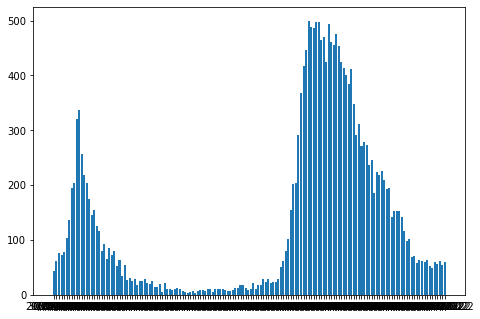

In [130]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fechas = datos_prob["fecha"]
prob_contagio = tabla_contagios
ax.bar(fechas,prob_contagio)
plt.show()

In [131]:
df5 = pd.DataFrame(prob_contagio)
df4 = pd.DataFrame(fechas)

In [132]:
contagio_fecha = pd.concat([df4,df5], axis=1)
contagio_fecha

fecha   0
0    29/06/2021  43
1    30/06/2021  62
2    01/07/2021  77
3    05/07/2021  72
4    07/07/2021  78
..          ...  ..
152  15/03/2022  59
153  18/03/2022  56
154  22/03/2022  62
155  25/03/2022  55
156  29/03/2022  60

[157 rows x 2 columns]

In [133]:
df6= contagio_fecha
df6.to_csv('C10MIL_NMIL_E5.csv')